<center><span style="background-color: rgb(251, 160, 38); font-size: 32px;">  <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE  </span></center>
    
<br>
    
<center><a href = https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png > <img src="https://nuclio.school/wp-content/uploads/2019/10/nucleoDS-newBlack.png" width=400 height=100><a/></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<center> <span style="font-size: 72px;"> PISA SPAIN 2018 </span> </center>

<span style="font-size: 16px;">


</span>

<br>

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# Librerias

In [ ]:
!pip install squarify

In [ ]:
!pip install geopy

In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.9 MB/s eta 0:00:00


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.6 MB/s eta 0:00:00


In [ ]:
# Bibliotecas principales.
import io
import math
import numpy as np
import pandas as pd

# Gráficos.
import geopandas as gpd
import graphviz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Procesado de datos.
import squarify
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Imputar datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
# Cluster
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Métricas
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, adjusted_rand_score, auc, calinski_harabasz_score,
    classification_report, confusion_matrix, davies_bouldin_score,
    pairwise_distances, roc_curve, roc_auc_score, silhouette_samples,
    silhouette_score, classification_report, roc_curve, roc_auc_score
)

#Otros
from sklearn.linear_model import LogisticRegression
import warnings

In [ ]:
spain_pisa = pd.read_csv('/content/drive/MyDrive/pisa_españa.csv', delimiter=',', encoding='latin1')

# Carga de Datos

In [ ]:
spain_pisa.head()

CNTRYID  CNT    CNTSCHID    CNTSTUID   CYC  NatCen  STRATUM  SUBNATIO  \
0    724.0  ESP  72400001.0  72400490.0  07MS   72400  ESP9028   7240000   
1    724.0  ESP  72400001.0  72401482.0  07MS   72400  ESP9028   7240000   
2    724.0  ESP  72400001.0  72402362.0  07MS   72400  ESP9028   7240000   
3    724.0  ESP  72400001.0  72402959.0  07MS   72400  ESP9028   7240000   
4    724.0  ESP  72400001.0  72403316.0  07MS   72400  ESP9028   7240000   

   OECD  ADMINMODE  ...  PV3RTML  PV4RTML  PV5RTML  PV6RTML  PV7RTML  PV8RTML  \
0   1.0        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1   1.0        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2   1.0        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3   1.0        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4   1.0        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   

   PV9RTML  PV10RTML    SENWT             VER_DAT  
0      NaN       NaN  0.22135    26APR19:08:53:20  
1      NaN       NaN  0.21965    26APR19:08:53:20  
2      NaN       NaN  0.21965    26APR19:08:53:20  
3      NaN       NaN  0.22135    26APR19:08:53:20  
4      NaN       NaN  0.21965    26APR19:08:53:20  

[5 rows x 1118 columns]

In [ ]:
spain_pisa.drop_duplicates(inplace = True)

In [ ]:
num_filas, num_columnas = spain_pisa.shape

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 35943
Número de columnas: 1118


Nuestra base de datos consta de 1118 variables diferentes y 35943 filas que corresponden a los estudiantes encuestados.

El número de variables es considerablemente alto, pero para nuestro proyecto, no todas son necesarias. Por lo tanto, hemos optado por seleccionar únicamente aquellas que consideramos relevantes para nuestros propósitos.


### **SELECCIÓN DE COLUMNAS.**

In [ ]:
#Diccionario que contiene los nombres de las columnas que necesitamos y como se llamarán posteriormente.

dic_variables = {
    "STRATUM": "PROVINCIA",
    "ST001D01T": "GRADO",
    "ST004D01T": "GÉNERO",
    "ST011Q01TA": "Un escritorio para estudiar",
    "ST011Q02TA": "Una habitación propia",
    "ST011Q03TA": "Un lugar tranquilo para estudiar",
    "ST011Q04TA": "Una computadora que puedas usar para trabajos escolares",
    "ST011Q05TA": "Software educativo",
    "ST011Q06TA": "Un enlace a Internet",
    "ST011Q07TA": "Literatura clásica",
    "ST011Q08TA": "Libros de poesía",
    "ST011Q09TA": "Obras de arte",
    "ST011Q10TA": "Libros para ayudarte en tus tareas escolares",
    "ST011Q11TA": "Libros de referencia técnica",
    "ST012Q01TA": "Televisores",
    "ST012Q02TA": "Automóviles",
    "ST012Q03TA": "Habitaciones con baño o ducha",
    "ST012Q05NA": "Teléfonos celulares con acceso a Internet",
    "ST012Q06NA": "Computadoras",
    "ST012Q07NA": "Tabletas",
    "ST012Q08NA": "Lectores de libros electrónicos",
    "ST012Q09NA": "Instrumentos musicales",
    "ST127Q01TA": "REPETICIÓN DE CURSO ISCED1",
    "ST127Q02TA": "REPETICIÓN DE CURSO ISCED2",
    "ST127Q03TA": "REPETICIÓN DE CURSO ISCED3",
    "ST158Q01HA": "Cómo usar palabras clave al usar un motor de búsqueda como <Google©>, <Yahoo©>, etc.",
    "ST158Q02HA": "Cómo decidir si confiar en la información de Internet",
    "ST158Q03HA": "Cómo comparar diferentes páginas web y decidir qué información es más relevante para tus tareas escolares",
    "ST158Q04HA": "Entender las consecuencias de hacer información pública en línea en <Facebook©>, <Instagram©>, etc.",
    "ST158Q05HA": "Cómo usar la descripción corta debajo de los enlaces en la lista de resultados de una búsqueda",
    "ST158Q06HA": "Cómo detectar si la información es subjetiva o sesgada",
    "ST158Q07HA": "Cómo detectar correos electrónicos de phishing o spam",
    "ST225Q01HA": "Nivel ISCED 2- Educación primaria",
    "ST225Q02HA": "Nivel ISCED 3B o C - Educación secundaria inferior o media.",
    "ST225Q03HA": "Nivel ISCED 3A - Educación secundaria superior",
    "ST225Q04HA": "Nivel ISCED 4 - Educación postsecundaria no terciaria",
    "ST225Q05HA": "Nivel ISCED 5B - Educación terciaria (programas cortos)",
    "ST225Q06HA": "Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios)",
    "ST114Q01TA": "¿Qué tipo de trabajo esperas tener cuando tengas alrededor de 30 años?",
    "ST186Q05HA": "Pensando en ti mismo y en cómo te sientes normalmente: Feliz",
    "ST186Q06HA": "Pensando en ti mismo y en cómo te sientes normalmente: Asustado",
    "ST186Q07HA": "Pensando en ti mismo y en cómo te sientes normalmente: Vivo",
    "ST186Q10HA": "Pensando en ti mismo y en cómo te sientes normalmente: Miserable",
    "ST186Q09HA": "Pensando en ti mismo y en cómo te sientes normalmente: Orgulloso",
    "ST186Q02HA": "Pensando en ti mismo y en cómo te sientes normalmente: Agobiado",
    "ST186Q01HA": "Pensando en ti mismo y en cómo te sientes normalmente: Jubiloso",
    "ST186Q08HA": "Pensando en ti mismo y en cómo te sientes normalmente: Triste",
    "ST186Q03HA": "Pensando en ti mismo y en cómo te sientes normalmente: Alegre",
    "ST222Q05HA": "Me mantengo informado sobre eventos mundiales a través de Twitter o Facebook.",
    "ST222Q10HA": "Leo regularmente sitios web sobre temas sociales internacionales",
    "IC001Q01TA": "disponibles para ti en casa: Computadora de escritorio",
    "IC001Q02TA": "disponibles para ti en casa: Portátil o notebook",
    "IC001Q03TA": "disponibles para ti en casa: iPad®, BlackBerry® PlayBookTM",
    "IC001Q04TA": "disponibles para ti en casa: Conexión a Internet",
    "IC001Q05TA": "disponibles para ti en casa: PlayStation®",
    "IC001Q08TA": "disponibles para ti en casa: Reproductor de música portátil Mp3/Mp4, iPod® o similar",
    "IC001Q09TA": "disponibles para ti en casa: Impresora",
    "IC001Q10TA": "disponibles para ti en casa: Memoria USB",
    "IC001Q11TA": "disponibles para ti en casa: Amazon® KindleTM",
    "IC002Q01HA06": "3 años o menos 01 primera vez que usaste un dispositivo digital",
    "IC002Q01HA07": "4-6 años primera vez que usaste un dispositivo digital",
    "IC002Q01NA02": "7-9 años primera vez que usaste un dispositivo digital",
    "IC002Q01NA03": "10-12 años primera vez que usaste un dispositivo digital",
    "IC002Q01NA04": "13 años o más primera vez que usaste un dispositivo digital",
    "IC002Q01NA05": "Nunca he usado un dispositivo digital hasta hoy",
    "IC004Q01HA06": "3 años o menos primera vez que accediste a Internet",
    "IC004Q01HA07": "4-6 años primera vez que accediste a Internet",
    "IC004Q01TA02": "7-9 años primera vez que accediste a Internet",
    "IC004Q01TA03": "10-12 años primera vez que accediste a Internet",
    "IC004Q01TA04": "13 años o más primera vez que accediste a Internet",
    "IC004Q01TA05": "Nunca he accedido a Internet",
    "IC005Q01TA01": "uso de Internet en la escuela: Sin tiempo",
    "IC005Q01TA02": "uso de Internet en la escuela: De 1 a 30 minutos por día",
    "IC005Q01TA03": "uso de Internet en la escuela: De 31 a 60 minutos por día",
    "IC005Q01TA04": "uso de Internet en la escuela: Entre 1 hora y 2 horas por día",
    "IC005Q01TA05": "uso de Internet en la escuela: Entre 2 horas y 4 horas por día",
    "IC005Q01TA06": "uso de Internet en la escuela: Entre 4 horas y 6 horas por día",
    "IC005Q01TA07": "uso de Internet en la escuela: Más de 6 horas por día",
    "IC006Q01TA01": "uso de Internet fuera de la escuela: Sin tiempo",
    "IC006Q01TA02": "uso de Internet fuera de la escuela: De 1 a 30 minutos por día",
    "IC006Q01TA03": "uso de Internet fuera de la escuela: De 31 a 60 minutos por día",
    "IC006Q01TA04": "uso de Internet fuera de la escuela: Entre 1 hora y 2 horas por día",
    "IC006Q01TA05": "uso de Internet fuera de la escuela: Entre 2 horas y 4 horas por día",
    "IC006Q01TA06": "uso de Internet fuera de la escuela: Entre 4 horas y 6 horas por día",
    "IC006Q01TA07": "uso de Internet fuera de la escuela: Más de 6 horas por día",
    "IC150Q01HA": "dispositivos digitales durante clases: Lengua",
    "IC150Q02HA": "dispositivos digitales durante clases: Matemáticas",
    "IC150Q03HA": "dispositivos digitales durante clases: Ciencia",
    "IC150Q04HA": "dispositivos digitales durante clases: Idioma extranjero",
    "IC150Q05HA": "dispositivos digitales durante clases: Ciencias sociales",
    "IC150Q06HA": "dispositivos digitales durante clases: Música",
    "IC150Q07HA": "dispositivos digitales durante clases: Deportes",
    "IC150Q08HA": "dispositivos digitales durante clases: Artes escénicas",
    "IC150Q09HA": "dispositivos digitales durante clases: Artes visuales",
    "IC008Q01TA": "actividades fuera de la escuela: Jugar juegos de un solo jugador",
    "IC008Q02TA": "actividades fuera de la escuela: Jugar juegos en línea colaborativos",
    "IC008Q03TA": "actividades fuera de la escuela: Usar correo electrónico",
    "IC008Q04TA": "actividades fuera de la escuela: Chatear en línea",
    "IC008Q05TA": "actividades fuera de la escuela: Participar en redes sociales",
    "IC008Q07NA": "actividades fuera de la escuela: Jugar juegos en línea a través de redes sociales",
    "IC008Q08TA": "actividades fuera de la escuela: Navegar por Internet por diversión",
    "IC008Q09TA": "actividades fuera de la escuela: Leer noticias en Internet",
    "IC008Q10TA": "actividades fuera de la escuela: Obtener información práctica de Internet",
    "IC008Q11TA": "actividades fuera de la escuela: Descargar música, películas, juegos o software de Internet",
    "IC008Q12TA": "actividades fuera de la escuela: Subir contenido propio para compartir",
    "IC008Q13NA": "actividades fuera de la escuela: Descargar nuevas aplicaciones en un dispositivo móvil",
    "IC010Q01TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Navegar por Internet para tareas escolares",
    "IC010Q02NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Navegar por Internet para seguir lecciones, por ejemplo, para encontrar explicaciones",
    "IC010Q03TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar correo electrónico para comunicarse con otros estudiantes sobre tareas escolares",
    "IC010Q04TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar correo electrónico para comunicarse con profesores y enviar tareas o trabajos escolares",
    "IC010Q05NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar redes sociales para comunicarse con otros estudiantes sobre tareas escolares",
    "IC010Q06NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar redes sociales para comunicarse con profesores",
    "IC010Q07TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Descargar, subir o navegar material desde el sitio web de mi escuela",
    "IC010Q08TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Revisar el sitio web de la escuela para anuncios",
    "IC010Q09NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Hacer tareas en una computadora",
    "IC010Q10NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Hacer tareas en un dispositivo móvil",
    "IC010Q11HA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar aplicaciones de aprendizaje o sitios web de aprendizaje en una computadora",
    "IC010Q12HA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar aplicaciones de aprendizaje o sitios web de aprendizaje en un dispositivo móvil",
    "PV1SCIE" : "Ciencias1",
    "PV2SCIE": "Ciencias2",
    "PV3SCIE": "Ciencias3",
    "PV4SCIE": "Ciencias4",
    "PV5SCIE": "Ciencias5",
    "PV6SCIE" : "Ciencias6",
    "PV7SCIE": "Ciencias7",
    "PV8SCIE": "Ciencias8",
    "PV9SCIE": "Ciencias9",
    "PV10SCIE": "Ciencias10",
    "PV1MATH": "Matematicas1",
    "PV2MATH": "Matematicas2",
    "PV3MATH": "Matematicas3",
    "PV4MATH": "Matematicas4",
    "PV5MATH": "Matematicas5",
    "PV6MATH": "Matematicas6",
    "PV7MATH": "Matematicas7",
    "PV8MATH": "Matematicas8",
    "PV9MATH": "Matematicas9",
    "PV10MATH": "Matematicas10"
}

print('El diccionario contiene ' + str(len(dic_variables)) + ' columnas')


El diccionario contiene 138 columnas


# **Cada elemento en este diccionario contiene:**

El índice, se refiere al código de la columna en la base de datos.

El texto representa la pregunta formulada a los estudiantes en la encuesta.

La selección de estas columnas se basa en los siguientes criterios:

1.   Se han incluido las columnas relacionadas con el uso de Internet, redes sociales y otros dispositivos electrónicos.
2.   También se han considerado las variables relacionadas con objetos o configuraciones en el hogar.
3. Las variables relacionadas con la percepción y los sentimientos de los estudiantes también han sido seleccionadas.
4. Se han incluido las variables que describen la situación académica de los estudiantes, como el curso en el que se encuentran y si han repetido algún curso anteriormente.
5. Por último, se han incluido las notas en ciencias y matemáticas, ya que son el objetivo principal de nuestro trabajo.


Estas columnas han sido seleccionadas debido a su relevancia en relación con el uso de la tecnología, el entorno doméstico, la percepción personal, la situación académica y el rendimiento en ciencias y matemáticas de los estudiantes encuestados.

# Nota importante: **En nuestro análisis, nos enfocaremos exclusivamente en las calificaciones de Matemáticas y Ciencias, ya que la parte relacionada con Lectura ha sido desestimada** debido a la obtención de valores extremadamente bajos. Para obtener información adicional al respecto, puedes consultar el siguiente enlace: : https://acortar.link/3Itq9c

In [ ]:
# No_aparecen contiene las variables que no están en el dataset original.
no_aparecen = []

columnas_seleccionadas = [col for col in spain_pisa.columns if col in dic_variables]
df = spain_pisa[columnas_seleccionadas]

for col in dic_variables.keys():
    if col not in columnas_seleccionadas:
        no_aparecen.append(col)

print("\nColumnas que no aparecen en el DataFrame original:")
print(no_aparecen)


Columnas que no aparecen en el DataFrame original:
['ST114Q01TA', 'IC002Q01HA06', 'IC002Q01HA07', 'IC002Q01NA02', 'IC002Q01NA03', 'IC002Q01NA04', 'IC002Q01NA05', 'IC004Q01HA06', 'IC004Q01HA07', 'IC004Q01TA02', 'IC004Q01TA03', 'IC004Q01TA04', 'IC004Q01TA05', 'IC005Q01TA01', 'IC005Q01TA02', 'IC005Q01TA03', 'IC005Q01TA04', 'IC005Q01TA05', 'IC005Q01TA06', 'IC005Q01TA07', 'IC006Q01TA01', 'IC006Q01TA02', 'IC006Q01TA03', 'IC006Q01TA04', 'IC006Q01TA05', 'IC006Q01TA06', 'IC006Q01TA07']


Nuestro DataFrame no incluye todas las variables que habíamos seleccionado. Algunas de ellas no aparecen debido a que están vacías, otras tienen nombres incorrectos y algunas simplemente no están presentes. Para abordar esta situación, hemos desarrollado un código que verifica su existencia y genera un listado con las variables que faltan

In [ ]:
df.head()

STRATUM  ST001D01T  ST004D01T  ST011Q01TA  ST011Q02TA  ST011Q03TA  \
0  ESP9028       10.0        2.0         1.0         1.0         2.0   
1  ESP9028       10.0        1.0         1.0         1.0         1.0   
2  ESP9028       10.0        1.0         1.0         1.0         2.0   
3  ESP9028       10.0        2.0         1.0         1.0         1.0   
4  ESP9028       10.0        1.0         1.0         1.0         1.0   

   ST011Q04TA  ST011Q05TA  ST011Q06TA  ST011Q07TA  ...  PV1SCIE  PV2SCIE  \
0         1.0         2.0         1.0         1.0  ...  382.892  414.668   
1         1.0         2.0         1.0         2.0  ...  487.411  571.625   
2         1.0         1.0         1.0         2.0  ...  586.453  621.134   
3         1.0         2.0         1.0         2.0  ...  448.598  424.901   
4         1.0         2.0         1.0         1.0  ...  527.111  474.178   

   PV3SCIE  PV4SCIE  PV5SCIE  PV6SCIE  PV7SCIE  PV8SCIE  PV9SCIE  PV10SCIE  
0  428.708  481.002  467.633  514.629  565.666  476.991  473.242   437.731  
1  577.276  564.861  506.948  524.887  498.320  536.067  560.486   497.476  
2  642.681  648.995  622.229  628.634  622.172  644.589  621.660   617.954  
3  420.237  417.447  413.478  424.159  424.890  435.045  421.688   442.415  
4  447.526  562.092  457.154  514.485  571.557  463.801  447.137   488.510  

[5 rows x 111 columns]

In [ ]:
num_filas, num_columnas = df.shape

print(f'Número de filas: {num_filas} que corresponden a los registros por alumno.')
print(f'Número de columnas: {num_columnas} que son las variables con las que trabajaremos.')

Número de filas: 35943 que corresponden a los registros por alumno.
Número de columnas: 111 que son las variables con las que trabajaremos.


En última instancia, trabajaremos con un total de 111 columnas (aunque todavía queda pendiente analizar los valores nulos) y contamos con 35,943 registros en nuestro conjunto de datos.

In [ ]:
#MOSTRAMOS LAS COLUMNAS QUE NOS FALTAN.
columnas_seleccionadas = [col for col in spain_pisa.columns if col in dic_variables]

for col in dic_variables.keys():
    if col not in columnas_seleccionadas:
        no_aparecen.append(col)

valores_mapeados = [dic_variables[col] for col in no_aparecen]

In [ ]:
n = len(valores_mapeados)
print("Nos faltan", n, "variables.")

Nos faltan 54 variables.


Finalmente las columnas que no aparecen en este listado es porque no están en el Codebook y por tanto no se puede trabajar con ellas.

In [ ]:
# diccionario de códigos a regiones
region_mapping = {
    'ESP0101': 'Andalucia',
    'ESP0102': 'Andalucia',
    'ESP9001': 'Andalucia',
    'ESP9002': 'Andalucia',
    'ESP0203': 'Aragon',
    'ESP0204': 'Aragon',
    'ESP9003': 'Aragon',
    'ESP9004': 'Aragon',
    'ESP0305': 'Asturias',
    'ESP0306': 'Asturias',
    'ESP9005': 'Asturias',
    'ESP9006': 'Asturias',
    'ESP0407': 'Islas Baleares',
    'ESP0408': 'Islas Baleares',
    'ESP9007': 'Islas Baleares',
    'ESP9008': 'Islas Baleares',
    'ESP0509': 'Islas Canarias',
    'ESP0510': 'Islas Canarias',
    'ESP9009': 'Islas Canarias',
    'ESP9010': 'Islas Canarias',
    'ESP0611': 'Cantabria',
    'ESP0612': 'Cantabria',
    'ESP9011': 'Cantabria',
    'ESP9012': 'Cantabria',
    'ESP0713': 'Castilla y Leon',
    'ESP0714': 'Castilla y Leon',
    'ESP9013': 'Castilla y Leon',
    'ESP9014': 'Castilla y Leon',
    'ESP0815': 'Castilla - La Mancha',
    'ESP0816': 'Castilla - La Mancha',
    'ESP9015': 'Castilla - La Mancha',
    'ESP9016': 'Castilla - La Mancha',
    'ESP0917': 'Cataluna',
    'ESP0918': 'Cataluna',
    'ESP9017': 'Cataluna',
    'ESP9018': 'Cataluna',
    'ESP1019': 'Extremadura',
    'ESP1020': 'Extremadura',
    'ESP9019': 'Extremadura',
    'ESP9020': 'Extremadura',
    'ESP1121': 'Galicia',
    'ESP1122': 'Galicia',
    'ESP9021': 'Galicia',
    'ESP9022': 'Galicia',
    'ESP1223': 'La Rioja',
    'ESP1224': 'La Rioja',
    'ESP9023': 'La Rioja',
    'ESP9024': 'La Rioja',
    'ESP1325': 'Madrid',
    'ESP1326': 'Madrid',
    'ESP9025': 'Madrid',
    'ESP9026': 'Madrid',
    'ESP1427': 'Murcia',
    'ESP1428': 'Murcia',
    'ESP9027': 'Murcia',
    'ESP9028': 'Murcia',
    'ESP1529': 'Navarra',
    'ESP1530': 'Navarra',
    'ESP9029': 'Navarra',
    'ESP9030': 'Navarra',
    'ESP1631': 'Pais Vasco',
    'ESP1632': 'Pais Vasco',
    'ESP1633': 'Pais Vasco',
    'ESP1634': 'Pais Vasco',
    'ESP1635': 'Pais Vasco',
    'ESP1636': 'Pais Vasco',
    'ESP9031': 'Pais Vasco',
    'ESP9032': 'Pais Vasco',
    'ESP9033': 'Pais Vasco',
    'ESP9034': 'Pais Vasco',
    'ESP9035': 'Pais Vasco',
    'ESP9036': 'Pais Vasco',
    'ESP1737': 'Comunidad Valenciana',
    'ESP1738': 'Comunidad Valenciana',
    'ESP9037': 'Comunidad Valenciana',
    'ESP9038': 'Comunidad Valenciana',
    'ESP9039': 'Ceuta y Melilla',
    'ESP9040': 'Ceuta y Melilla'
}


In [ ]:
# Cambiar el nombre de la columna 'STRATUM' a 'REGION' en la copia
df_copy = df.copy()
df_copy.rename(columns={'STRATUM': 'REGION'}, inplace=True)
df_copy['REGION'] = df_copy['REGION'].map(region_mapping)
df = df_copy.copy()

La columna "STRATUM" se relaciona con la provincia. Hemos realizado un mapeo de todos los códigos y sus respectivos valores según el Codebook para facilitar la posterior visualización.

### **VARIABLE TARGET**


# **La variable objetivo de nuestro proyecto será la siguiente: un valor booleano que señalará si el rendimiento del estudiante está por encima o por debajo del promedio de la OCDE.**

El primer paso implica calcular el promedio de desempeño de cada estudiante tanto en matemáticas como en ciencias. En cada asignatura, se presentan 10 valores, que en parte hacen referencia a los valores plausibles (lo que significa que son resultados razonables) y posiblemente a las distintas secciones que componen cada uno de los exámenes.

In [ ]:
# variable NOTA CIENCIAS en el que vamos a sacar la media de CIENCIAS

df['NOTA CIENCIAS'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE']].mean(axis=1)
df['NOTA CIENCIAS']

0        464.3162
1        532.5357
2        625.6501
3        427.2858
4        495.3551
           ...   
35938    499.8905
35939    596.3349
35940    516.3387
35941    633.7381
35942    566.5997
Name: NOTA CIENCIAS, Length: 35943, dtype: float64

In [ ]:
# hacemos lo mismo con MATEMATICAS

df['NOTA MATEMATICAS'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH']].mean(axis=1)
df['NOTA MATEMATICAS']

0        468.2330
1        539.3369
2        619.6046
3        406.1378
4        508.2389
           ...   
35938    494.6956
35939    582.8701
35940    546.3091
35941    623.5066
35942    597.9505
Name: NOTA MATEMATICAS, Length: 35943, dtype: float64

In [ ]:
# variable CALIFICACION contiene la media de NOTA CIENCIAS y NOTA MATEMATICAS

df['CALIFICACION'] = df[['NOTA CIENCIAS', 'NOTA MATEMATICAS']].mean(axis=1)
df['CALIFICACION'] = df['CALIFICACION'].round(2)
df['CALIFICACION']

0        466.27
1        535.94
2        622.63
3        416.71
4        501.80
          ...  
35938    497.29
35939    589.60
35940    531.32
35941    628.62
35942    582.28
Name: CALIFICACION, Length: 35943, dtype: float64

Calificacion contiene la media de las dos notas, matemáticas y ciencias.

# **De acuerdo con la OECD, el puntaje promedio en las pruebas de matemáticas y ciencias es de 489.** Por lo tanto, utilizaremos este valor como referencia para crear nuestra variable TARGET.

Nuestro objetivo será una variable binaria que nos indicará si el estudiante se encuentra por debajo del promedio, representado con un 0, o si está por encima del promedio, representado con un 1.

In [ ]:
def target(x):
    if x >= 489:
        return 1
    else:
        return 0

In [ ]:
#Este es nuestro TARGET

df['TARGET'] = df['CALIFICACION'].apply(target)

In [ ]:
df['TARGET'].value_counts()

1    18994
0    16949
Name: TARGET, dtype: int64

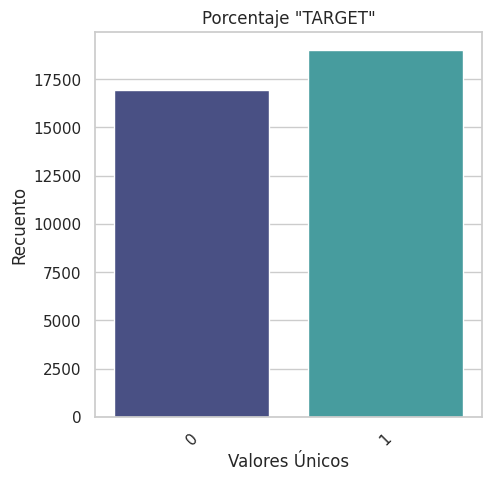

In [ ]:
sns.set(style="whitegrid")

conteo_valores = df['TARGET'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=conteo_valores.index, y=conteo_valores.values, palette="mako")

plt.title('Porcentaje "TARGET"')
plt.xlabel('Valores Únicos')
plt.ylabel('Recuento')
plt.xticks(rotation=45)

plt.show()

Observamos que el target está muy equilibrado. Consideramos este hayazgo muy positivo por lo siguiente:

**Menos sesgo en el futuro modelo:** Los modelos de machine learning tienden a sesgarse hacia la clase dominante. Esto significa que el modelo puede ser más propenso a predecir la clase mayoritaria en lugar de aprender patrones útiles de ambas clases. Con un equilibrio cercano entre las clases, este sesgo se reduce y el modelo tiene la oportunidad de aprender de manera más equitativa.

**Mejor Generalización**: Un modelo entrenado en un conjunto de datos equilibrado generalmente tendrá una mejor capacidad de generalización. Esto significa que el modelo será más efectivo al hacer predicciones sobre nuevos datos, ya que no estará sesgado hacia una clase en particular.

**Evaluación más precisa:** Al tener un equilibrio entre las clases, las métricas de evaluación del modelo, como la precisión, la sensibilidad y la especificidad, serán más confiables.

### **ANALISIS EXPLORATORIO**

In [ ]:
num_filas, num_columnas = df.shape

print(f'Número de filas: {num_filas}')
print(f'Número de columnas: {num_columnas}')

Número de filas: 35943
Número de columnas: 115


In [ ]:
df.drop_duplicates(inplace= True)

Eliminamos duplicados.

In [ ]:
df.dtypes

REGION               object
ST001D01T           float64
ST004D01T           float64
ST011Q01TA          float64
ST011Q02TA          float64
                     ...   
PV10SCIE            float64
NOTA CIENCIAS       float64
NOTA MATEMATICAS    float64
CALIFICACION        float64
TARGET                int64
Length: 115, dtype: object

In [ ]:
# Convertimos todo a tipo float menos la columna REGION.
columnas_a_convertir = df.columns.difference(['REGION'])
df.loc[:, columnas_a_convertir] = df.loc[:, columnas_a_convertir].astype(float)

<ipython-input-29-217e67cf3b5d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, columnas_a_convertir] = df.loc[:, columnas_a_convertir].astype(float)


Hemos convertido todos los datos a float menos REGION

### **NULOS**

La siguiente gráfica nos mostrará de forma muy visual e intuitiva que cantidad de nulos hay por fila y columna.

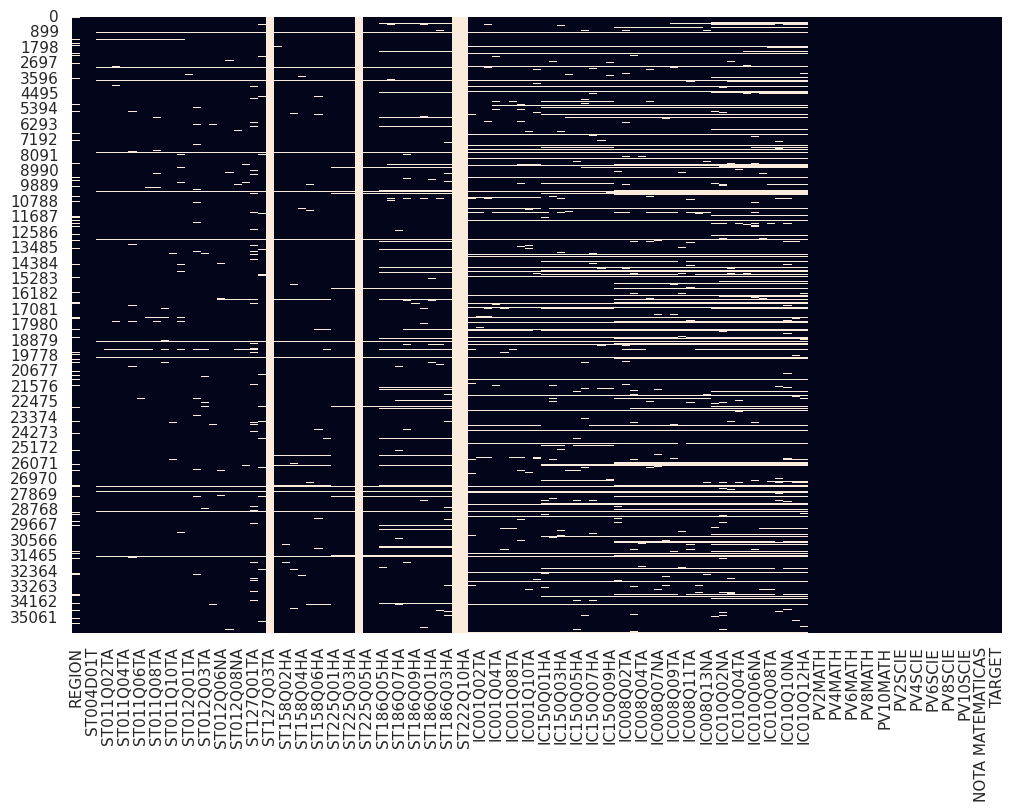

In [ ]:
#Creamos un heatmap de los nulos que contiene nuestro df

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Observaciones:
1. Hay columnas que carecen de datos en su totalidad.
2. Encontramos que algunas filas tienen una cantidad limitada o incluso carecen en gran medida de registros.
3. Se han identificado patrones notables en los datos; específicamente, las columnas relacionadas con las calificaciones no presentan ningún valor NaN. Esto sugiere la posibilidad de que todos los alumnos hayan completado el examen, pero no necesariamente participaron en la encuesta.

In [ ]:
# Columnas con todos los valores nulos
columnas_con_valores_nulos = df.columns[df.isnull().all()]
columnas_con_valores_nulos_lista = list(columnas_con_valores_nulos)
print("Columnas con todos los valores nulos:")
print(columnas_con_valores_nulos_lista)

Columnas con todos los valores nulos:
['ST127Q03TA', 'ST225Q04HA', 'ST222Q05HA', 'ST222Q10HA']


In [ ]:
#Eliminar columnas con todos los valores nulos
df = df.drop(columns=columnas_con_valores_nulos_lista)

In [ ]:
# Eliminar filas con todos los valores nulos
df = df.dropna(how='all')

In [ ]:
# Listado de columnas con al menos un valor nulo
columnas_con_valores_nulos = df.columns[df.isna().any()].tolist()

print("Columnas con al menos un valor nulo:")
print(columnas_con_valores_nulos)

Columnas con al menos un valor nulo:
['REGION', 'ST011Q01TA', 'ST011Q02TA', 'ST011Q03TA', 'ST011Q04TA', 'ST011Q05TA', 'ST011Q06TA', 'ST011Q07TA', 'ST011Q08TA', 'ST011Q09TA', 'ST011Q10TA', 'ST011Q11TA', 'ST012Q01TA', 'ST012Q02TA', 'ST012Q03TA', 'ST012Q05NA', 'ST012Q06NA', 'ST012Q07NA', 'ST012Q08NA', 'ST012Q09NA', 'ST127Q01TA', 'ST127Q02TA', 'ST158Q01HA', 'ST158Q02HA', 'ST158Q03HA', 'ST158Q04HA', 'ST158Q05HA', 'ST158Q06HA', 'ST158Q07HA', 'ST225Q01HA', 'ST225Q02HA', 'ST225Q03HA', 'ST225Q05HA', 'ST225Q06HA', 'ST186Q05HA', 'ST186Q06HA', 'ST186Q07HA', 'ST186Q10HA', 'ST186Q09HA', 'ST186Q02HA', 'ST186Q01HA', 'ST186Q08HA', 'ST186Q03HA', 'IC001Q01TA', 'IC001Q02TA', 'IC001Q03TA', 'IC001Q04TA', 'IC001Q05TA', 'IC001Q08TA', 'IC001Q09TA', 'IC001Q10TA', 'IC001Q11TA', 'IC150Q01HA', 'IC150Q02HA', 'IC150Q03HA', 'IC150Q04HA', 'IC150Q05HA', 'IC150Q06HA', 'IC150Q07HA', 'IC150Q08HA', 'IC150Q09HA', 'IC008Q01TA', 'IC008Q02TA', 'IC008Q03TA', 'IC008Q04TA', 'IC008Q05TA', 'IC008Q07NA', 'IC008Q08TA', 'IC008Q09TA', 

In [ ]:
# Porcentaje de nulos por columnas en orden descendente.
null_percentage_columns = (df.isnull().sum() / len(df)) * 100
print(null_percentage_columns.sort_values(ascending=False))

IC010Q10NA    22.098879
IC010Q12HA    22.093314
IC010Q11HA    21.937512
IC010Q08TA    21.837354
IC010Q07TA    21.372729
                ...    
PV2MATH        0.000000
PV1MATH        0.000000
ST004D01T      0.000000
ST001D01T      0.000000
TARGET         0.000000
Length: 111, dtype: float64


Después de eliminar aquellas columnas que estaban completamente vacías observamos que el porcentaje de valores faltantes en cada columna es relativamente bajo. Por lo tanto, más adelante procederemos a su imputación.

In [ ]:
# Porcentaje de nulos por filas en orden descendente.
null_percentage_rows = (df.isnull().sum(axis=1) / len(df.columns)) * 100

filtered_rows = null_percentage_rows[null_percentage_rows > 10]
print(filtered_rows.sort_values(ascending=False))

35132    76.576577
31229    76.576577
20717    76.576577
20715    76.576577
18732    76.576577
           ...    
12614    10.810811
33341    10.810811
33352    10.810811
33353    10.810811
0        10.810811
Length: 7471, dtype: float64


En cuanto a las filas, hemos notado la presencia de filas con un alto porcentaje de valores faltantes.

# **Hemos llegado a la conclusión de que los resultados de un alumno con más del 75% de información faltante pueden ser poco confiables y de esta forma lo eliminamos.**

In [ ]:
#Eliminamos las filas que tengan más de un 75% de NaN
umbral = 0.75
max_nulos_permitidos = int(df.shape[1] * (1 - umbral))
df = df.dropna(thresh=max_nulos_permitidos)

In [ ]:
df['REGION'].fillna('Desconocido', inplace=True) #los nulos de la columna REGION los nombramos Desconocido

<ipython-input-38-a9ecac65ac36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGION'].fillna('Desconocido', inplace=True) #los nulos de la columna REGION los nombramos Desconocido


Para analizar las columnas que aún presentan valores faltantes, procederemos a examinar cada una de ellas de manera individual para asegurar una gestión óptima de los datos. Con este propósito, hemos desarrollado una función que nos proporcionará la siguiente información:

La cantidad de valores distintos que contiene cada columna.
El tipo de valores distintos presentes en cada columna, junto con la cantidad y el porcentaje de cada tipo.
La cantidad de valores nulos presentes en cada columna.

In [ ]:
columnas_n = [ 'REGION',
              'ST011Q01TA',
               'ST011Q02TA',
               'ST011Q03TA',
               'ST011Q04TA',
               'ST011Q05TA',
               'ST011Q06TA',
               'ST011Q07TA',
               'ST011Q08TA',
               'ST011Q09TA',
               'ST011Q10TA',
               'ST011Q11TA',
               'ST012Q01TA',
               'ST012Q02TA',
               'ST012Q03TA',
               'ST012Q05NA',
               'ST012Q06NA',
               'ST012Q07NA',
               'ST012Q08NA',
               'ST012Q09NA',
               'ST127Q01TA',
               'ST127Q02TA',
               'ST158Q01HA',
               'ST158Q02HA',
               'ST158Q03HA',
               'ST158Q04HA',
               'ST158Q05HA',
               'ST158Q06HA',
               'ST158Q07HA',
               'ST225Q01HA',
               'ST225Q02HA',
               'ST225Q03HA',
               'ST225Q05HA',
               'ST225Q06HA',
               'ST186Q05HA',
               'ST186Q06HA',
               'ST186Q07HA',
               'ST186Q10HA',
               'ST186Q09HA',
               'ST186Q02HA',
               'ST186Q01HA',
               'ST186Q08HA',
               'ST186Q03HA',
               'IC001Q01TA',
               'IC001Q02TA',
               'IC001Q03TA',
               'IC001Q04TA',
               'IC001Q05TA',
               'IC001Q08TA',
               'IC001Q09TA',
               'IC001Q10TA',
               'IC001Q11TA',
               'IC150Q01HA',
               'IC150Q02HA',
               'IC150Q03HA',
               'IC150Q04HA',
               'IC150Q05HA',
               'IC150Q06HA',
               'IC150Q07HA',
               'IC150Q08HA',
               'IC150Q09HA',
               'IC008Q01TA',
               'IC008Q02TA',
               'IC008Q03TA',
               'IC008Q04TA',
               'IC008Q05TA',
               'IC008Q07NA',
               'IC008Q08TA',
               'IC008Q09TA',
               'IC008Q10TA',
               'IC008Q11TA',
               'IC008Q12TA',
               'IC008Q13NA',
               'IC010Q01TA',
               'IC010Q02NA',
               'IC010Q03TA',
               'IC010Q04TA',
               'IC010Q05NA',
               'IC010Q06NA',
               'IC010Q07TA',
               'IC010Q08TA',
               'IC010Q09NA',
               'IC010Q10NA',
               'IC010Q11HA',
               'IC010Q12HA'
               ]

In [ ]:
def procesar_columnas(df, columnas_n):
    for columna in columnas_n:
        # 1. Cuantos valores distintos tiene la columna
        valores_distintos = df[columna].nunique()
        print(f"Columna '{columna}' tiene {valores_distintos} valores distintos.")

        # 2. Mostrar los tipos de valores distintos, cantidad y porcentaje.
        tipos_valores = df[columna].value_counts()
        total_valores = len(df[columna])

        porcentajes = [(valor, cantidad, (cantidad / total_valores) * 100) for valor, cantidad in tipos_valores.items()]
        for valor, cantidad, porcentaje in porcentajes:
            print(f"Valor: '{valor}', Cantidad: {cantidad}, Porcentaje: {porcentaje:.2f}%")

        # 3.Calcular cuántos nulos hay en cada columnas
        total_nulos = df[columna].isnull().sum()
        print(f"Tiene {total_nulos} nulos.")

        print('______________________')

procesar_columnas(df, columnas_n)

Columna 'REGION' tiene 19 valores distintos.
Valor: 'Desconocido', Cantidad: 3931, Porcentaje: 10.96%
Valor: 'Pais Vasco', Cantidad: 2762, Porcentaje: 7.70%
Valor: 'Madrid', Cantidad: 2192, Porcentaje: 6.11%
Valor: 'Comunidad Valenciana', Cantidad: 2175, Porcentaje: 6.06%
Valor: 'Galicia', Cantidad: 1934, Porcentaje: 5.39%
Valor: 'Asturias', Cantidad: 1896, Porcentaje: 5.28%
Valor: 'Cantabria', Cantidad: 1880, Porcentaje: 5.24%
Valor: 'Castilla y Leon', Cantidad: 1876, Porcentaje: 5.23%
Valor: 'Castilla - La Mancha', Cantidad: 1832, Porcentaje: 5.11%
Valor: 'Extremadura', Cantidad: 1816, Porcentaje: 5.06%
Valor: 'Aragon', Cantidad: 1797, Porcentaje: 5.01%
Valor: 'Islas Canarias', Cantidad: 1790, Porcentaje: 4.99%
Valor: 'Andalucia', Cantidad: 1766, Porcentaje: 4.92%
Valor: 'Islas Baleares', Cantidad: 1723, Porcentaje: 4.80%
Valor: 'Murcia', Cantidad: 1700, Porcentaje: 4.74%
Valor: 'Cataluna', Cantidad: 1690, Porcentaje: 4.71%
Valor: 'La Rioja', Cantidad: 1494, Porcentaje: 4.16%
Valor: 

Al examinar cada columna individualmente, hemos observado lo siguiente: La columna 'región' requiere un tratamiento especial, mientras que en las demás columnas, la cantidad de valores nulos no es significativa y pueden ser gestionados adecuadamente.

En la columna 'región', tenemos datos de tipo texto (str) que hacen referencia al nombre de las provincias. En el resto de columnas, los datos representan la elección del alumno como respuesta a la pregunta que se les hizo. No son valores numéricos per se, ya que las respuestas se refieren a 'SI'-'NO' (bool) o 'MUCHO'-'POCO'-'NINGUNO' (str).** Esto es importante tenerlo en cuenta, ya que en la imputación de datos faltantes no es posible calcular medias u otros cálculos estadísticos.**

### **Imputación de Datos Faltantes: Notas Importantes**

En nuestro proceso de imputación de datos faltantes, hemos optado por utilizar un Decision Tree Regressor. A continuación, desarrollamos y justificamos nuestra elección, considerando varios métodos disponibles:

**Imputación de Media** (Mean Imputation): Este enfoque consiste en reemplazar los valores faltantes con la media de los datos en la columna correspondiente. Esto se puede lograr utilizando la función fillna() o la clase SimpleImputer de la biblioteca sklearn. Sin embargo, descartamos esta opción debido a la naturaleza de nuestros datos. Como antes hemos nombrados nuestros datos no son númericos y no tiene sentido tratarlos como tal.

**Creación de una Categoría Separada** (Create Separate Category): Se puede crear una categoría especial para los valores faltantes utilizando código en Pandas o la clase SimpleImputer de sklearn. Se ha utilizado para los valores de la columna REGION. No obstante para el resto, esta estrategia fue descartada.

**Imputación Basada en Modelos** (Model Imputation): Implica la construcción de un modelo de regresión para predecir los valores faltantes. Para esto, utilizamos la herramienta IterativeImputer de sklearn. Creemos que esta opción se adapta mejor a nuestros datos.

**Eliminación de Filas o Columnas** (Delete Rows or Columns): Hemos decidido eliminar las columnas que tienen al menos un 75% de valores nulos, ya que consideramos que este nivel de ausencia de datos es demasiado elevado y podría afectar negativamente la calidad de nuestros análisis.

**K Vecinos más Cercanos** (KNN): Muchas de nuestras columnas están relacionadas entre sí, lo que hace que el KNN sea una elección sólida. Por ejemplo, si un estudiante obtiene un resultado negativo (0) en una variable objetivo, es probable que sus respuestas a otras preguntas también reflejen circunstancias similares, como la falta de un escritorio o una habitación propia. No obstante hicimos pruebas y no obtuvimos buenos resultados.

Consideramos otra opción, que era completar los valores faltantes en proporción a los datos existentes. En otras palabras, si la proporción entre "Sí" y "No" era de 4 a 1, se completarían los datos faltantes en consecuencia. Sin embargo, desechamos esta opción debido a su falta de coherencia. Existe la posibilidad de que los primeros valores nulos de la columna no estuvieran relacionados con el resto, lo que podría generar datos incorrectos.

# Finalmente, **hemos optado por utilizar la técnica IterativeImputer de Scikit-Learn en combinación con DecisionTreeRegressor para abordar la imputación de datos faltantes en nuestro conjunto de datos.  Creemos que esta combinación nos permitirá tomar decisiones informadas y obtener resultados más precisos.**

In [ ]:
"""Dejo las celdas comentadas para que no se ejecute cada vez que ejecutemos el notebook."""
#columnas = df.columns

'Dejo las celdas comentadas para que no se ejecute cada vez que ejecutemos el notebook.'

In [ ]:
#X = df.iloc[:, 1:].values
#y = df.iloc[:, 0].values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, imputation_order='ascending', random_state=21)

Entrenamiento del modelo: 41 MINUTOS

In [ ]:
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

In [ ]:
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)

In [ ]:
#X = pd.concat([X_train, X_test], axis=0)
#y = pd.concat([y_train, y_test], axis=0)

In [ ]:
#df_ok = pd.concat([y, X], axis=1)

In [ ]:
#df_ok.columns= columnas

In [ ]:
#df_ok.shape

### **TRANSFORMACION DE DATOS**

In [ ]:
# Guardar el DataFrame  como archivo CSV
#df_ok.to_csv('df_pisa_sin_nulos.csv', index=False)


Tras aplicar el arbol de decision e Iterative Imputer guardamos el nuevo df y empezaremos a graficarlo para obtener conclusiones y comprender mejor nuestros datos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_pisa_sin_nulos.csv', delimiter=',', encoding='latin1')

In [ ]:
 #Comprobamos que realmente no hay nulos en el nuevo dataset.
 nulos = df.isna().sum().sum()
 print ("Hay " + str(nulos) + " en el dataset")

Hay 0 en el dataset


In [ ]:
df.shape

(35943, 111)

Finalmente nuestro nuevo df sin nulos consta de 35943 registros (alumnos) y 111 columnas.

In [ ]:
df.head(10)

REGION  ST001D01T  ST004D01T  ST011Q01TA  ST011Q02TA  \
0           Extremadura       10.0        1.0         1.0         1.0   
1       Castilla y Leon       10.0        1.0         1.0         1.0   
2  Comunidad Valenciana       10.0        1.0         1.0         1.0   
3                Madrid        8.0        2.0         1.0         1.0   
4             Cantabria        9.0        2.0         1.0         1.0   
5        Islas Baleares        9.0        2.0         1.0         1.0   
6              Asturias       10.0        1.0         1.0         1.0   
7            Pais Vasco       10.0        1.0         1.0         1.0   
8              Asturias       10.0        1.0         1.0         1.0   
9              Cataluna       10.0        2.0         1.0         1.0   

   ST011Q03TA  ST011Q04TA  ST011Q05TA  ST011Q06TA  ST011Q07TA  ...  PV5SCIE  \
0         1.0         1.0         2.0         1.0         1.0  ...  538.890   
1         1.0         1.0         2.0         1.0         1.0  ...  457.543   
2         1.0         1.0         1.0         1.0         2.0  ...  484.657   
3         1.0         1.0         2.0         1.0         2.0  ...  378.708   
4         1.0         1.0         1.0         1.0         2.0  ...  563.508   
5         1.0         2.0         2.0         2.0         2.0  ...  507.763   
6         1.0         1.0         1.0         1.0         2.0  ...  395.235   
7         1.0         1.0         2.0         1.0         2.0  ...  537.589   
8         1.0         1.0         1.0         1.0         2.0  ...  469.684   
9         1.0         1.0         1.0         1.0         1.0  ...  382.441   

   PV6SCIE  PV7SCIE  PV8SCIE  PV9SCIE  PV10SCIE  NOTA CIENCIAS  \
0  507.852  498.690  500.419  505.205   517.600       516.1690   
1  474.852  498.781  533.945  474.990   449.576       480.6517   
2  504.322  487.253  444.084  472.455   535.229       477.9786   
3  464.994  406.707  401.688  452.741   440.537       431.2049   
4  609.195  595.726  513.956  509.958   522.603       544.2384   
5  542.144  523.444  524.487  519.216   521.142       526.3903   
6  410.991  472.952  373.320  429.213   488.541       425.8988   
7  513.686  478.376  546.346  541.745   486.142       530.0948   
8  560.457  532.262  577.247  497.856   494.780       526.8409   
9  312.585  433.527  379.553  439.260   491.409       417.5098   

   NOTA MATEMATICAS  CALIFICACION  TARGET  
0          511.3720        513.77     1.0  
1          489.3662        485.01     0.0  
2          499.4429        488.71     0.0  
3          443.4651        437.34     0.0  
4          566.4032        555.32     1.0  
5          528.1363        527.26     1.0  
6          393.1324        409.52     0.0  
7          590.8076        560.45     1.0  
8          592.0977        559.47     1.0  
9          476.0565        446.78     0.0  

[10 rows x 111 columns]

In [ ]:
# Creo nuevas columnas, y elimino las anteriores
df['CIENCIAS'] = df['NOTA CIENCIAS']
df['MATEMATICAS'] = df['NOTA MATEMATICAS']
df['NOTA ESPAÑA'] = df['CALIFICACION']
df['TARGET ESP'] = df['TARGET']

In [ ]:
df = df.drop(df.columns[87:111], axis=1)

Realizamos una última revisión de aquellas columnas que nos son útiles. En este caso nos quedamos con TARGET ESP, NOTA ESPAÑA, CIENCIAS, MATEMATICAS.

CIENCIAS : contiene la media de todas las puntuaciones de ciencias de cada uno de los alumnos.

MATEMATICAS: contiene la media de todas las puntuacions de matematicas de cada uno de los alumnos.

NOTA ESPAÑA: Contiene la media de las dos asignaturas anteriores por cada uno de los alumnos.

TARGET ESP: Contiene un valor booleano que representa si el alumno está por encima o por debajo de la media de la OCDE.

In [ ]:
df.shape

(35943, 91)

# **Tras borrar esas columnas y generar las nuevas nos quedamos con 91 variables distintas (preguntas del cuestionario) y 35943 registros (alumnos).**

### **COLUMNAS**

In [ ]:
df.columns

Index(['REGION', 'ST001D01T', 'ST004D01T', 'ST011Q01TA', 'ST011Q02TA',
       'ST011Q03TA', 'ST011Q04TA', 'ST011Q05TA', 'ST011Q06TA', 'ST011Q07TA',
       'ST011Q08TA', 'ST011Q09TA', 'ST011Q10TA', 'ST011Q11TA', 'ST012Q01TA',
       'ST012Q02TA', 'ST012Q03TA', 'ST012Q05NA', 'ST012Q06NA', 'ST012Q07NA',
       'ST012Q08NA', 'ST012Q09NA', 'ST127Q01TA', 'ST127Q02TA', 'ST158Q01HA',
       'ST158Q02HA', 'ST158Q03HA', 'ST158Q04HA', 'ST158Q05HA', 'ST158Q06HA',
       'ST158Q07HA', 'ST225Q01HA', 'ST225Q02HA', 'ST225Q03HA', 'ST225Q05HA',
       'ST225Q06HA', 'ST186Q05HA', 'ST186Q06HA', 'ST186Q07HA', 'ST186Q10HA',
       'ST186Q09HA', 'ST186Q02HA', 'ST186Q01HA', 'ST186Q08HA', 'ST186Q03HA',
       'IC001Q01TA', 'IC001Q02TA', 'IC001Q03TA', 'IC001Q04TA', 'IC001Q05TA',
       'IC001Q08TA', 'IC001Q09TA', 'IC001Q10TA', 'IC001Q11TA', 'IC150Q01HA',
       'IC150Q02HA', 'IC150Q03HA', 'IC150Q04HA', 'IC150Q05HA', 'IC150Q06HA',
       'IC150Q07HA', 'IC150Q08HA', 'IC150Q09HA', 'IC008Q01TA', 'IC008Q02TA',
     

COLUMNA REGION:
Contiene la comunidad autonoma donde el alumno hizo el examen. Además los valores nulos que hemos encontrado los hemos cambiado a "DESCONOCIDO".

ST001D01T:
hace referencia al curso en el que se encuentra el alumno. Es importante tener en cuenta que este examen se administra a niños de una edad específica (15 años). Por lo tanto, es posible que algunos de ellos estén en cursos que no corresponden a su edad, ya sea porque han repetido algún grado o porque tienen un nivel educativo superior debido a altas capacidades.

In [ ]:
Curso = df['ST001D01T'].value_counts().sort_index(ascending = True)

In [ ]:
Curso

7.0        13
8.0      1785
9.0      7591
10.0    26537
11.0       17
Name: ST001D01T, dtype: int64

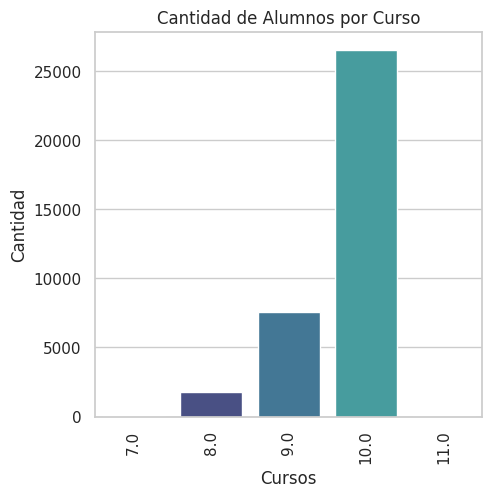

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='ST001D01T', palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Cursos')
plt.ylabel('Cantidad')
plt.title('Cantidad de Alumnos por Curso')
plt.show()

**La columna 10.0 representa a los alumnos que están en su mismo curso.** La columna 11.0 corresponde a los que están un grado por encima del curso que les corresponde, y en este caso, solo hay 17 alumnos en esta categoría.

Los valores numéricos menores a 10 representan a los alumnos que están en cursos inferiores. Esto puede deberse a diversas razones, como haber repetido algún grado en algún momento de su educación o haber comenzado su escolarización más tarde. Un ejemplo de esta última situación podría ser niños inmigrantes que llegan a un nuevo país y necesitan tiempo adicional para familiarizarse con el idioma y el sistema educativo.

COLUMNA GENERO ST004D01T :
Representa el género de los alumnos. En este caso está muy equilibrado.

In [ ]:
df['ST004D01T'].value_counts()

2.0    17987
1.0    17956
Name: ST004D01T, dtype: int64

In [ ]:
#Renombro la columna a genero y cambio sus valores a femenino y masculino
df.rename(columns={'ST004D01T': 'GENERO'}, inplace=True)
df['GENERO'] = df['GENERO'].replace({1.0: 'Femenino', 2.0: 'Masculino'})

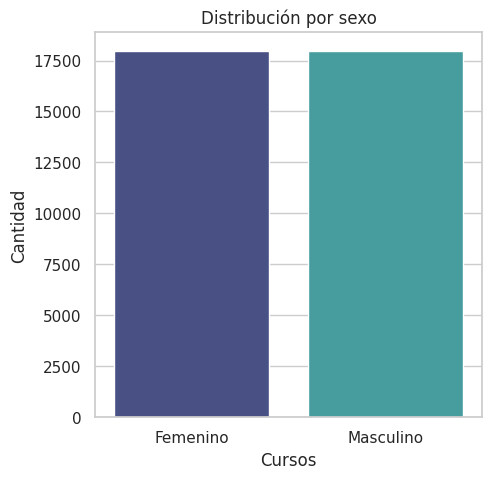

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='GENERO', palette='mako')
plt.xticks(rotation=0)
plt.xlabel('Cursos')
plt.ylabel('Cantidad')
plt.title('Distribución por sexo')
plt.show()

# **Es fundamental mencionar que es necesario mantener esta variable en equilibrio, ya que es un requisito esencial de PISA para llevar a cabo la prueba, y todos los países deben cumplir con ello.**

    "ST011Q01TA": "Un escritorio para estudiar",
    "ST011Q02TA": "Una habitación propia",
    "ST011Q03TA": "Un lugar tranquilo para estudiar",
    "ST011Q04TA": "Una computadora que puedas usar para trabajos escolares",
    "ST011Q05TA": "Software educativo",
    "ST011Q06TA": "Un enlace a Internet",
    "ST011Q07TA": "Literatura clásica",
    "ST011Q08TA": "Libros de poesía",
    "ST011Q09TA": "Obras de arte",
    "ST011Q10TA": "Libros para ayudarte en tus tareas escolares",
    "ST011Q11TA": "Libros de referencia técnica",
    "ST012Q01TA": "Televisores",
    "ST012Q02TA": "Automóviles",
    "ST012Q03TA": "Habitaciones con baño o ducha",
    "ST012Q05NA": "Teléfonos celulares con acceso a Internet",
    "ST012Q06NA": "Computadoras",
    "ST012Q07NA": "Tabletas",
    "ST012Q08NA": "Lectores de libros electrónicos",
    "ST012Q09NA": "Instrumentos musicales".

Estas columnas hacen referencia a los objetos que los alumnos tienen en su casa o a su disposición. Las respuestas a estas preguntas pueden ser 'Sí' o 'No', o pueden involucrar respuestas múltiples. Más adelante, analizaremos estos detalles de manera más exhaustiva.

    'ST127Q01TA', 'ST127Q02TA': REPETICIÓN DE.

    'ST158Q01HA',
    'ST158Q02HA',
    'ST158Q03HA',
    'ST158Q04HA',
    'ST158Q05HA',
    'ST158Q06HA',
    'ST158Q07HA' = HABILIDADES QUE HAN APRENDIDO EN EL COLEGIO RESPECTO AL USO DE INTERNET.
    
    
    "ST158Q01HA": "Cómo usar palabras clave al usar un motor de búsqueda como <Google©>, <Yahoo©>, etc.",
    "ST158Q02HA": "Cómo decidir si confiar en la información de Internet",
    "ST158Q03HA": "Cómo comparar diferentes páginas web y decidir qué información es más relevante para tus tareas escolares",
    "ST158Q04HA": "Entender las consecuencias de hacer información pública en línea en <Facebook©>, <Instagram©>, etc.",
    "ST158Q05HA": "Cómo usar la descripción corta debajo de los enlaces en la lista de resultados de una búsqueda",
    "ST158Q06HA": "Cómo detectar si la información es subjetiva o sesgada",
    "ST158Q07HA": "Cómo detectar correos electrónicos de phishing o spam",

Las dos primeras columnas hacen referencia a que curso han repetido.
El otro grupo de columnas trata sobre la cantidad de conocimientos que les han enseñado en el colegio respecto al uso de internet.


    "ST225Q01HA": "Nivel ISCED 2- Educación primaria",
    "ST225Q02HA": "Nivel ISCED 3B o C - Educación secundaria inferior o media.",
    "ST225Q03HA": "Nivel ISCED 3A - Educación secundaria superior",
    "ST225Q04HA": "Nivel ISCED 4 - Educación postsecundaria no terciaria",
    "ST225Q05HA": "Nivel ISCED 5B - Educación terciaria (programas cortos)",
    "ST225Q06HA": "Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios)"
    
# **Este bloque de columnas trata sobre como se autopercibe el alumnos respecto a si va a aprobar o no.**

Los niveles de educación ISCED (International Standard Classification of Education) no se corresponden necesariamente con edades específicas, ya que la duración y el inicio de cada nivel educativo pueden variar según el país y el sistema educativo. Hay que tener en cuenta que el informe PISA abarca muchos paises con sistemas educativos muy diversos. Sin embargo, en términos generales estas son las edades correspondientes a estos niveles de ISCED:

Nivel ISCED 2 - Educación primaria: Este nivel suele comprender los primeros años de la educación primaria y generalmente está diseñado para niños en edad escolar, desde los 6 hasta los 12 años, aproximadamente.

Nivel ISCED 3B o C - Educación secundaria inferior o media: Este nivel suele abarcar la educación secundaria inferior, que generalmente se inicia alrededor de los 12 o 13 años y continúa hasta los 15 o 16 años, dependiendo del país y el sistema educativo. En España corresponde al primer ciclo de la ESO. (Primero y segundo)

Nivel ISCED 3A - Educación secundaria superior: Este nivel corresponde a la educación secundaria superior, que generalmente se inicia a los 15 o 16 años y puede extenderse hasta los 18 o 19 años, dependiendo del sistema educativo. En España son cuarto y quinto de la ESO.

Nivel ISCED 4 - Educación postsecundaria no terciaria: Este nivel se encuentra después de la educación secundaria y puede incluir programas de formación técnica o de habilidades específicas. Las edades pueden variar, pero generalmente se sitúa entre los 18 y los 20 años. En España sería Bachillerato o Ciclos de grado medio.

Nivel ISCED 5B - Educación terciaria (programas cortos): Este nivel corresponde a programas de educación terciaria más cortos y especializados, como diplomados o cursos técnicos avanzados. Las edades pueden oscilar entre los 19 y los 22 años, aproximadamente. Aquí correspondería a Ciclos Superiores.

Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios): Estos niveles incluyen la educación universitaria, que generalmente se inicia después de la educación secundaria y puede extenderse durante varios años, a menudo desde los 18 años en adelante. Solapa con la 5B, ya que se empiezan ambos despues del bachillerato. En España serían las carreras universitarias. Ahora llamadas grados (3 a 4 años ), con la nueva ley de educación, anteriormente eran diplomaturas (3 años) o licenciaturas (5 años ) y estudios de Master.


    "IC150Q01HA": "dispositivos digitales durante clases: Lengua",
    "IC150Q02HA": "dispositivos digitales durante clases: Matemáticas",
    "IC150Q03HA": "dispositivos digitales durante clases: Ciencia",
    "IC150Q04HA": "dispositivos digitales durante clases: Idioma extranjero",
    "IC150Q05HA": "dispositivos digitales durante clases: Ciencias sociales",
    "IC150Q06HA": "dispositivos digitales durante clases: Música",
    "IC150Q07HA": "dispositivos digitales durante clases: Deportes",
    "IC150Q08HA": "dispositivos digitales durante clases: Artes escénicas",
    "IC150Q09HA": "dispositivos digitales durante clases: Artes visuales"

# **Este bloque de columnas hace referencia al uso de dispositivo digitales en las diferentes asignaturas.**

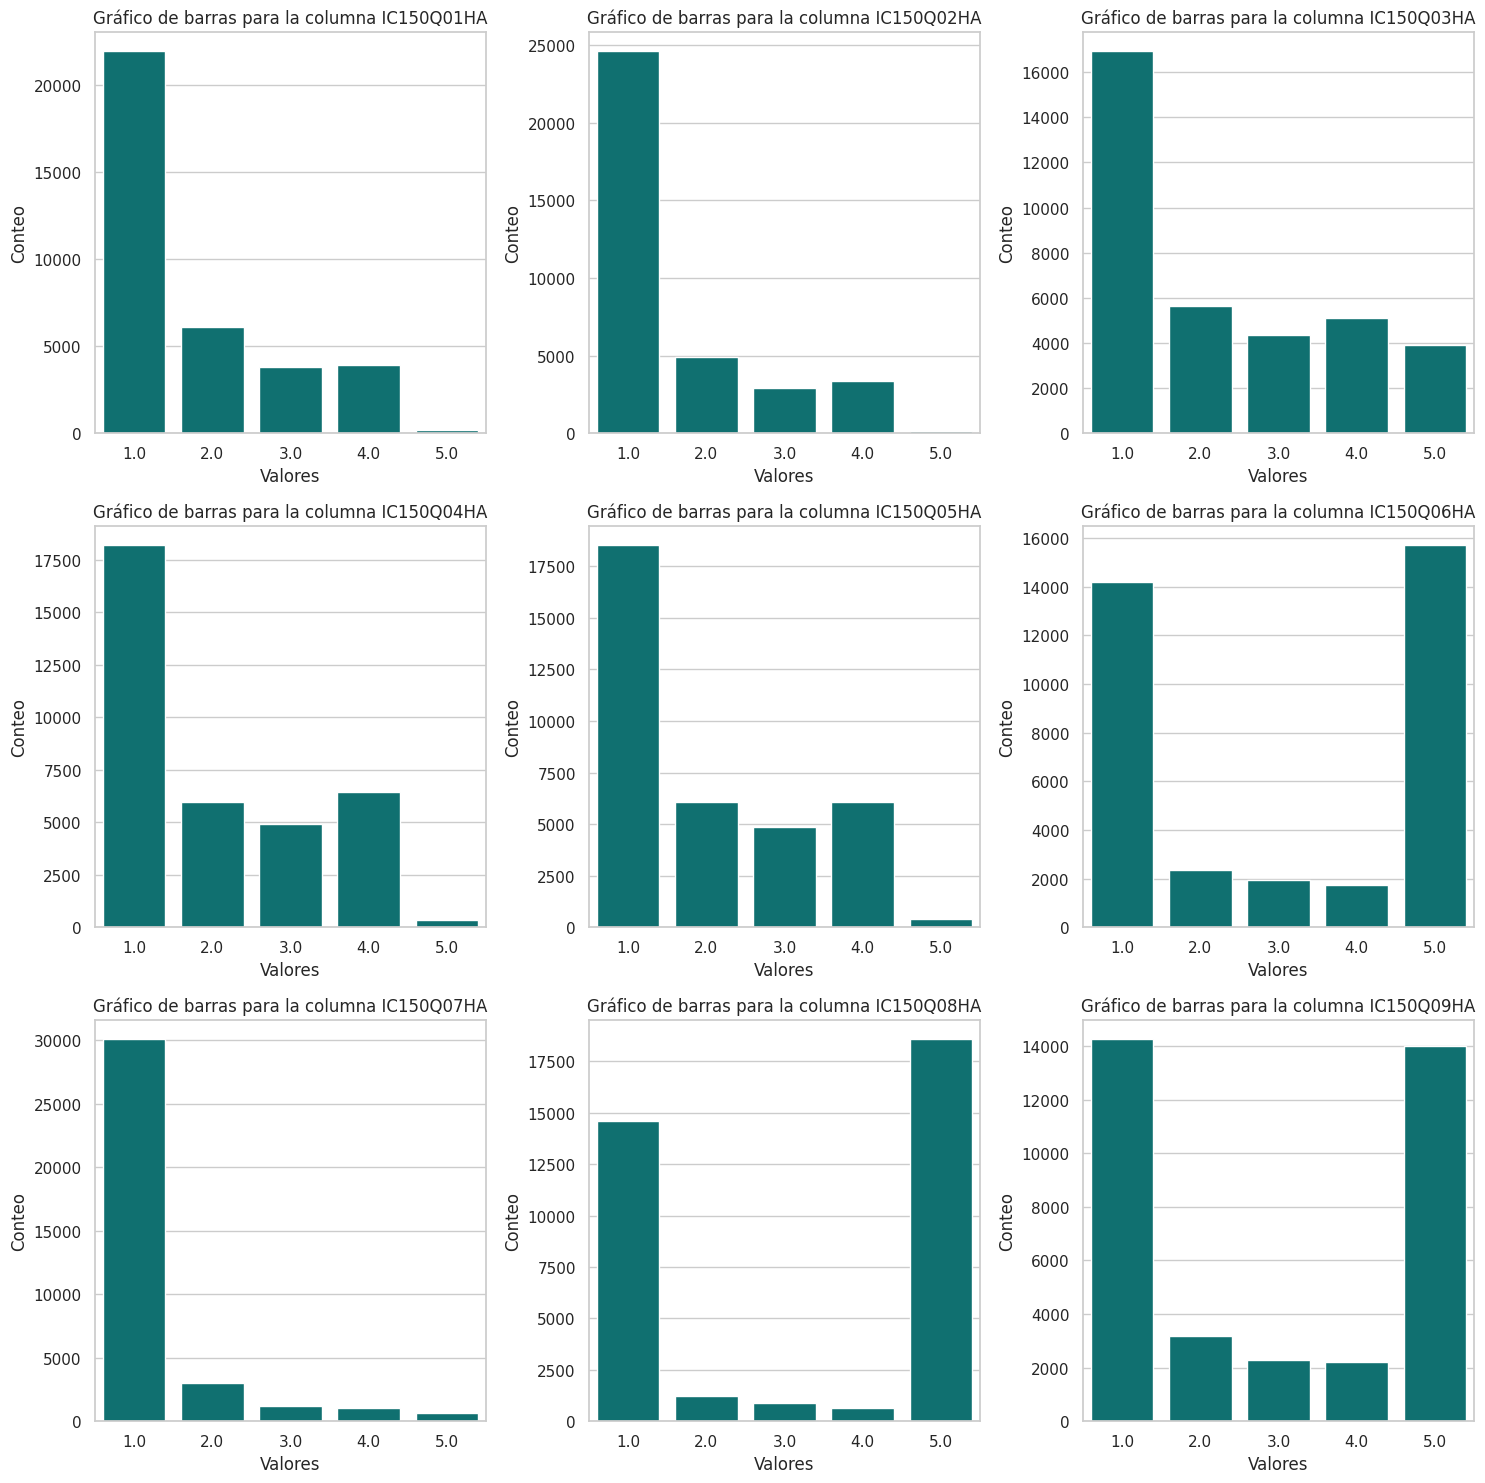

In [ ]:
column_names = [
    "IC150Q01HA",
    "IC150Q02HA",
    "IC150Q03HA",
    "IC150Q04HA",
    "IC150Q05HA",
    "IC150Q06HA",
    "IC150Q07HA",
    "IC150Q08HA",
    "IC150Q09HA"
]

sns.set(style="whitegrid")

num_columns = len(column_names)
num_rows = math.ceil(num_columns / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

for i, column in enumerate(column_names):
    row = i // 3
    col = i % 3

    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), color='teal', ax=axes[row, col])

    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Conteo')
    axes[row, col].set_title(f'Gráfico de barras para la columna {column}')

plt.tight_layout()
plt.show()


Graficamos las columnas de manera muy simple para ver si observamos alguna irregularidad en los datos.

    "IC008Q01TA": "actividades fuera de la escuela: Jugar juegos de un solo jugador",
    "IC008Q02TA": "actividades fuera de la escuela: Jugar juegos en línea colaborativos",
    "IC008Q03TA": "actividades fuera de la escuela: Usar correo electrónico",
    "IC008Q04TA": "actividades fuera de la escuela: Chatear en línea",
    "IC008Q05TA": "actividades fuera de la escuela: Participar en redes sociales",
    "IC008Q07NA": "actividades fuera de la escuela: Jugar juegos en línea a través de redes sociales",
    "IC008Q08TA": "actividades fuera de la escuela: Navegar por Internet por diversión",
    "IC008Q09TA": "actividades fuera de la escuela: Leer noticias en Internet",
    "IC008Q10TA": "actividades fuera de la escuela: Obtener información práctica de Internet",
    "IC008Q11TA": "actividades fuera de la escuela: Descargar música, películas, juegos o software de Internet",
    "IC008Q12TA": "actividades fuera de la escuela: Subir contenido propio para compartir",
    "IC008Q13NA": "actividades fuera de la escuela: Descargar nuevas aplicaciones en un dispositivo móvil"

#   Actividades fuera de la escuela relaccionados con la utilización de dispositivos digitales.
  

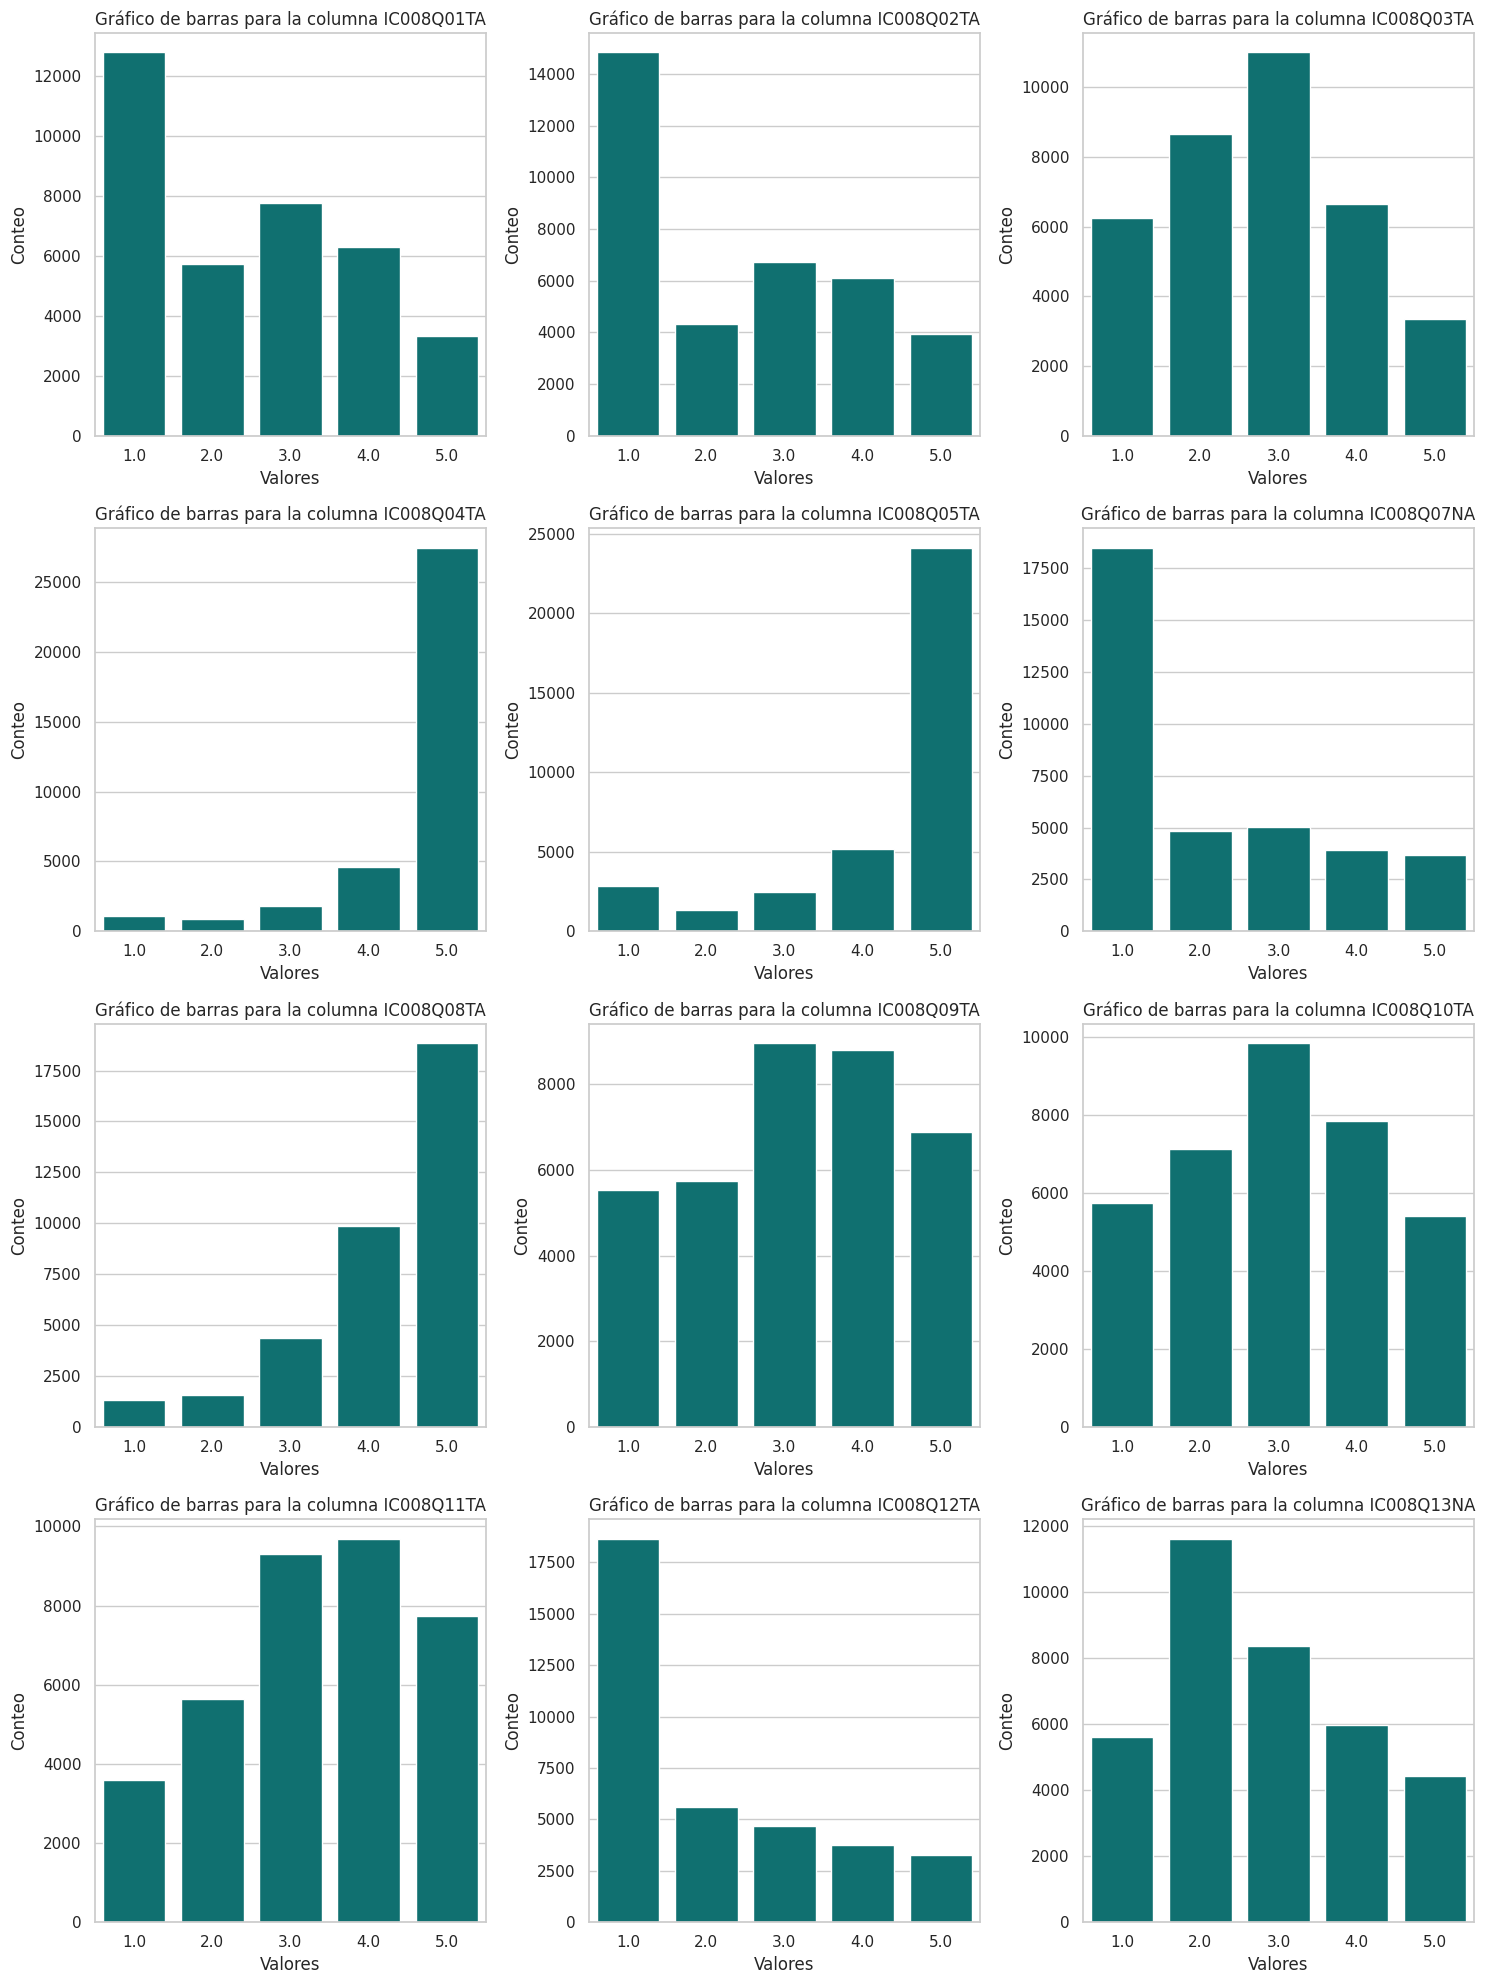

In [ ]:
column_names = ["IC008Q01TA",
"IC008Q02TA",
"IC008Q03TA",
"IC008Q04TA",
"IC008Q05TA",
"IC008Q07NA",
"IC008Q08TA",
"IC008Q09TA",
"IC008Q10TA",
"IC008Q11TA",
"IC008Q12TA",
"IC008Q13NA"]

sns.set(style="whitegrid")

num_columns = len(column_names)
num_rows = math.ceil(num_columns / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

for i, column in enumerate(column_names):
    row = i // 3
    col = i % 3

    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), color='teal', ax=axes[row, col])

    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Conteo')
    axes[row, col].set_title(f'Gráfico de barras para la columna {column}')

plt.tight_layout()
plt.show()


    "IC010Q01TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Navegar por Internet para tareas escolares",
    "IC010Q02NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Navegar por Internet para seguir lecciones, por ejemplo, para encontrar explicaciones",
    "IC010Q03TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar correo electrónico para comunicarse con otros estudiantes sobre tareas escolares",
    "IC010Q04TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar correo electrónico para comunicarse con profesores y enviar tareas o trabajos escolares",
    "IC010Q05NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar redes sociales para comunicarse con otros estudiantes sobre tareas escolares",
    "IC010Q06NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar redes sociales para comunicarse con profesores",
    "IC010Q07TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Descargar, subir o navegar material desde el sitio web de mi escuela",
    "IC010Q08TA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Revisar el sitio web de la escuela para anuncios",
    "IC010Q09NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Hacer tareas en una computadora",
    "IC010Q10NA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Hacer tareas en un dispositivo móvil",
    "IC010Q11HA": "Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar aplicaciones de aprendizaje o sitios web de aprendizaje en una computadora",

Y este otro grupo de variables hace referecia a como usan los dispositivos digitales fuera de las clases.

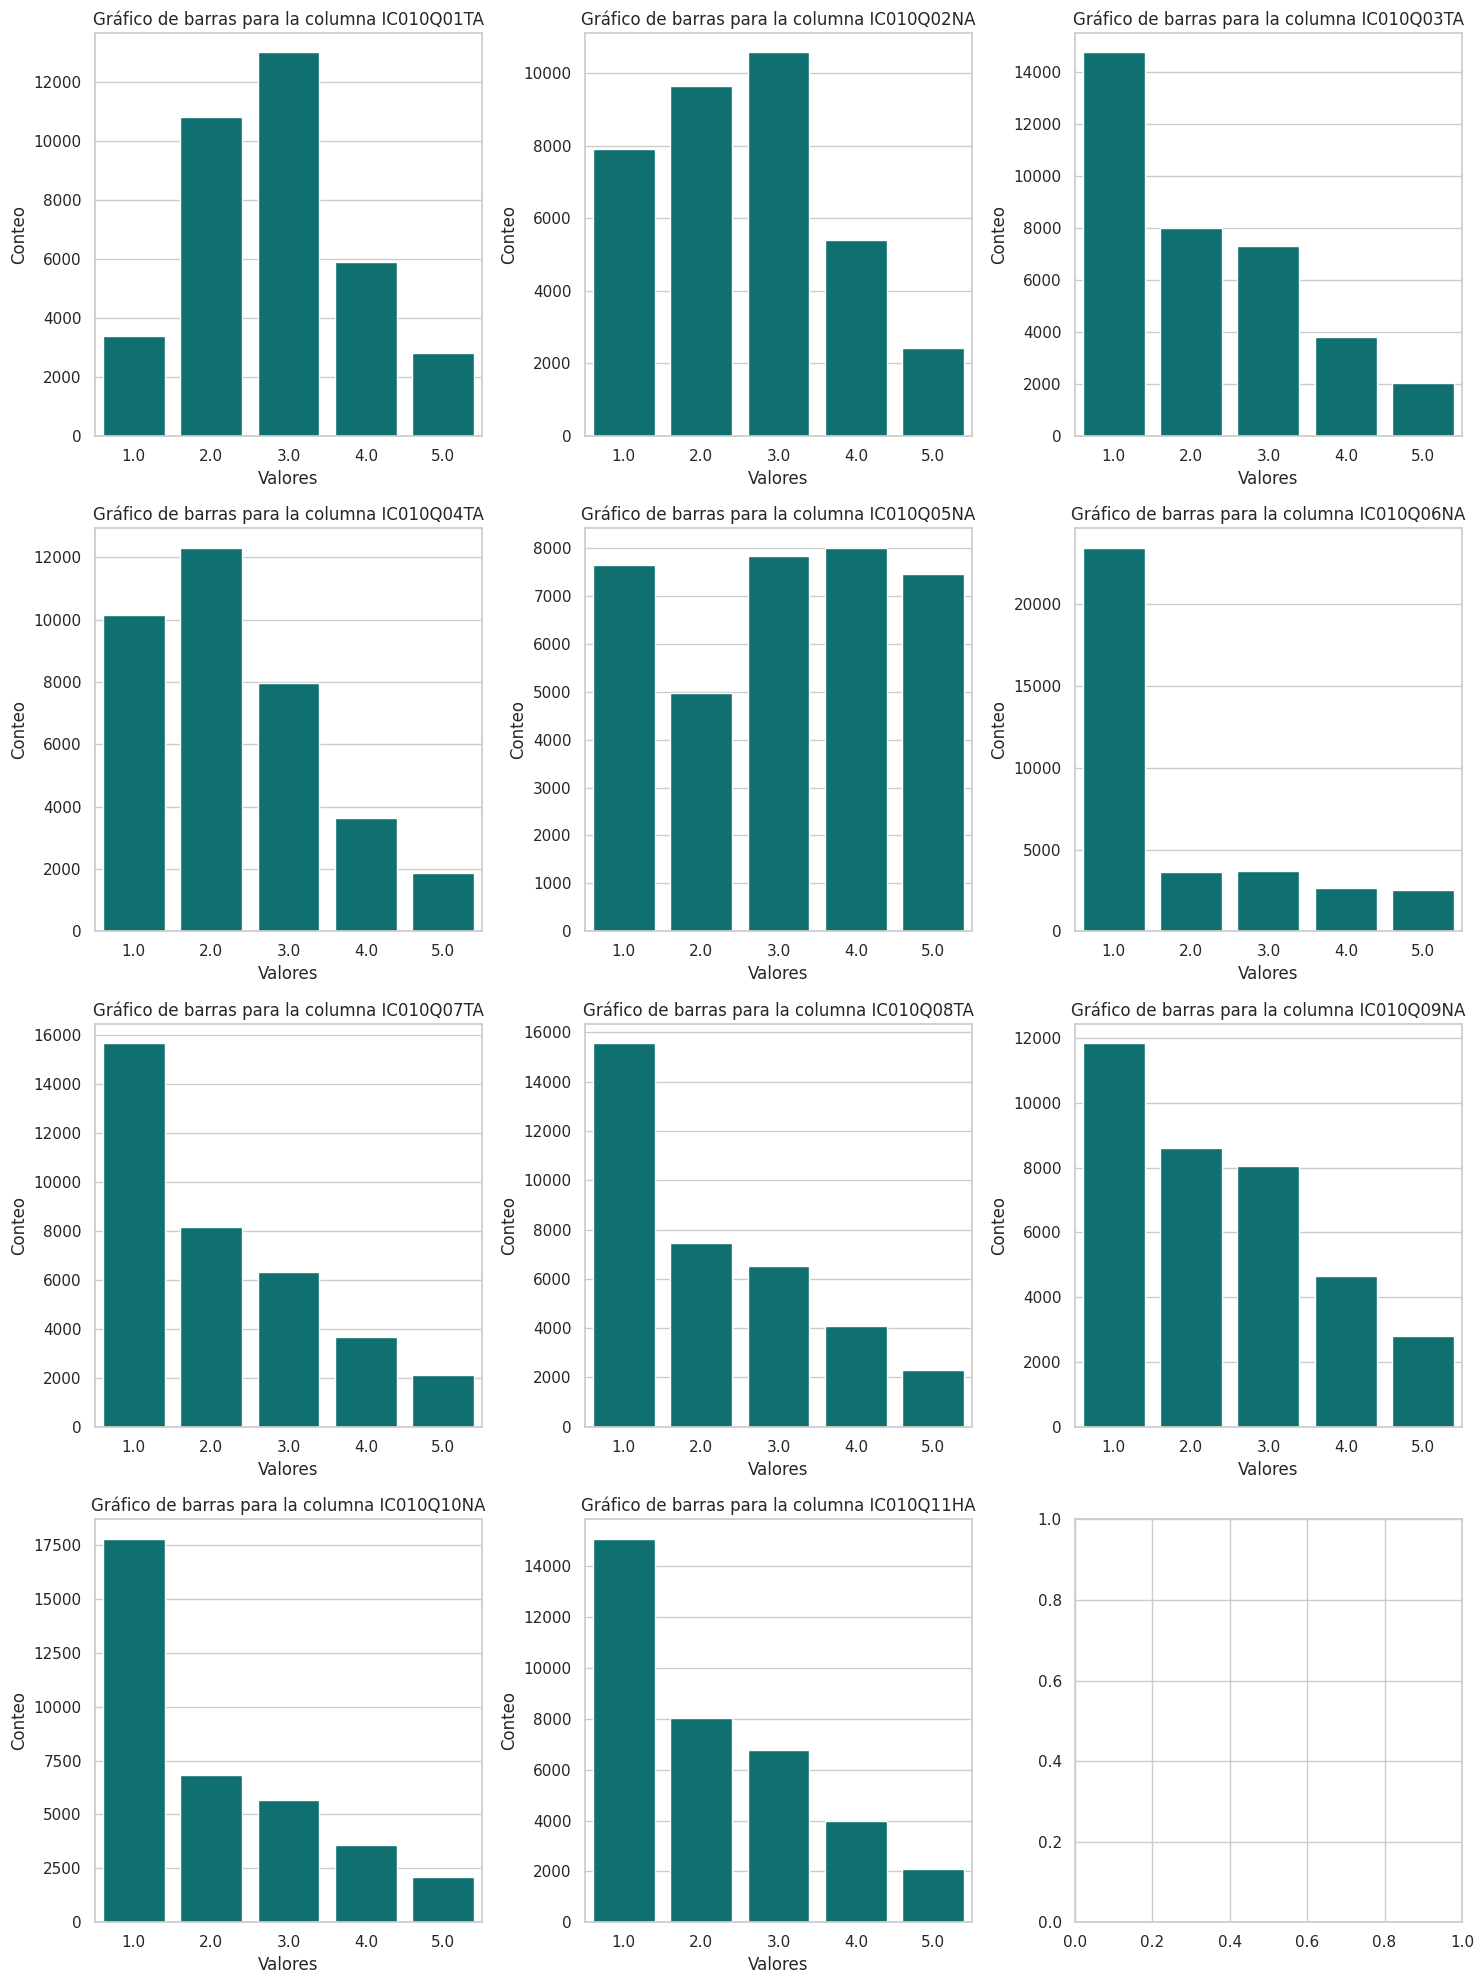

In [ ]:
column_names = ["IC010Q01TA",
"IC010Q02NA",
"IC010Q03TA",
"IC010Q04TA",
"IC010Q05NA",
"IC010Q06NA",
"IC010Q07TA",
"IC010Q08TA",
"IC010Q09NA",
"IC010Q10NA",
"IC010Q11HA"
]

sns.set(style="whitegrid")

num_columns = len(column_names)
num_rows = math.ceil(num_columns / 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

for i, column in enumerate(column_names):
    row = i // 3
    col = i % 3

    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), color='teal', ax=axes[row, col])

    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Conteo')
    axes[row, col].set_title(f'Gráfico de barras para la columna {column}')

plt.tight_layout()
plt.show()

Despues de estos gráficos no observamos nada extraño y podemos asegurar que los datos están listos para ser analizados de forma más exahustiva.

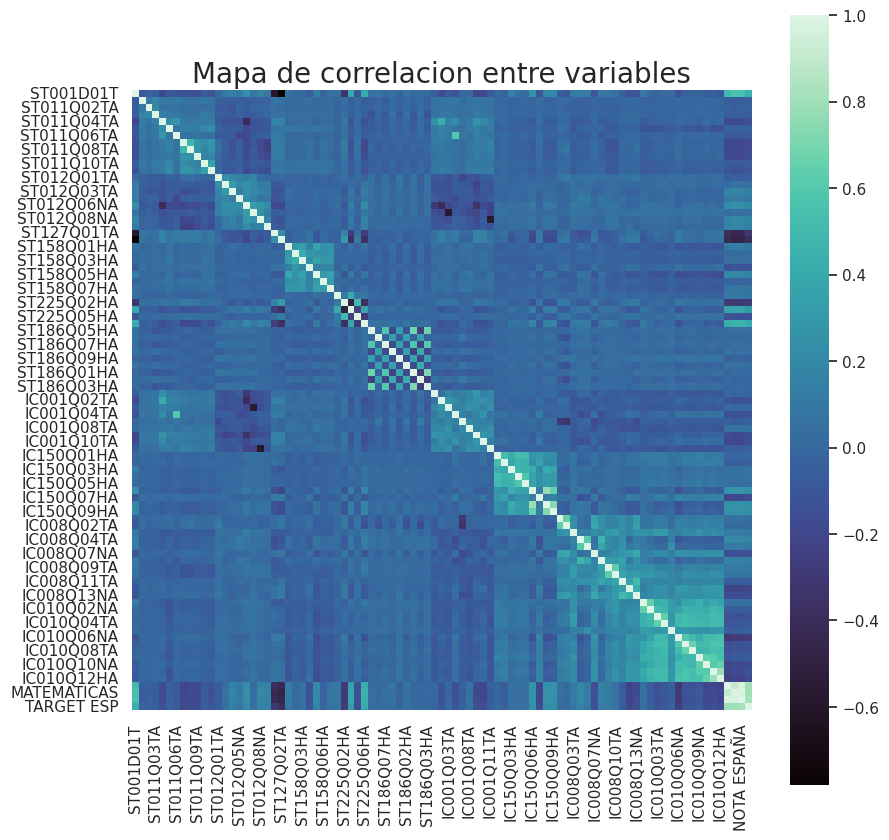

In [ ]:
df_numeric = df.select_dtypes(include='number')
df_corr = df_numeric.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, cmap='mako', annot=False, square=True)
plt.title("Mapa de correlacion entre variables", fontsize=20)
plt.show()

Hemos notado una correlación significativa entre las variables relacionadas con la respuesta a una pregunta común. Es especialmente notable la zona inferior más brillante del gráfico, donde se aprecia una correlación muy evidente entre nuestro objetivo principal y las columnas que se refieren al nivel o curso en el que se encuentra el alumno. Esta asociación parece bastante obvia, ya que un alumno tiende a superar su nivel o curso cuando se encuentra en el adecuado.

# **De forma visual empezamos a intuir que las variables que tratan sobre TICs, RRSS e internet no van a tener tanto peso como en un princio creíamos.**

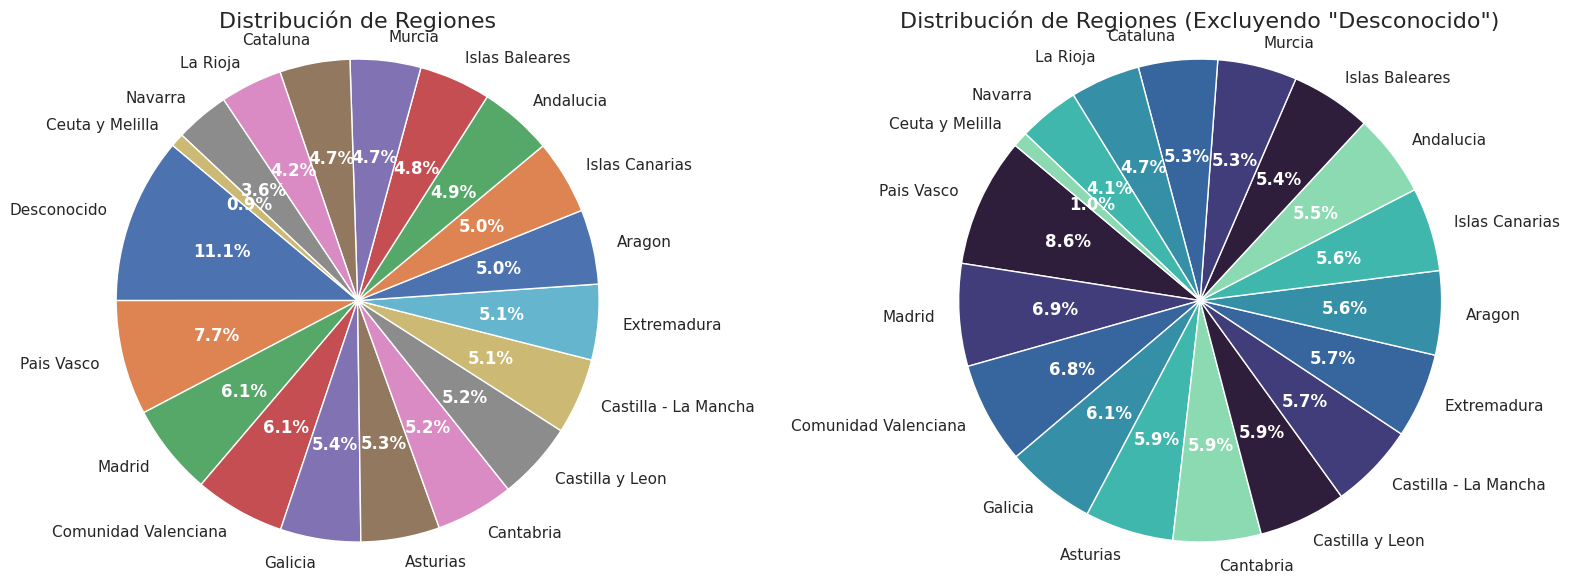

In [ ]:
conteo_por_region = df['REGION'].value_counts()
nombres_provincias = conteo_por_region.index

# Filtrar el DataFrame.
df_filtrado = df[df['REGION'] != 'Desconocido']
conteo_por_region_filtrado = df_filtrado['REGION'].value_counts()
nombres_provincias_filtrado = conteo_por_region_filtrado.index

plt.figure(figsize=(16, 6))

# Subplot 1 - Todas las regiones
plt.subplot(1, 2, 1)
sns.set_palette("mako")
wedges, texts, autotexts = plt.pie(conteo_por_region, labels=nombres_provincias, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set(color='white', fontsize=12, fontweight='bold')

plt.title('Distribución de Regiones', fontsize=16)
plt.axis('equal')

# Subplot 2 - Excluyendo "Desconocido"
plt.subplot(1, 2, 2)
sns.set_palette("mako")
wedges, texts, autotexts = plt.pie(conteo_por_region_filtrado, labels=nombres_provincias_filtrado, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set(color='white', fontsize=12, fontweight='bold')

plt.title('Distribución de Regiones (Excluyendo "Desconocido")', fontsize=16)
plt.axis('equal')

plt.tight_layout()

plt.show()



Podemos observar que el valor que predomina en mayor cantidad es "desconocido". Ignoramos por qué esta pregunta no ha sido respondida en absoluto. Una hipótesis posible es que quizás estos alumnos no recibieron el cuestionario completo y solo completaron el examen de las dos materias.

En el segundo gráfico, se presentan los valores correspondientes a cada una de las comunidades, y se destaca que el País Vasco muestra la participación más alta, con un  8.6%.

# **Los criterios para la distribución de los exámenes en pisa son los siguientes**:

1. Muestra Representativa: Para que los resultados sean representativos a nivel nacional e internacional, se selecciona una muestra aleatoria de escuelas y estudiantes de cada país participante. La muestra debe ser lo suficientemente grande y diversa para reflejar la población estudiantil en términos de género, edad, ubicación geográfica, nivel socioeconómico y otros factores relevantes.

2. Proceso de Muestreo: La OCDE trabaja en conjunto con las autoridades educativas de cada país para definir el proceso de muestreo. Esto puede incluir la selección aleatoria de escuelas y estudiantes a partir de listas de escuelas y poblaciones estudiantiles proporcionadas por los países.

3. Inclusión de Escuelas y Estudiantes: Las escuelas y estudiantes seleccionados para participar en PISA son notificados por las autoridades educativas de sus respectivos países. Es importante que las escuelas y estudiantes elegidos participen voluntariamente en las pruebas.

4. Criterios Demográficos: Para garantizar la representatividad, se establecen criterios demográficos específicos para la selección de estudiantes, como la edad y el grado escolar. Se busca que la muestra sea lo más diversa posible.

5. Criterios de Participación: Los estudiantes seleccionados deben cumplir con ciertos criterios de elegibilidad para participar en PISA. Por ejemplo, no haber repetido el grado que corresponde a su edad y no haber completado formalmente la educación obligatoria.

6. Equilibrio de Género y Grupos Socioeconómicos: Se hace un esfuerzo por equilibrar la muestra en términos de género y grupos socioeconómicos para garantizar una representación equitativa de diferentes segmentos de la población estudiantil.

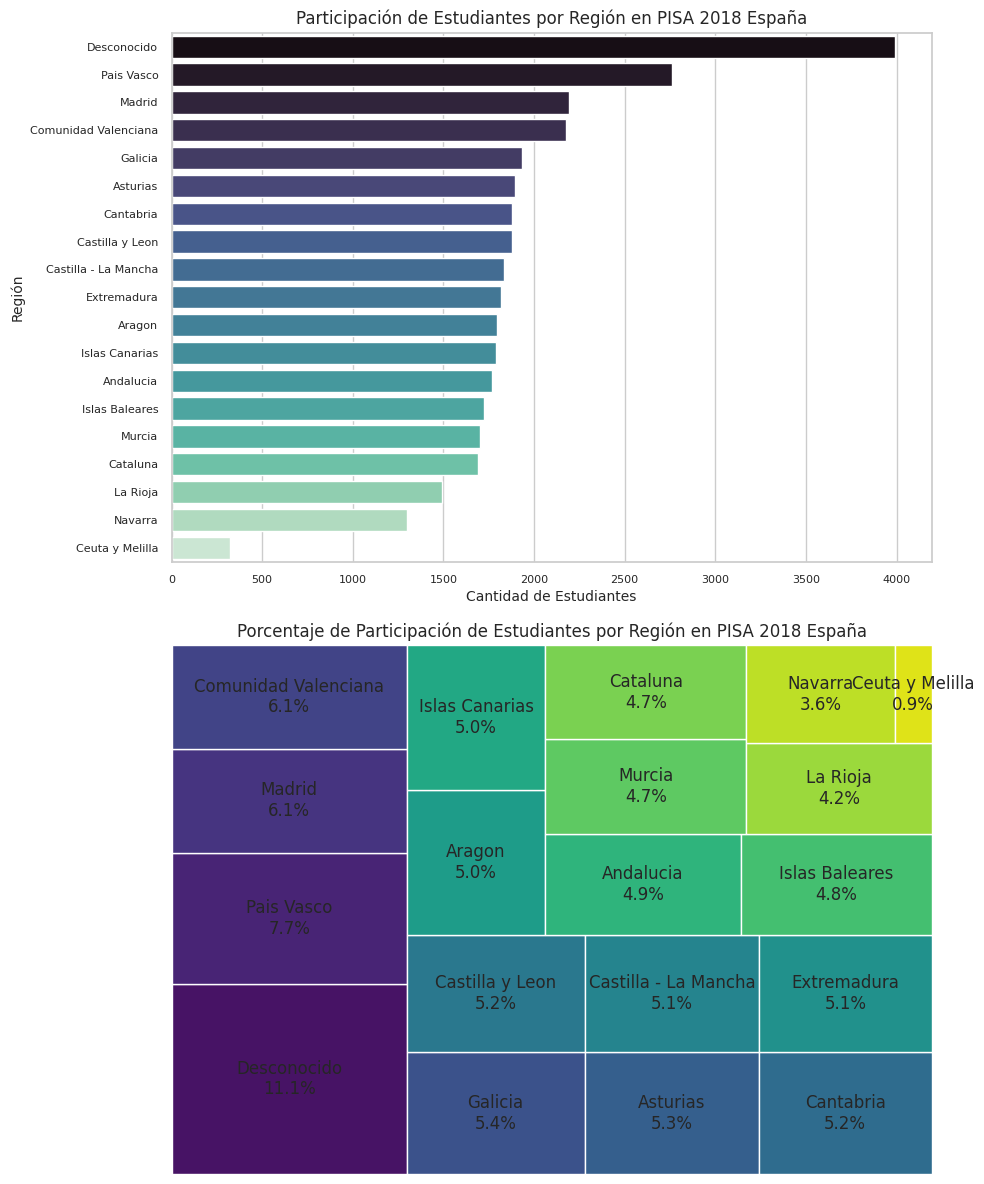

In [ ]:
# Calcular el recuento de cada región
region_participation = df['REGION'].value_counts()

# Calcular el porcentaje de participación por región
region_percentage = (df['REGION'].value_counts() / len(df)) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico de barras horizontal
sns.barplot(x=region_participation.values, y=region_participation.index, palette='mako', ax=ax1)
ax1.set_title('Participación de Estudiantes por Región en PISA 2018 España', fontsize=12)
ax1.set_xlabel('Cantidad de Estudiantes', fontsize=10)
ax1.set_ylabel('Región', fontsize=10)
ax1.tick_params(labelsize=8)

# Gráfico de treemap
squarify.plot(sizes=region_percentage.values,
              label=[f'{reg}\n{perc:.1f}%'
                     for reg, perc in zip(region_percentage.index, region_percentage.values)],
              color=sns.color_palette('viridis', len(region_percentage)), ax=ax2)

ax2.set_title('Porcentaje de Participación de Estudiantes por Región en PISA 2018 España', fontsize=12)
ax2.axis('off')
ax2.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

Estos dos gráficos muestran lo mismo pero de dos maneras distintas. Elegiremos cual mostrar en la presentación.

In [ ]:
# Calcula la nota media por comunidad
media_comunidades = df.groupby('REGION')['NOTA ESPAÑA'].mean().reset_index()
print(media_comunidades)

                  REGION  NOTA ESPAÑA
0              Andalucia   475.082905
1                 Aragon   498.885298
2               Asturias   496.704404
3              Cantabria   503.243394
4   Castilla - La Mancha   485.773412
5        Castilla y Leon   505.075474
6               Cataluna   491.534905
7        Ceuta y Melilla   490.521292
8   Comunidad Valenciana   485.927025
9            Desconocido   485.140238
10           Extremadura   475.918722
11               Galicia   506.463356
12        Islas Baleares   486.823993
13        Islas Canarias   467.409475
14              La Rioja   491.802697
15                Madrid   478.808376
16                Murcia   503.143018
17               Navarra   526.182644
18            Pais Vasco   491.436177


In [ ]:
media_nacional = df['NOTA ESPAÑA'].mean()

# Comparar la nota de una comunidad con la media nacional
def comparar_con_media(row):
    if row['NOTA ESPAÑA'] >= media_nacional:
        return True
    elif row['NOTA ESPAÑA'] < media_nacional:
        return False
    else:
        return True

# Aplica la función
media_comunidades['Comparación'] = media_comunidades.apply(comparar_con_media, axis=1)

# Filtra 'Desconocido'
comunidades_filtradas = media_comunidades[media_comunidades['REGION'] != 'Desconocido']
comunidades_df = comunidades_filtradas[['REGION', 'Comparación']]

In [ ]:
comunidades_df.rename(columns={'REGION': 'NAME_1'}, inplace=True) #Para hacer merge con las latitudes y longitudes tenemos que adaptar los nombres.

<ipython-input-74-952da3796bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunidades_df.rename(columns={'REGION': 'NAME_1'}, inplace=True) #Para hacer merge con las latitudes y longitudes tenemos que adaptar los nombres.


In [ ]:
mapeo_nombres = {
    'Andalucia': 'Andalucía',
    'Aragon': 'Aragón',
    'Asturias': 'Principado de Asturias',
    'Cantabria': 'Cantabria',
    'Castilla - La Mancha': 'Castilla-La Mancha',
    'Castilla y Leon': 'Castilla y León',
    'Cataluna': 'Cataluña',
    'Ceuta y Melilla': 'Ceuta y Melilla',
    'Comunidad Valenciana': 'Comunidad Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Islas Baleares': 'Islas Baleares',
    'Islas Canarias': 'Islas Canarias',
    'La Rioja': 'La Rioja',
    'Madrid': 'Comunidad de Madrid',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Comunidad Foral de Navarra',
    'Pais Vasco': 'País Vasco'
}

comunidades_df['NAME_1'] = comunidades_df['NAME_1'].replace(mapeo_nombres)

<ipython-input-75-99396dccf4b2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunidades_df['NAME_1'] = comunidades_df['NAME_1'].replace(mapeo_nombres)


In [ ]:
#Este archivo con las coordenadas de las comunidades de españa ha sido extraido de un repositorio de Github
comunidades = gpd.read_file('/content/drive/MyDrive/spain-comunidad.json')

In [ ]:
resultado = comunidades.merge(comunidades_df, on='NAME_1', how='inner')

In [ ]:
percapita = pd.read_csv('/content/drive/MyDrive/PERCAPITA.csv') #Estos datos han sido extraidos de datosmacro.expasion.com
percapita.rename(columns = {'REGION' : 'NAME_1'}, inplace = True)

In [ ]:
percapita_df = pd.merge(percapita, resultado, on='NAME_1', how='inner')

In [ ]:
percapita_df = percapita_df.drop(['id', 'ISO', 'NAME_0', 'ID_1', 'VARNAME_1', 'HASC_1', 'TYPE_1', 'ENGTYPE_1'], axis=1)


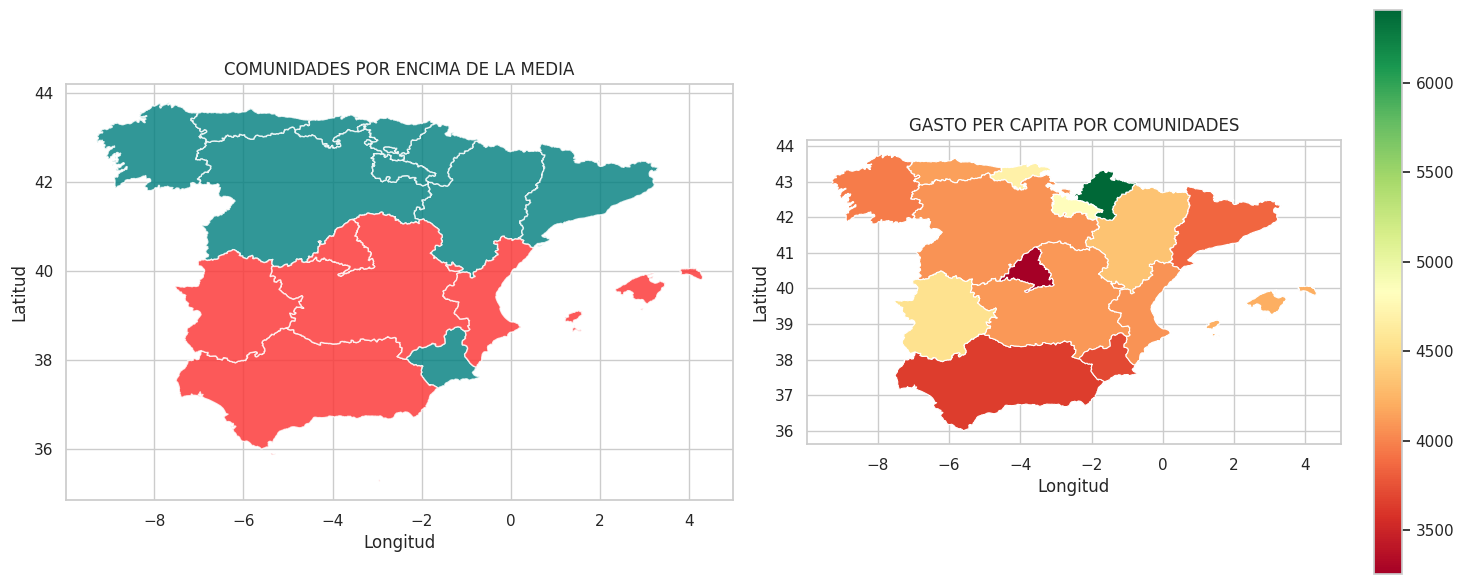

In [ ]:
# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(percapita_df, geometry='geometry')

comunidades_true = resultado[resultado['Comparación'] == True]
comunidades_false = resultado[resultado['Comparación'] == False]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

# Plot 1: Comunidades True y False
comunidades.plot(ax=ax1, color='gray', alpha=0.1)
comunidades_true.plot(ax=ax1, color='teal', alpha=0.8, label='True')
comunidades_false.plot(ax=ax1, color='#FF3333', alpha=0.8, label='False')
ax1.set_title('COMUNIDADES POR ENCIMA DE LA MEDIA')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')

# Plot 2: Mapa de calor PERCAPITA
gdf.plot(column='PERCAPITA', cmap="RdYlGn", linewidth=0.8, ax=ax2, legend=True)
ax2.set_title('GASTO PER CAPITA POR COMUNIDADES')
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')

plt.tight_layout()
plt.show()


# **Observamos en estos mapas que las provincias que mejores notas sacan son las del norte. Por otro lado también vemos que en general son estas mismas provincias las que invierten más dinero en educación**

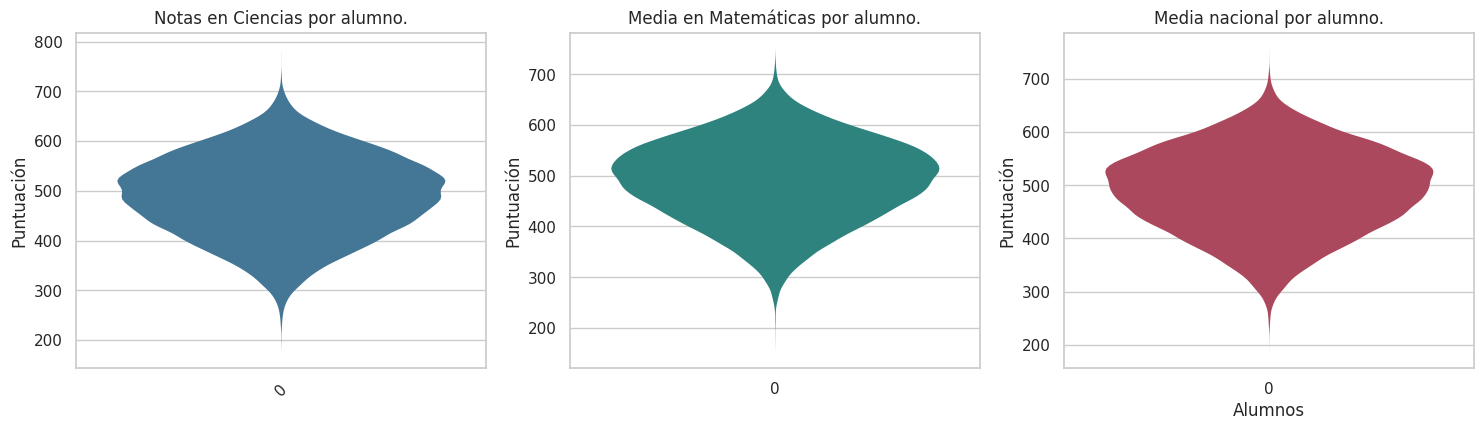

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

# Media Ciencias
plt.subplot(2, 3, 1)
sns.violinplot(data=df['CIENCIAS'], palette='mako', inner="box", linewidth=0)
plt.title('Notas en Ciencias por alumno.')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)

# Media de Matemáticas
plt.subplot(2, 3, 2)
sns.violinplot(data=df["MATEMATICAS"], palette='viridis', inner="box", linewidth=0)
plt.title('Media en Matemáticas por alumno.')
plt.ylabel('Puntuación')

# Media Nacional
plt.subplot(2, 3, 3)
sns.violinplot(data=df["NOTA ESPAÑA"], palette='inferno', inner="box", linewidth=0)
plt.title('Media nacional por alumno.')
plt.ylabel('Puntuación')
plt.xlabel('Alumnos')

plt.tight_layout()
plt.show()

# **En cuanto a la distribución de calificaciones de los estudiantes, observamos que la mayoría de los grupos se encuentran en un rango de 500-550, siendo las distribuciones muy similares en ambos casos.**

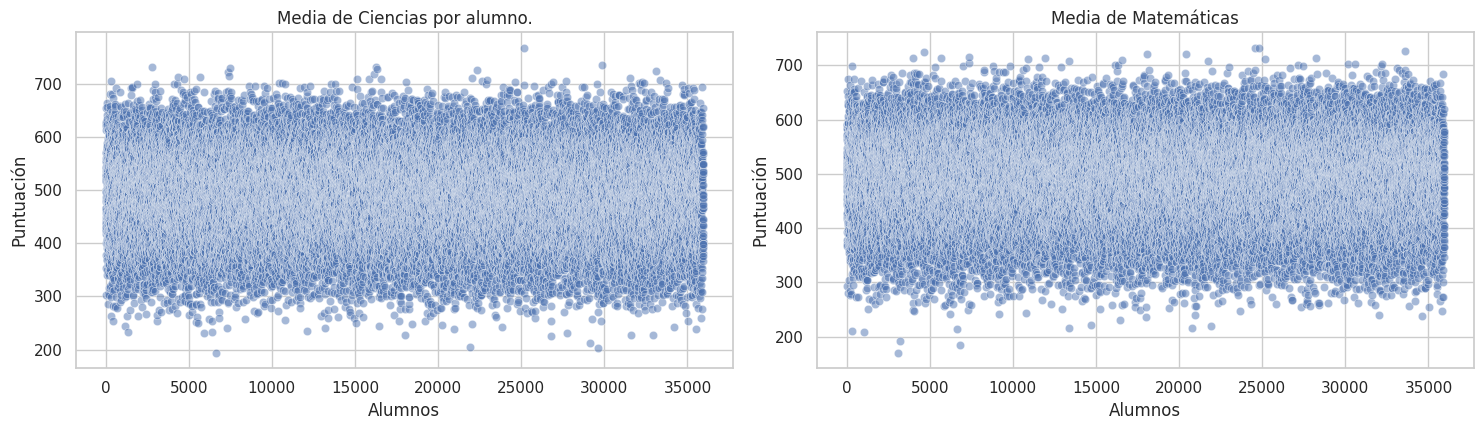

In [ ]:
alumnos = len(df)
color = "mako"

# Cuadricula de gráficos
plt.figure(figsize=(15, 8))

# Primer gráfico - NOTA MEDIA DE CIENCIAS
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x=range(alumnos), y="CIENCIAS", alpha=0.5)
plt.title('Media de Ciencias por alumno.')
plt.xlabel('Alumnos')
plt.ylabel('Puntuación')

# Segundo gráfico - NOTA MEDIA DE MATEMATICAS
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x=range(alumnos), y="MATEMATICAS", alpha=0.5)
plt.title('Media de Matemáticas')
plt.xlabel('Alumnos')
plt.ylabel('Puntuación')

plt.tight_layout()
plt.show()


Mismos datos representados de otra forma.

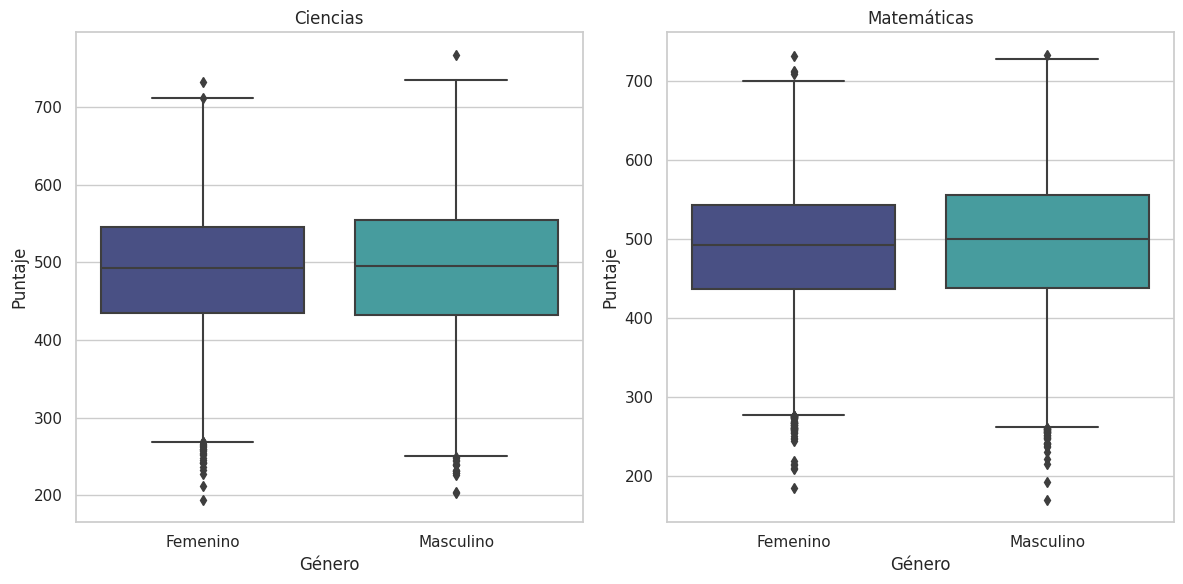

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot para Ciencias
plt.subplot(1, 2, 1)
sns.boxplot(x='GENERO', y='CIENCIAS', data=df, palette='mako')
plt.title('Ciencias')
plt.xlabel('Género')
plt.ylabel('Puntaje')

# Box plot para Matemáticas
plt.subplot(1, 2, 2)
sns.boxplot(x='GENERO', y='MATEMATICAS', data=df, palette='mako')
plt.title('Matemáticas')
plt.xlabel('Género')
plt.ylabel('Puntaje')

plt.tight_layout()
plt.show()

Representación de las calificaciones por sexo y asignatura.

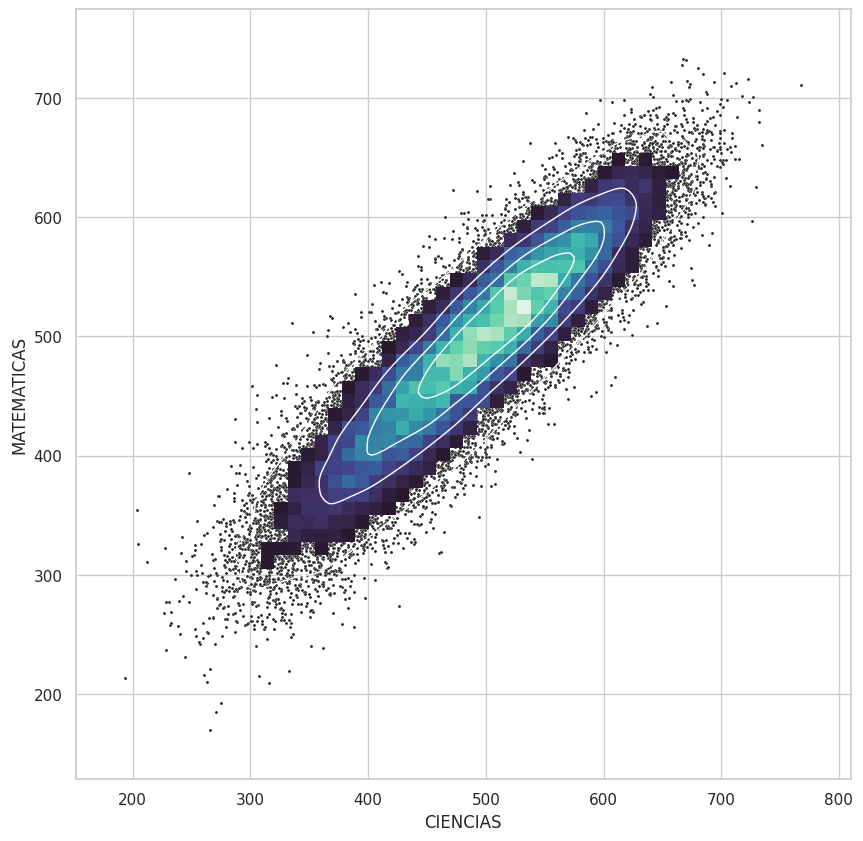

In [ ]:
sns.set_theme(style="whitegrid")

# distribucion de las notas.
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='CIENCIAS', y='MATEMATICAS', s=5, color=".15")
sns.histplot(data=df, x='CIENCIAS', y='MATEMATICAS', bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(data=df, x='CIENCIAS', y='MATEMATICAS', levels=5, color="w", linewidths=1)

plt.show()

# **La distribución de las calificaciones en matemáticas y ciencias muestra una relación clara: los resultados exhiben una tendencia ascendente. Es más probable que los estudiantes con calificaciones más altas en ciencias también obtengan una buena puntuación en matemáticas, ya que ambas están directamente relacionadas. La mayoría de las calificaciones se concentran en el rango intermedio.**

In [ ]:
df_sorted = df.sort_values(by='CIENCIAS', ascending=False)
top_10_c = df_sorted.head(10)

In [ ]:
selected_columns = top_10_c[['REGION', 'GENERO', 'CIENCIAS', "ST127Q01TA", "ST127Q02TA"]]
top_10_c = selected_columns.copy()
top_10_c.rename(columns=dic_variables, inplace=True)

In [ ]:
top_10_c

REGION     GENERO  CIENCIAS  REPETICIÓN DE CURSO ISCED1  \
25160           Madrid  Masculino  767.8636                         1.0   
29852   Islas Canarias  Masculino  734.9176                         1.0   
16283  Castilla y Leon  Masculino  732.0729                         1.0   
2800           Galicia   Femenino  732.0073                         1.0   
7499           Galicia  Masculino  729.5026                         1.0   
16349         Cataluna  Masculino  727.0109                         1.0   
22361           Murcia  Masculino  725.8231                         1.0   
33110        Cantabria  Masculino  723.6489                         1.0   
7375    Islas Baleares  Masculino  722.4277                         1.0   
16137  Castilla y Leon  Masculino  717.3282                         1.0   

       REPETICIÓN DE CURSO ISCED2  
25160                         1.0  
29852                         1.0  
16283                         1.0  
2800                          1.0  
7499                          1.0  
16349                         1.0  
22361                         1.0  
33110                         1.0  
7375                          1.0  
16137                         1.0

Al analizar el grupo de estudiantes que conforman el top 10 en ciencias, se observan los siguientes patrones: En su mayoría, son estudiantes masculinos, con una proporción de 9 hombres por cada 1 mujer. También, es interesante notar que los dos estudiantes con las puntuaciones más altas provienen de provincias cuyo rendimiento promedio es bastante bajo. Además, la mayoría de estas provincias se encuentran en la zona de aprobación en términos de calificaciones. Lo más destacable es que ningúno de ellos ha repetido en ninguna etapa.

In [ ]:
df_sorted = df.sort_values(by='CIENCIAS', ascending=True)
last_10_c = df_sorted.head(10)

In [ ]:
selected_columns = last_10_c[['REGION', 'GENERO', 'CIENCIAS', "ST127Q01TA", "ST127Q02TA"]]
last_10_c = selected_columns.copy()
last_10_c.rename(columns=dic_variables, inplace=True)

In [ ]:
last_10_c

REGION     GENERO  CIENCIAS  REPETICIÓN DE CURSO ISCED1  \
6660            Madrid   Femenino  193.7475                         3.0   
29605        Andalucia  Masculino  203.3180                         2.0   
21907           Aragon  Masculino  204.3360                         2.0   
29126         Cataluna   Femenino  212.2282                         2.0   
26815           Madrid  Masculino  226.1294                         1.0   
32898           Madrid   Femenino  227.6548                         2.0   
31593         Cataluna  Masculino  227.9923                         2.0   
18013  Castilla y Leon  Masculino  228.3944                         3.0   
27743         Cataluna  Masculino  231.0726                         1.0   
5904        Pais Vasco  Masculino  231.5530                         2.0   

       REPETICIÓN DE CURSO ISCED2  
6660                          2.0  
29605                         2.0  
21907                         1.0  
29126                         1.0  
26815                         2.0  
32898                         1.0  
31593                         2.0  
18013                         3.0  
27743                         1.0  
5904                          1.0

En otro análisis, se evidencia que hay una proporción mayor de hombres, con una relación de 7 hombres por cada 3 mujeres. Además, de manera inesperada, estos estudiantes pertenecen a la provincia ubicada en la zona norte. En contraste con el grupo top_10_c, la mayoría de estos estudiantes han repetido prácticamente todos los cursos, tanto en primaria como en secundaria. La etiqueta #ST127Q01TA se refiere a la cantidad de veces que han repetido un curso en el ciclo de primaria, donde 1.0 indica que nunca lo han repetido, 2.0 significa que lo han repetido una vez y 3.0 denota que lo han repetido dos o más veces.

In [ ]:
df_sorted = df.sort_values(by='MATEMATICAS', ascending=False)
top_10_m = df_sorted.head(10)

In [ ]:
selected_columns = top_10_m[['REGION', 'GENERO', 'MATEMATICAS', "ST127Q01TA", "ST127Q02TA"]]
top_10_m = selected_columns.copy()
top_10_m.rename(columns=dic_variables, inplace=True)

In [ ]:
top_10_m

REGION     GENERO  MATEMATICAS  REPETICIÓN DE CURSO ISCED1  \
24794        Cataluna  Masculino     732.9610                         1.0   
24543      Pais Vasco   Femenino     731.4336                         1.0   
33575        La Rioja  Masculino     727.1594                         1.0   
4635      Desconocido  Masculino     725.1279                         1.0   
18062          Aragon  Masculino     720.5168                         1.0   
20407     Desconocido  Masculino     720.1894                         1.0   
7375   Islas Baleares  Masculino     715.5140                         1.0   
3992        Cantabria  Masculino     714.4380                         1.0   
28220        La Rioja  Masculino     713.3275                         1.0   
11931        Cataluna  Masculino     713.2097                         1.0   

       REPETICIÓN DE CURSO ISCED2  
24794                         1.0  
24543                         1.0  
33575                         1.0  
4635                          1.0  
18062                         1.0  
20407                         1.0  
7375                          1.0  
3992                          1.0  
28220                         1.0  
11931                         1.0

En matemaáticas el patrón es el mismo.

In [ ]:
df_sorted = df.sort_values(by='MATEMATICAS', ascending=True)
last_10_m = df_sorted.head(10)

In [ ]:
selected_columns = last_10_m[['REGION', 'GENERO', 'MATEMATICAS', "ST127Q01TA", "ST127Q02TA"]]
last_10_m = selected_columns.copy()
last_10_m.rename(columns=dic_variables, inplace=True)

In [ ]:
last_10_m

REGION     GENERO  MATEMATICAS  \
3120            Desconocido  Masculino     169.9839   
6806            Desconocido   Femenino     185.4013   
3240   Comunidad Valenciana  Masculino     192.4233   
1041            Desconocido   Femenino     209.3063   
323               Cantabria   Femenino     210.0921   
6660                 Madrid   Femenino     213.7613   
20791                Aragon  Masculino     215.1901   
13383       Castilla y Leon   Femenino     215.9267   
21933        Islas Canarias   Femenino     219.5660   
14702                Madrid  Masculino     221.2098   

       REPETICIÓN DE CURSO ISCED1  REPETICIÓN DE CURSO ISCED2  
3120                          3.0                         1.0  
6806                          2.0                         2.0  
3240                          3.0                         1.0  
1041                          2.0                         1.0  
323                           2.0                         2.0  
6660                          3.0                         2.0  
20791                         2.0                         1.0  
13383                         2.0                         2.0  
21933                         2.0                         2.0  
14702                         2.0                         3.0

# **Podemos deducir que una de las variables que puede llegar a influir en el rendimieno de los alumnos es que anteriormente hayan o no repetido, es u n patron que se repite de forma muy clara tanto en los resultados de Matemáticas como en los resultados de Ciencias.**

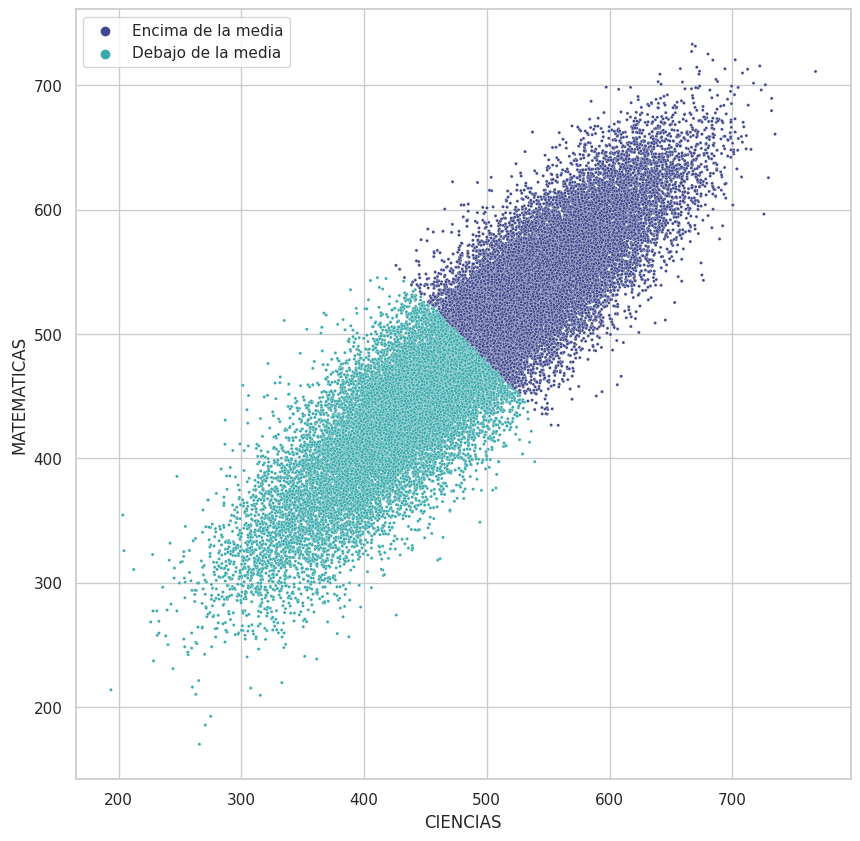

In [ ]:
mapeo = {0.0: 'Debajo de la media', 1.0: 'Encima de la media'}
df['TARGET ESP'] = df['TARGET ESP'].replace(mapeo)

#Distribucion del target
sns.set_theme(style="whitegrid")

# distribucion de las notas.
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='CIENCIAS', y='MATEMATICAS', hue= 'TARGET ESP', s=5, color=".15", palette = 'mako')
plt.legend()
plt.show()

In [ ]:
mapeo_inverso = {'Debajo de la media': 0.0, 'Encima de la media': 1.0}
df['TARGET ESP'] = df['TARGET ESP'].map(mapeo_inverso)

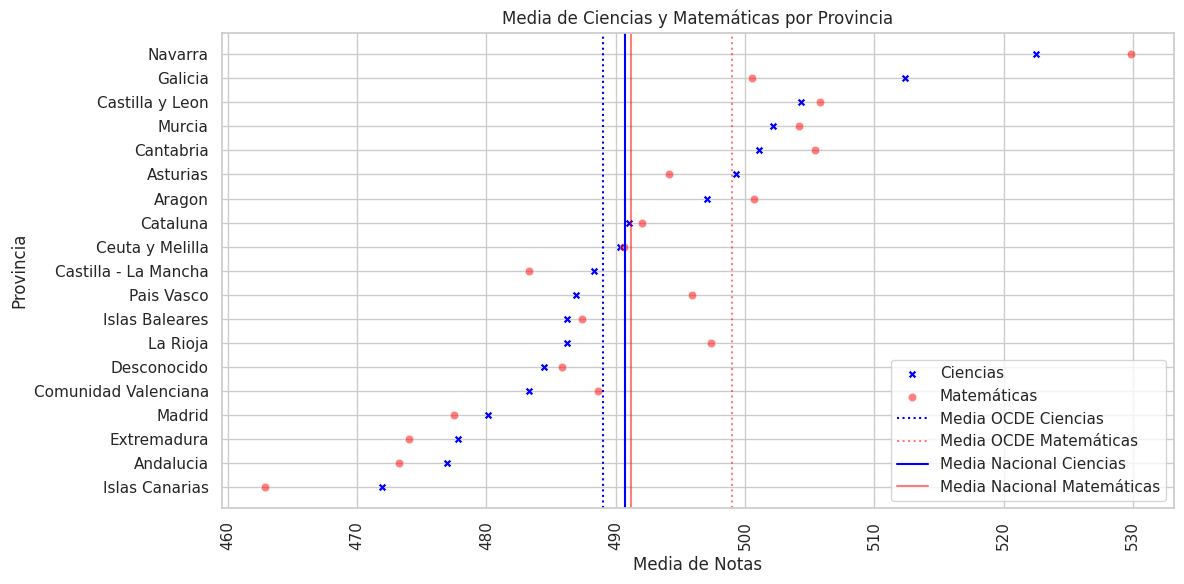

In [ ]:
media_oecd_ciencias = 489
media_oecd_matematicas = 499

media_provincia_ciencias = df.groupby('REGION')['CIENCIAS'].mean().reset_index()
media_provincia_matematicas = df.groupby('REGION')['MATEMATICAS'].mean().reset_index()

media_nacional_ciencias = df['CIENCIAS'].mean()
media_nacional_matematicas = df['MATEMATICAS'].mean()

color_ciencias = "blue"
color_matematicas = "red"
# Ordenado
media_provincia_ciencias = media_provincia_ciencias.sort_values(by='CIENCIAS', ascending=False)
media_provincia_matematicas = media_provincia_matematicas.sort_values(by='MATEMATICAS', ascending=False)

#scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CIENCIAS',
                y='REGION',
                data=media_provincia_ciencias,
                color= color_ciencias,
                marker = 'X',
                label='Ciencias')

sns.scatterplot(x='MATEMATICAS',
                y='REGION',
                data=media_provincia_matematicas,
                color=color_matematicas,
                alpha=0.5,
                label='Matemáticas')

#Media OECD Ciencias
plt.axvline(x=media_oecd_ciencias,
            color=color_ciencias,
            linestyle='dotted',
            label='Media OCDE Ciencias')
# Media OECD Matematicas
plt.axvline(x=media_oecd_matematicas,
            color= color_matematicas,
            linestyle='dotted',
            alpha=0.5,
            label='Media OCDE Matemáticas')
# Media nacional Ciencias
plt.axvline(x=media_nacional_ciencias,
            color=color_ciencias,
            linestyle='solid',
            label='Media Nacional Ciencias')
# Media nacional Matematicas
plt.axvline(x=media_nacional_matematicas,
            color=color_matematicas,
            linestyle='solid',
            alpha=0.5,
            label='Media Nacional Matemáticas')

plt.title('Media de Ciencias y Matemáticas por Provincia')
plt.xlabel('Media de Notas')
plt.ylabel('Provincia')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el gráfico se muestran las medias de calificaciones de cada provincia, junto con las medias nacionales y las medias de la OCDE para cada asignatura.

En cuanto a las conclusiones, se observa que en matemáticas, muy pocas provincias superan a la OCDE, mientras que en ciencias, la situación es un poco más alentadora.

Además, se nota que, en general, las calificaciones más altas se obtienen en matemáticas en comparación con ciencias. Sin embargo, en las calificaciones más bajas, la tendencia se invierte, siendo ciencias superiores a matemáticas.

La diferencia entre la calificación más alta y la más baja es una brecha de aproximadamente 65 puntos. Lo que tampoco implica una gran diferencia.

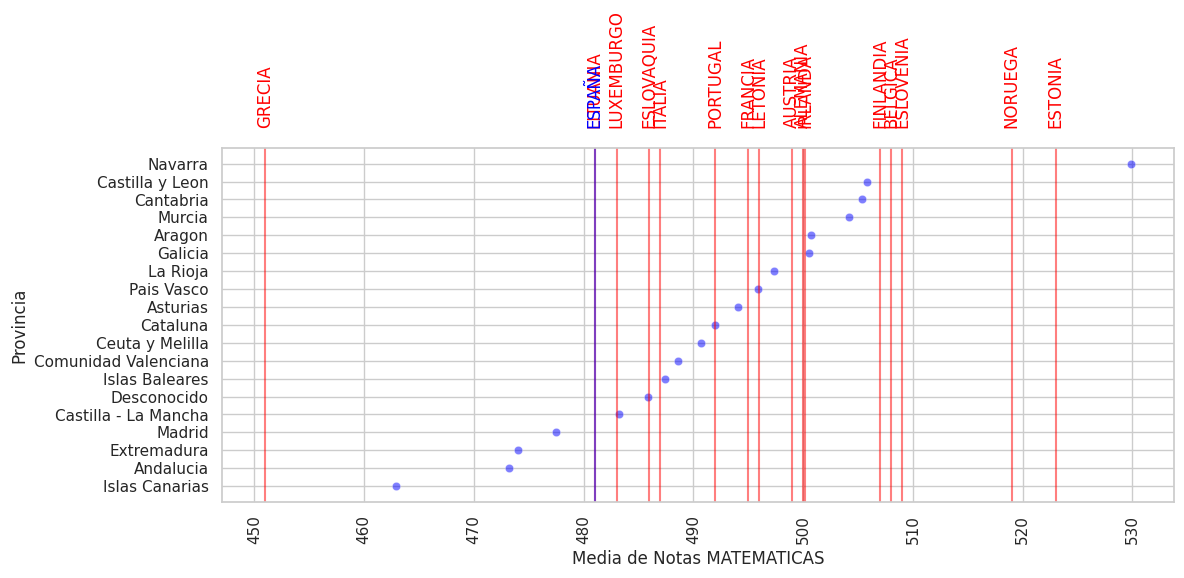

In [ ]:
paises_matematicas = {
    "grecia": (451, 'red'),
    "lituania": (481, 'red'),
    "luxemburgo": (483, 'red'),
    "eslovaquia": (486, 'red'),
    "italia": (487, 'red'),
    "portugal": (492, 'red'),
    "francia": (495, 'red'),
    "letonia": (496, 'red'),
    "austria": (499, 'red') ,
    "alemania": (500, 'red'),
    "irlanda": (500.2, 'red'),
    "finlandia": (507, 'red'),
    "belgica": (508, 'red'),
    "eslovenia": (509, 'red'),
    "noruega": (519, 'red'),
    "estonia": (523, 'red'),
    "españa" : (481, 'blue')
}

media_oecd_matematicas = 499
media_provincia_matematicas = df.groupby('REGION')['MATEMATICAS'].mean().reset_index()
media_nacional_matematicas = df['MATEMATICAS'].mean()

# Ordenar
media_provincia_matematicas = media_provincia_matematicas.sort_values(by='MATEMATICAS', ascending=False)
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='MATEMATICAS',
                y='REGION',
                data=media_provincia_matematicas,
                color='blue',
                alpha=0.5,)

# líneas verticales con nombres de países y colores
for pais, (posicion, color) in paises_matematicas.items():
    plt.axvline(x=posicion, linestyle='solid', alpha=0.5, color=color)
    plt.text(posicion, -2, pais.upper(), fontsize=12, rotation=90, ha='center', va='bottom', color=color)

plt.xlabel('Media de Notas MATEMATICAS')
plt.ylabel('Provincia')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En un contexto global en comparación con otros países, España obtiene resultados desfavorables. En matemáticas, se sitúa en la antepenúltima posición, superando únicamente a Grecia. Sin embargo, los resultados de Navarra destacan considerablemente, ya que superan en casi 10 puntos al país de la OCDE con el mejor desempeño en promedio, Estonia.

# **Es probable que este éxito de Navarra esté relacionado con la inversión que realiza en educación, como se refleja en los gráficos de mapas anteriores.**

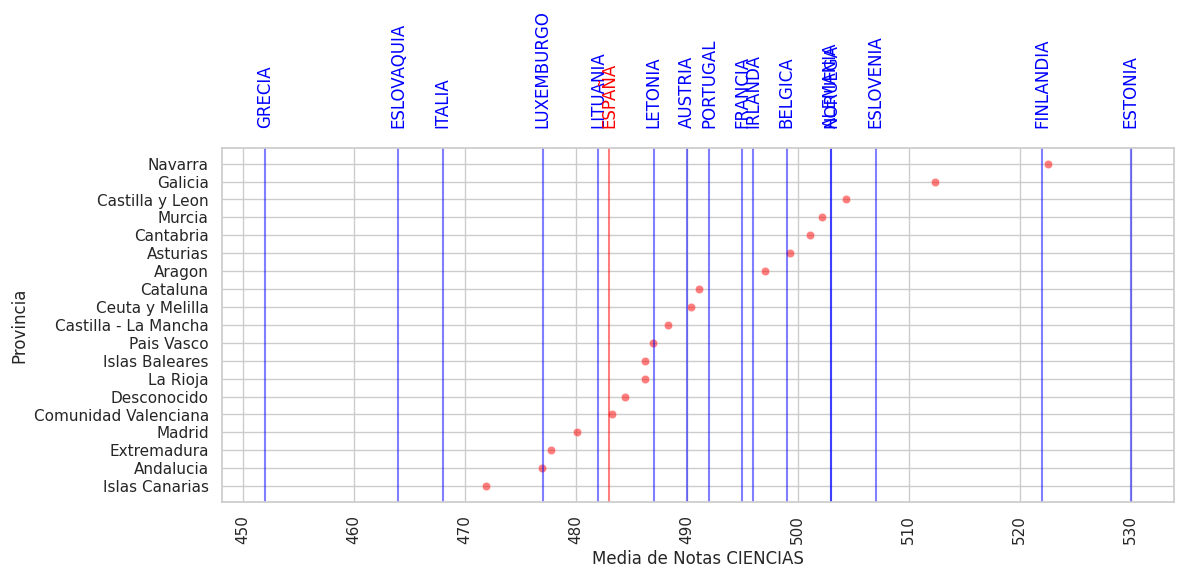

In [ ]:
paises_ciencias = {
    "grecia": (452, 'blue'),
    "lituania": (482, 'blue'),
    "luxemburgo": (477, 'blue'),
    "eslovaquia": (464, 'blue'),
    "italia": (468, 'blue'),
    "portugal": (492, 'blue'),
    "francia": (495, 'blue'),
    "letonia": (487, 'blue'),
    "austria": (490, 'blue'),
    "alemania": (503, 'blue'),
    "irlanda": (496, 'blue'),
    "finlandia": (522, 'blue'),
    "belgica": (499, 'blue'),
    "eslovenia": (507, 'blue'),
    "noruega": (503, 'blue'),
    "estonia": (530, 'blue'),
    "españa": (483, 'red')
}

media_oecd_ciencias = 499
media_provincia_ciencias = df.groupby('REGION')['CIENCIAS'].mean().reset_index()
media_nacional_ciencias = df['CIENCIAS'].mean()

# Ordenar
media_provincia_ciencias = media_provincia_ciencias.sort_values(by='CIENCIAS', ascending=False)
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='CIENCIAS',
                y='REGION',
                data=media_provincia_ciencias,
                color='red',
                alpha=0.5,)

# Etiquetar líneas verticales con nombres de países y colores
for pais, (posicion, color) in paises_ciencias.items():
    plt.axvline(x=posicion, linestyle='solid', alpha=0.5, color=color)
    plt.text(posicion, -2, pais.upper(), fontsize=12, rotation=90, ha='center', va='bottom', color=color)

plt.xlabel('Media de Notas CIENCIAS')
plt.ylabel('Provincia')
plt.xticks(rotation=90)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el ámbito de las ciencias, los datos continúan siendo poco alentadores, aunque muestran una ligera mejora. Solo hay cinco países que tienen resultados inferiores, y la provincia con el promedio más bajo supera a Grecia, Eslovaquia e Italia.

En el extremo superior de las puntuaciones, Navarra se sitúa ligeramente por encima de Finlandia, aunque se encuentra a solo unos pocos puntos de distancia de Estonia.

In [ ]:
#nuevo DF de preguntas de objetos que hay sobre la casa.
columnas_casa = ["ST011Q01TA", "ST011Q02TA", "ST011Q03TA", "ST011Q04TA", "ST011Q05TA", "ST011Q06TA", "ST011Q07TA",
                     "ST011Q08TA", "ST011Q09TA", "ST011Q10TA", "ST011Q11TA", "MATEMATICAS", "CIENCIAS"]

df_casa = df[columnas_casa].copy()

In [ ]:
df_casa.rename(columns=dic_variables, inplace=True)

In [ ]:
df_casa.head()

Un escritorio para estudiar  Una habitación propia  \
0                          1.0                    1.0   
1                          1.0                    1.0   
2                          1.0                    1.0   
3                          1.0                    1.0   
4                          1.0                    1.0   

   Un lugar tranquilo para estudiar  \
0                               1.0   
1                               1.0   
2                               1.0   
3                               1.0   
4                               1.0   

   Una computadora que puedas usar para trabajos escolares  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                1.0         
4                                                1.0         

   Software educativo  Un enlace a Internet  Literatura clásica  \
0                 2.0                   1.0                 1.0   
1                 2.0                   1.0                 1.0   
2                 1.0                   1.0                 2.0   
3                 2.0                   1.0                 2.0   
4                 1.0                   1.0                 2.0   

   Libros de poesía  Obras de arte  \
0               1.0            1.0   
1               1.0            2.0   
2               2.0            1.0   
3               2.0            2.0   
4               2.0            1.0   

   Libros para ayudarte en tus tareas escolares  Libros de referencia técnica  \
0                                           1.0                           1.0   
1                                           1.0                           2.0   
2                                           1.0                           1.0   
3                                           2.0                           1.0   
4                                           1.0                           2.0   

   MATEMATICAS  CIENCIAS  
0     511.3720  516.1690  
1     489.3662  480.6517  
2     499.4429  477.9786  
3     443.4651  431.2049  
4     566.4032  544.2384

<ipython-input-106-7c404c2b3194>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


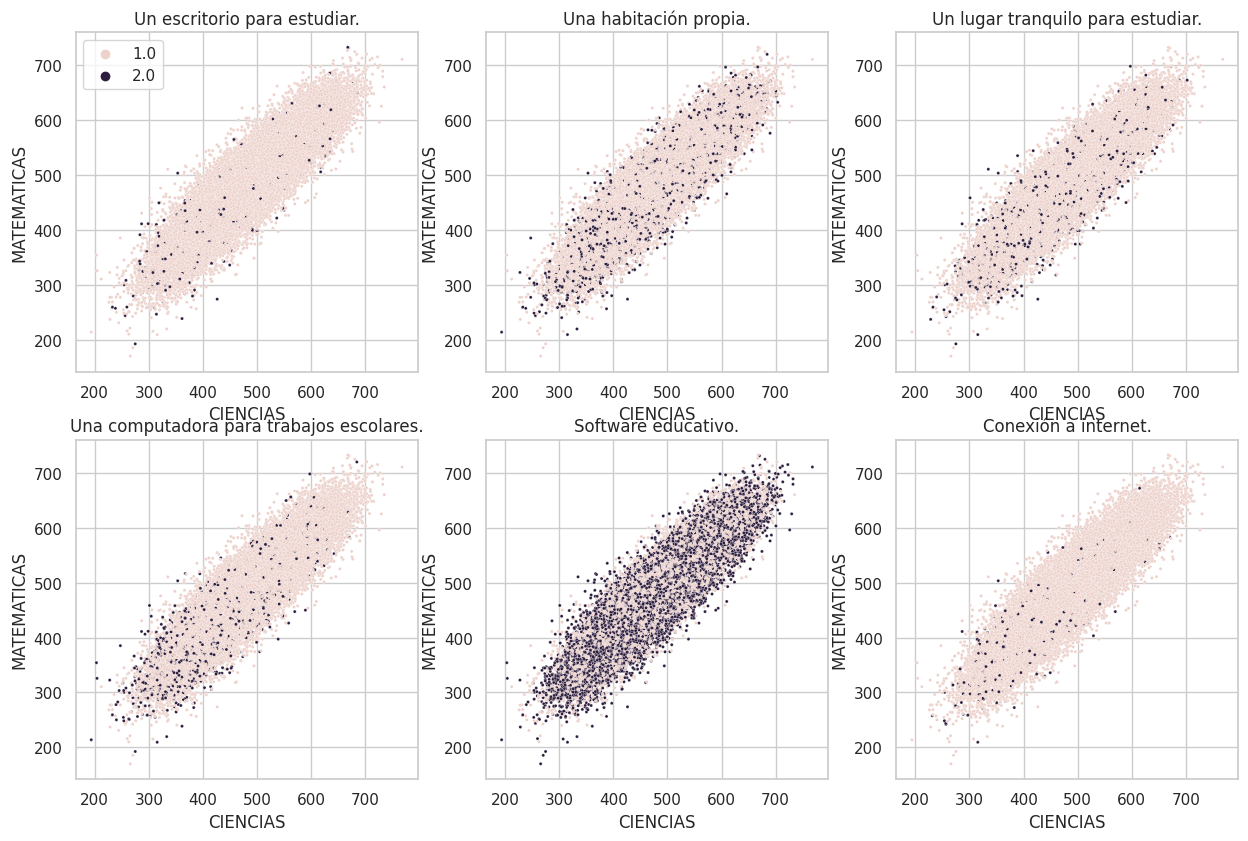

In [ ]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 15))

#1 "Un escritorio para estudiar"
plt.subplot(3, 3, 1)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Un escritorio para estudiar", s=5, color="blue")
plt.title('Un escritorio para estudiar.')
plt.legend().set_visible(True)

#2 "Una habitación propia"
plt.subplot(3, 3, 2)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Una habitación propia", s=5, color="blue")
plt.title('Una habitación propia.')
plt.legend().set_visible(False)

#3 "Un lugar tranquilo para estudiar"
plt.subplot(3, 3, 3)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Un lugar tranquilo para estudiar", s=5, color="blue")
plt.title('Un lugar tranquilo para estudiar.')
plt.legend().set_visible(False)

#4 "Una computadora que puedas usar para trabajos escolares"
plt.subplot(3, 3, 4)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Una computadora que puedas usar para trabajos escolares", s=5, color="blue")
plt.title('Una computadora para trabajos escolares.')
plt.legend().set_visible(False)

#5 "Software educativo"
plt.subplot(3, 3, 5)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Software educativo", s=5, color="blue")
plt.title('Software educativo.')
plt.legend().set_visible(False)

#6 "Un enlace a Internet"
plt.subplot(3, 3, 6)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Un enlace a Internet", s=5, color="blue")
plt.title('Conexión a internet.')
plt.legend().set_visible(False)

plt.show()

En estas gráficas, presentamos la distribución de las respuestas a cada una de las preguntas. El color claro representa "Sí", mientras que los puntos negros representan "No".

En respuesta a la pregunta "¿Tienes un escritorio para estudiar?", la abrumadora mayoría responde afirmativamente. Lo que resulta interesante aquí es la disposición de los puntos negros. Aquellos que responden "No" se encuentran principalmente en el extremo inferior, lo que sugiere que son quienes han obtenido peores resultados. Esto nos lleva a inferir que esta variable podría tener un impacto significativo.

Observamos una distribución similar en las preguntas "¿Tienes conexión a internet?", "¿Tienes un lugar tranquilo para estudiar?" y "¿Tienes acceso a una computadora?".

En cuanto al software educativo, notamos un aumento en la cantidad de respuestas "No", y esta tendencia se presenta de manera bastante uniforme.

<ipython-input-107-b4df7e854bf4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


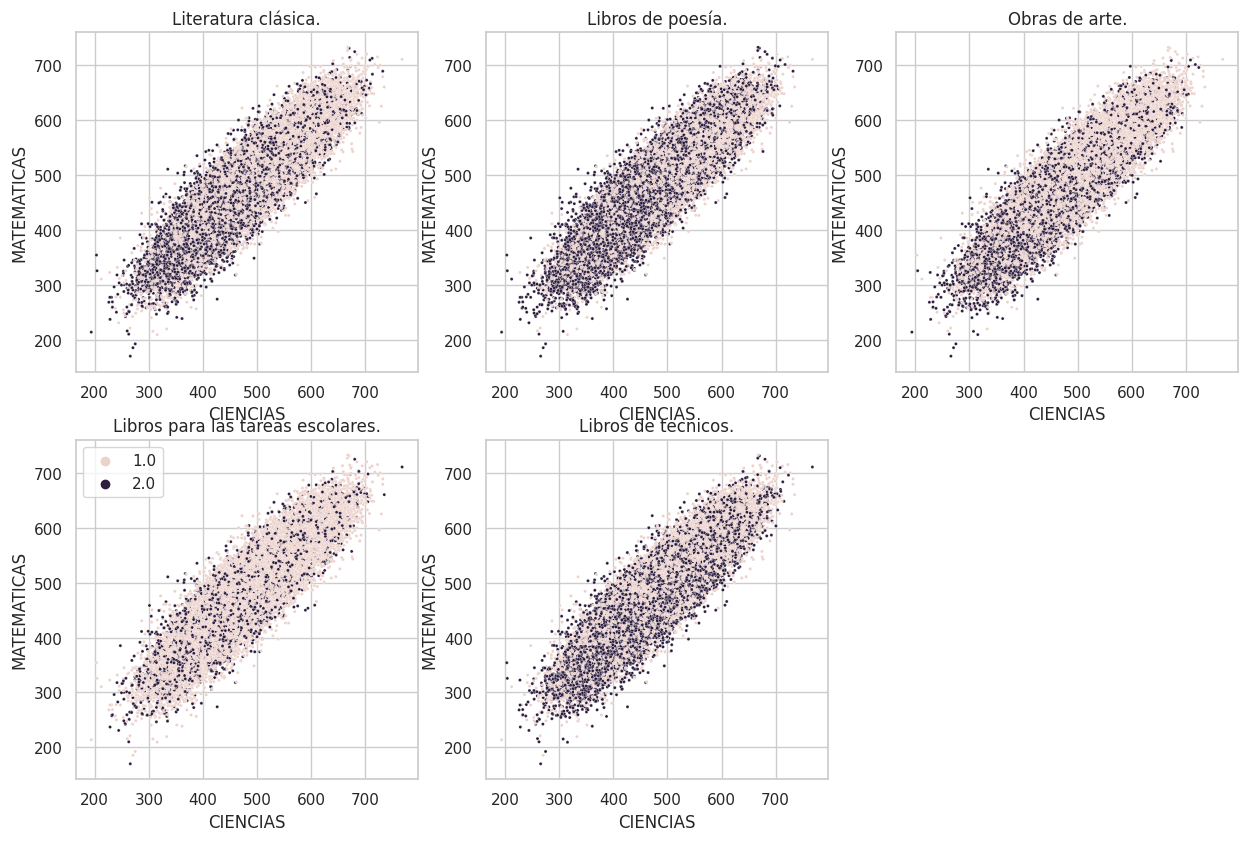

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 15))

#1 "Literatura clásica"
plt.subplot(3, 3, 1)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Literatura clásica", s=5, color="blue")
plt.title('Literatura clásica.')
plt.legend().set_visible(False)

#2 "Libros de poesía"
plt.subplot(3, 3, 2)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Libros de poesía", s=5, color="blue")
plt.title('Libros de poesía.')
plt.legend().set_visible(False)

#3 "Obras de arte"
plt.subplot(3, 3, 3)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Obras de arte", s=5, color="blue")
plt.title('Obras de arte.')
plt.legend().set_visible(False)

#4 "Libros para ayudarte en tus tareas escolares"
plt.subplot(3, 3, 4)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Libros para ayudarte en tus tareas escolares", s=5, color="blue")
plt.title('Libros para las tareas escolares.')
plt.legend().set_visible(True)

#5 "Libros de referencia técnica"
plt.subplot(3, 3, 5)
sns.scatterplot(data=df_casa, x='CIENCIAS', y='MATEMATICAS', hue="Libros de referencia técnica", s=5, color="blue")
plt.title('Libros de tecnicos.')
plt.legend().set_visible(False)

plt.show()

En estas otras preguntas se comportan de forma bastante parecida y homogenea.

<ipython-input-108-a03dd27e9f2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casa.replace({1: "SI", 2: "NO"}, inplace=True)


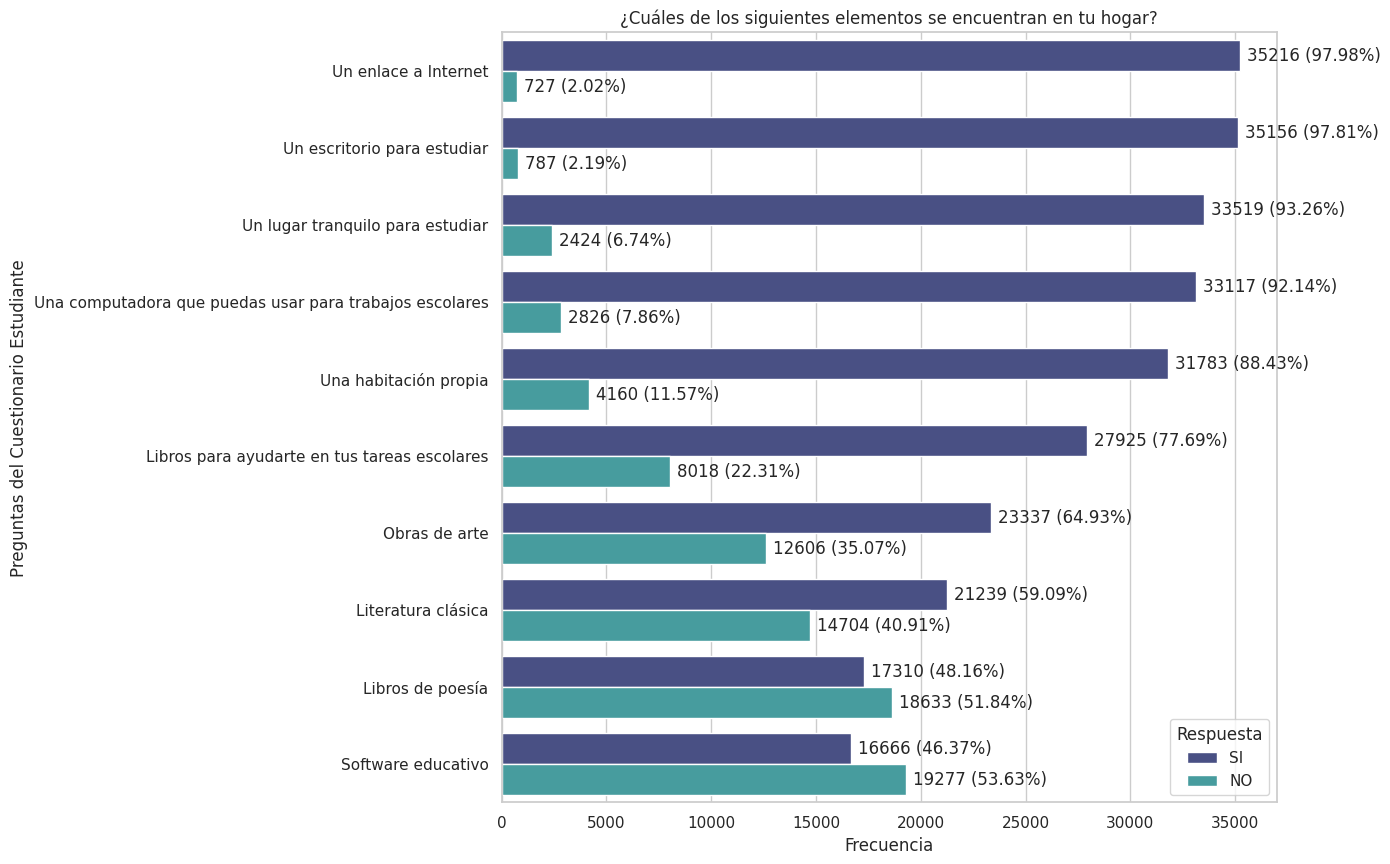

In [ ]:
df_casa = df_casa.iloc[:, :-3]  # Elimina la columna "NOTA ESPAÑA"

# Reemplaza los valores 1 por "SI" y los valores 2 por "NO" en el DataFrame
df_casa.replace({1: "SI", 2: "NO"}, inplace=True)

# Remodela el DataFrame para facilitar la creación del gráfico
df_casa_melted = pd.melt(df_casa, var_name="Pregunta", value_name="Respuesta")

# Ordena las barras ascendentemente por frecuencia
order = df_casa_melted[df_casa_melted["Respuesta"] == "SI"]["Pregunta"].value_counts().index

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))

# Genera el gráfico de barras horizontales con orientación horizontal y barras ordenadas
ax = sns.countplot(data=df_casa_melted, y="Pregunta", hue="Respuesta", palette="mako", orient="h", order=order)
plt.xlabel("Frecuencia")
plt.ylabel("Preguntas del Cuestionario Estudiante")
plt.title("¿Cuáles de los siguientes elementos se encuentran en tu hogar?")
plt.legend(title="Respuesta")

# Agrega etiquetas de conteo y porcentaje a las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{int(width)} ({width / len(df_casa) * 100:.2f}%)",
                xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Desplazamiento del texto
                textcoords='offset points',
                ha="left",
                va="center")

plt.show()


# *OBSERVACIONES*
Se ha representado la distribución en los ejes X e Y de las calificaciones en matemáticas y ciencias. En la leyenda "no" y "sí", como respuesta a la pregunta sobre si los estudiantes tienen ciertos objetos en sus hogares.

Al analizar individualmente, notamos que la mayoría de los estudiantes tienen un escritorio para estudiar, mientras que los pocos que no lo tienen están en la parte inferior del gráfico. En cuanto a tener una habitación propia, la mayoría la tiene, pero los que no la tienen están distribuidos de manera más uniforme. Lo mismo ocurre con la disponibilidad de un lugar tranquilo para estudiar.

La posesión de una computadora es mayoritaria, pero aquellos que responden "no" están ubicados en la parte inferior del gráfico. En lo que respecta al software educativo, la respuesta "no" es mucho más común y está dispersa en todo el gráfico. En cuanto a la conexión a internet, prácticamente todos respondieron que sí la tienen, y los pocos que respondieron "no" se encuentran en la parte inferior del esquema. Además, en la parte superior del gráfico, se observan algunos valores atípicos.

A partir de la información proporcionada sobre la distribución de objetos en los hogares de los estudiantes en relación con sus calificaciones en matemáticas y ciencias, podemos extraer algunas conclusiones tentativas:

# **CONCLUSIONES**

1. Recursos para el estudio: La mayoría de los estudiantes parecen tener acceso a recursos esenciales para el estudio, como un escritorio, una habitación propia, un lugar tranquilo para estudiar, una computadora y conexión a internet. Estos elementos pueden contribuir positivamente al ambiente de estudio y, potencialmente, al desempeño académico.

2. Aunque se observan diferencias en la distribución de objetos entre estudiantes con calificaciones más altas y más bajas se puede intuir que quizá tener o no estos objetos no influya de forma tan clara y directa como en un principio se supondría lo lógico. La presencia de valores atípicos en la parte superior del gráfico podría indicar que algunos estudiantes con recursos limitados pueden obtener calificaciones excepcionales, o que otros factores que aun no han sido considerados en este análisis pueden estar influyendo en sus resultados.


# Se puede establecer una relación directa entre la presencia o ausencia de estos objetos y la capacidad de aprobar o no aprobar pero, tal y como están distribuidos los resultados, no tienen una influencia tan significativa como se podría esperar  y por tanto habría que estudiar más otras variables.


In [ ]:
#creo un nuevo DF
columnas_cosas = ["ST012Q01TA", "ST012Q02TA","ST012Q03TA", "ST012Q05NA", "ST012Q06NA", "ST012Q07NA", "ST012Q08NA", "ST012Q09NA","MATEMATICAS", "CIENCIAS"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_cosas = df[columnas_cosas].copy()

In [ ]:
df_cosas.rename(columns=dic_variables, inplace=True)

In [ ]:
columnas_cosas_nombre = ['Televisores', 'Automóviles', 'Habitaciones con baño o ducha',
       'Teléfonos celulares con acceso a Internet', 'Computadoras', 'Tabletas',
       'Lectores de libros electrónicos', 'Instrumentos musicales']
# Diccionario de mapeo
mapeo_valores = {
    "1.0": "Ninguno",
    "2.0": "Uno",
    "3.0": "Dos",
    "4.0": "3 o más"
}

# Aplica el mapeo de valores
for columna in columnas_cosas_nombre:
    df_cosas[columna] = df_cosas[columna].astype(str).map(mapeo_valores)

<ipython-input-112-8827a4c57a74>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


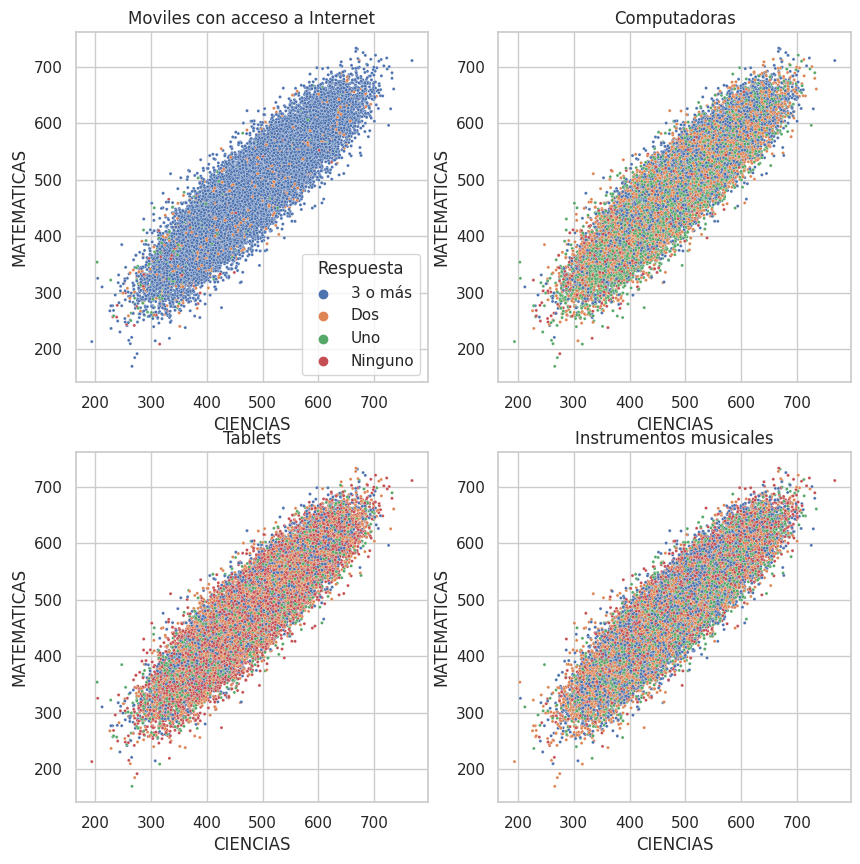

In [ ]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 10))

#1 "Moviles"
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_cosas, x='CIENCIAS', y='MATEMATICAS', hue="Teléfonos celulares con acceso a Internet", s=5)
plt.title('Moviles con acceso a Internet')
plt.legend(title="Respuesta")

#2 "Computadoras"
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_cosas, x='CIENCIAS', y='MATEMATICAS', hue="Computadoras", s=5)
plt.title('Computadoras')
plt.legend().set_visible(False)

#3 "Tabletas"
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_cosas, x='CIENCIAS', y='MATEMATICAS', hue="Tabletas", s=5)
plt.title('Tablets')
plt.legend().set_visible(False)

#4 Instrumentos musicales
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_cosas, x='CIENCIAS', y='MATEMATICAS', hue="Instrumentos musicales", s=5)
plt.title('Instrumentos musicales')
plt.legend().set_visible(False)


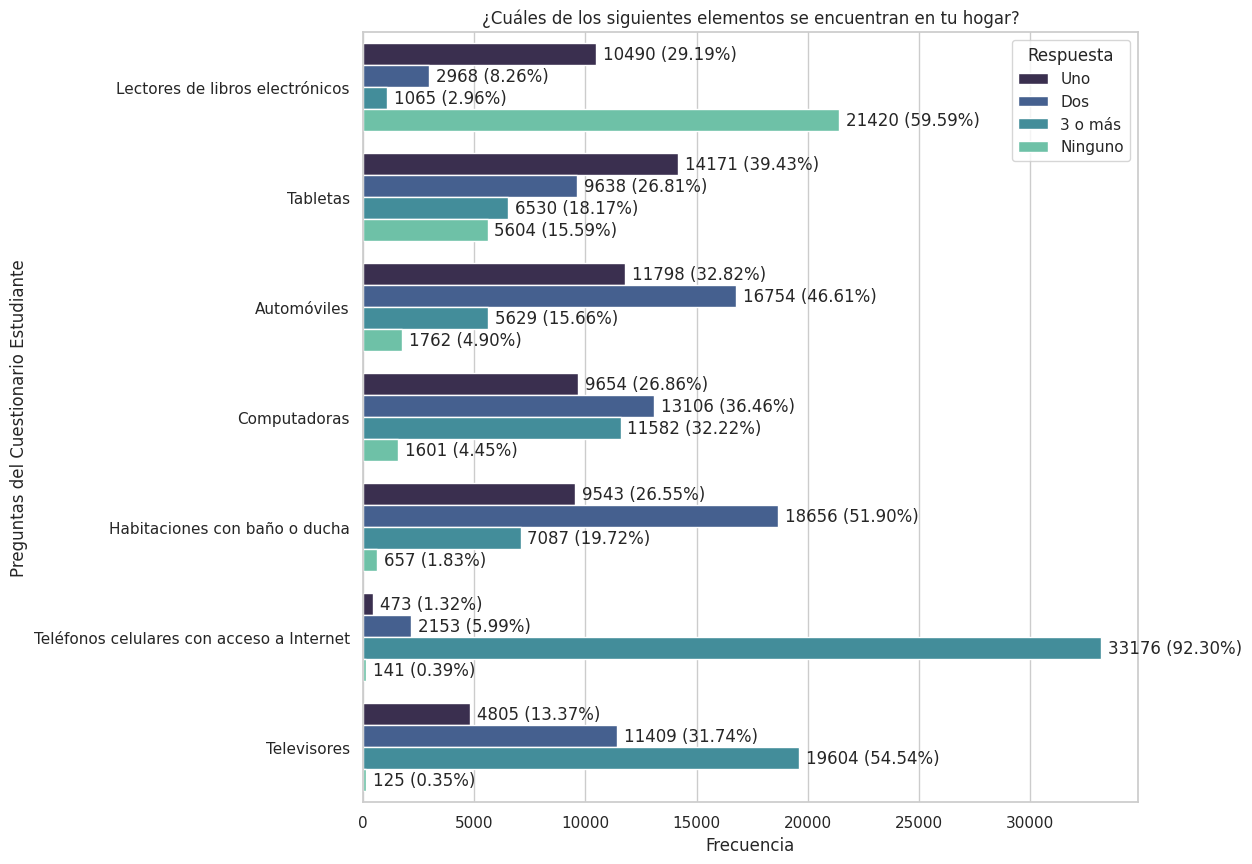

In [ ]:
df_cosas = df_cosas.iloc[:, :-3]

# Reemplaza los valores 1, 2, 3 y 4 según corresponda
df_cosas.replace({1: "Ninguno", 2: "Uno", 3: "Dos", 4: "Tres o mas"}, inplace=True)

# Remodela el DataFrame para facilitar la creación del gráfico
df_cosas_melted = pd.melt(df_cosas, var_name="Pregunta", value_name="Respuesta")

# Ordena las barras ascendentemente por frecuencia
order = df_cosas_melted[df_cosas_melted["Respuesta"] == "Ninguno"]["Pregunta"].value_counts().index

# Convierte la columna "Pregunta" en una categoría ordenada con el orden definido
df_cosas_melted["Pregunta"] = pd.Categorical(df_cosas_melted["Pregunta"], categories=order, ordered=True)

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))

# Genera el gráfico de barras horizontales con orientación horizontal y barras ordenadas
ax = sns.countplot(data=df_cosas_melted, y="Pregunta", hue="Respuesta", palette="mako", orient="h")
plt.xlabel("Frecuencia")
plt.ylabel("Preguntas del Cuestionario Estudiante")
plt.title("¿Cuáles de los siguientes elementos se encuentran en tu hogar?")
plt.legend(title="Respuesta")

# Agrega etiquetas de conteo y porcentaje a las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{int(width)} ({width / len(df_cosas) * 100:.2f}%)",
                xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Desplazamiento del texto
                textcoords='offset points',
                ha="left",
                va="center")

# Muestra el gráfico
plt.show()


En este conjunto de datos, se presenta una estructura similar, aunque en lugar de respuestas binarias de "sí" o "no", se utilizan categorías múltiples: rojo (ninguno), verde (uno), amarillo (dos) y azul (tres o más).

En el caso de los dispositivos móviles, se observa que la mayoría de los hogares tienen tres o más teléfonos móviles por familia, y al menos uno posee una computadora en la mayoría de los hogares. En cuanto a las tablets, en muchos hogares la categoría predominante es "ninguna" (rojo), lo que indica que no son tan comunes en comparación con otros dispositivos. La posesión de instrumentos musicales se encuentra distribuida de manera más uniforme en los hogares.

In [ ]:
#esta columna:  "ST127Q03TA": "REPETICIÓN DE CURSO ISCED3" no aparece
columnas_reprobados = ["ST127Q01TA", "ST127Q02TA", "MATEMATICAS", "CIENCIAS", "NOTA ESPAÑA"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reprobados = df[columnas_reprobados].copy()

In [ ]:
df_reprobados.rename(columns=dic_variables, inplace=True)

In [ ]:
df_reprobados.head()

REPETICIÓN DE CURSO ISCED1  REPETICIÓN DE CURSO ISCED2  MATEMATICAS  \
0                         1.0                         1.0     511.3720   
1                         1.0                         1.0     489.3662   
2                         1.0                         1.0     499.4429   
3                         1.0                         3.0     443.4651   
4                         1.0                         2.0     566.4032   

   CIENCIAS  NOTA ESPAÑA  
0  516.1690       513.77  
1  480.6517       485.01  
2  477.9786       488.71  
3  431.2049       437.34  
4  544.2384       555.32

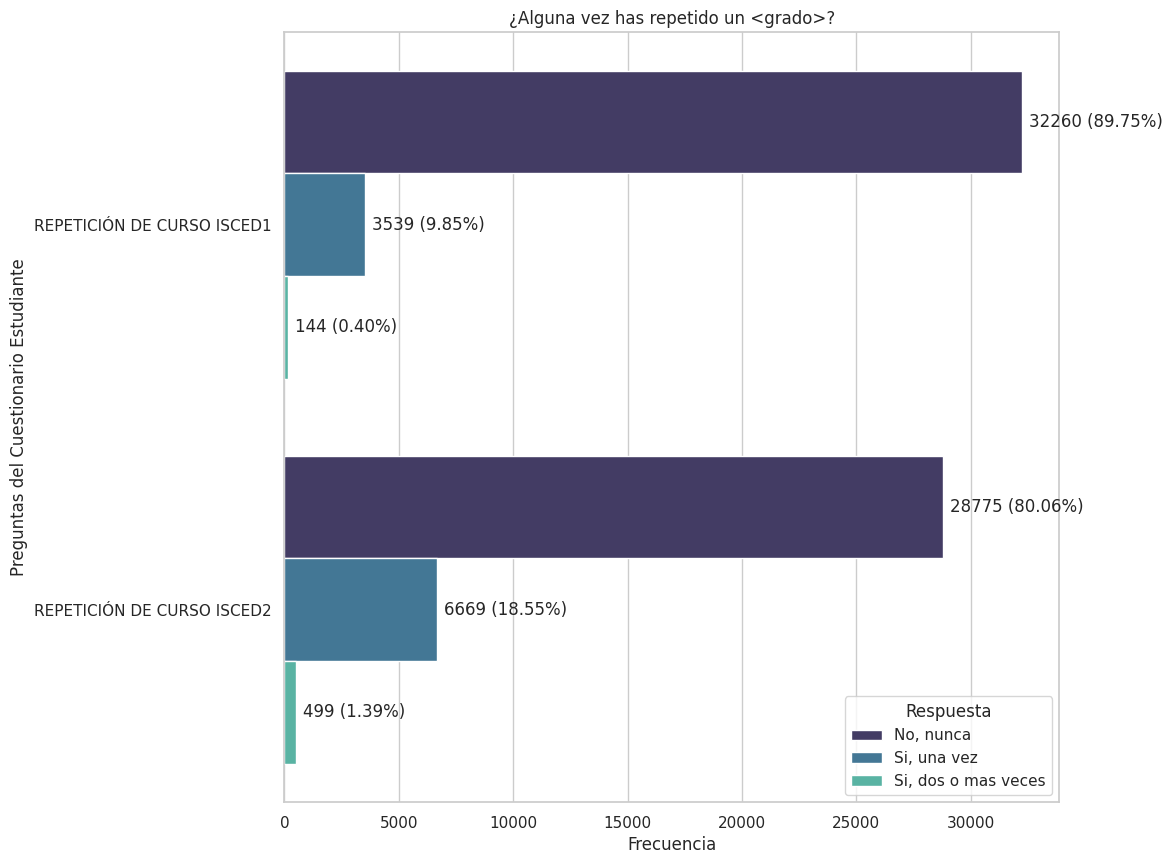

In [ ]:
df_reprobados = df_reprobados.iloc[:, :-3]
df_reprobados.replace({1: "No, nunca", 2: "Si, una vez", 3: "Si, dos o mas veces"}, inplace=True)

df_reprobados_melted = pd.melt(df_reprobados, var_name="Pregunta", value_name="Respuesta")

# Ordena las barras ascendentemente por frecuencia
order = df_reprobados_melted[df_reprobados_melted["Respuesta"] == "No, nunca"]["Pregunta"].value_counts().index

# Convierte la columna "Pregunta" en una categoría ordenada con el orden definido
df_reprobados_melted["Pregunta"] = pd.Categorical(df_reprobados_melted["Pregunta"], categories=order, ordered=True)

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))

# Genera el gráfico de barras horizontales con orientación horizontal y barras ordenadas
ax = sns.countplot(data=df_reprobados_melted, y="Pregunta", hue="Respuesta", palette="mako", orient="h")
plt.xlabel("Frecuencia")
plt.ylabel("Preguntas del Cuestionario Estudiante")
plt.title("¿Alguna vez has repetido un <grado>?")
plt.legend(title="Respuesta")


for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{int(width)} ({width / len(df_reprobados) * 100:.2f}%)",
                xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Desplazamiento del texto
                textcoords='offset points',
                ha="left",
                va="center")
plt.show()

In [ ]:

#esta columna:  "ST127Q03TA": "REPETICIÓN DE CURSO ISCED3" no aparece
columnas_experiencia_internet = ["ST158Q01HA",
                                "ST158Q02HA",
                                "ST158Q03HA",
                                "ST158Q04HA",
                                "ST158Q05HA",
                                "ST158Q06HA",
                                "ST158Q07HA",
                                "MATEMATICAS",
                                "CIENCIAS",
                                "NOTA ESPAÑA"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_experiencia_internet = df[columnas_experiencia_internet].copy()

In [ ]:
df_experiencia_internet.rename(columns=dic_variables, inplace=True)

In [ ]:
df_experiencia_internet.head()

Cómo usar palabras clave al usar un motor de búsqueda como <Google©>, <Yahoo©>, etc.  \
0                                                2.0                                      
1                                                2.0                                      
2                                                2.0                                      
3                                                2.0                                      
4                                                2.0                                      

   Cómo decidir si confiar en la información de Internet  \
0                                                2.0       
1                                                2.0       
2                                                2.0       
3                                                1.0       
4                                                1.0       

   Cómo comparar diferentes páginas web y decidir qué información es más relevante para tus tareas escolares  \
0                                                2.0                                                           
1                                                2.0                                                           
2                                                1.0                                                           
3                                                1.0                                                           
4                                                2.0                                                           

   Entender las consecuencias de hacer información pública en línea en <Facebook©>, <Instagram©>, etc.  \
0                                                1.0                                                     
1                                                1.0                                                     
2                                                2.0                                                     
3                                                1.0                                                     
4                                                1.0                                                     

   Cómo usar la descripción corta debajo de los enlaces en la lista de resultados de una búsqueda  \
0                                                2.0                                                
1                                                2.0                                                
2                                                1.0                                                
3                                                2.0                                                
4                                                2.0                                                

   Cómo detectar si la información es subjetiva o sesgada  \
0                                                1.0        
1                                                2.0        
2                                                1.0        
3                                                2.0        
4                                                2.0        

   Cómo detectar correos electrónicos de phishing o spam  MATEMATICAS  \
0                                                2.0         511.3720   
1                                                2.0         489.3662   
2                                                2.0         499.4429   
3                                                2.0         443.4651   
4                                                2.0         566.4032   

   CIENCIAS  NOTA ESPAÑA  
0  516.1690       513.77  
1  480.6517       485.01  
2  477.9786       488.71  
3  431.2049       437.34  
4  544.2384       555.32

<ipython-input-124-73c2020efa39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experiencia_internet.replace({1: "SI", 2: "NO"}, inplace=True)


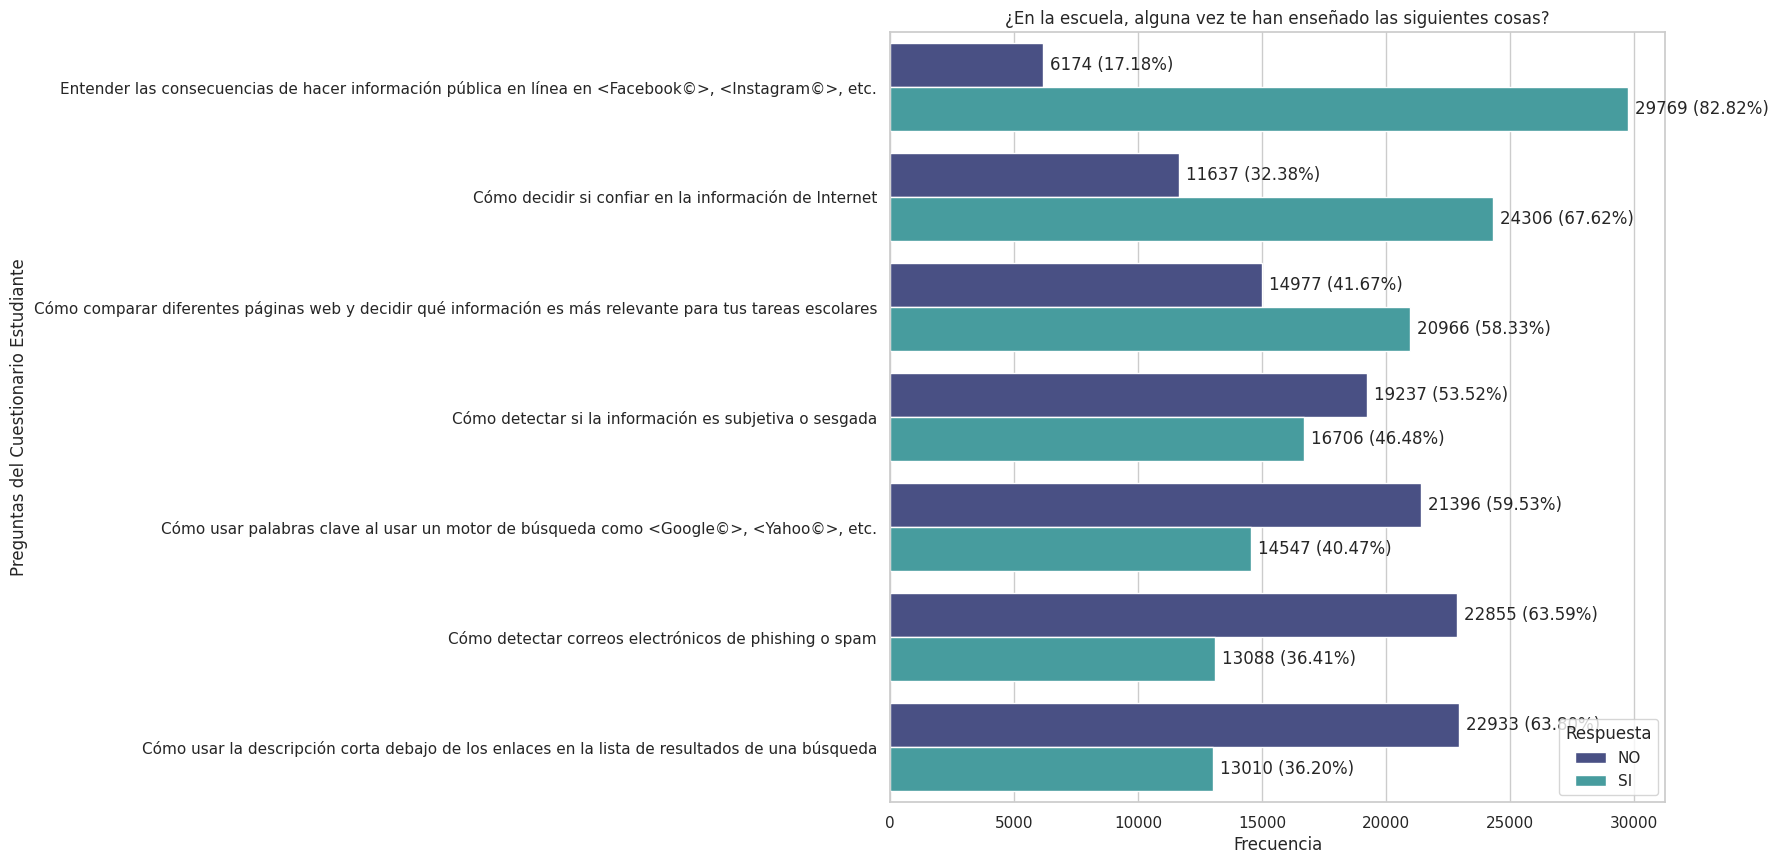

In [ ]:
df_experiencia_internet = df_experiencia_internet.iloc[:, :-3]  # Elimina la columna "NOTA ESPAÑA"

# Reemplaza los valores 1 por "SI" y los valores 2 por "NO" en el DataFrame
df_experiencia_internet.replace({1: "SI", 2: "NO"}, inplace=True)

# Remodela el DataFrame para facilitar la creación del gráfico
df_exp_melted = pd.melt(df_experiencia_internet, var_name="Pregunta", value_name="Respuesta")

# Ordena las barras ascendentemente por frecuencia
order = df_exp_melted[df_exp_melted["Respuesta"] == "SI"]["Pregunta"].value_counts().index

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 10))

# Genera el gráfico de barras horizontales con orientación horizontal y barras ordenadas
ax = sns.countplot(data=df_exp_melted, y="Pregunta", hue="Respuesta", palette="mako", orient="h", order=order)
plt.xlabel("Frecuencia")
plt.ylabel("Preguntas del Cuestionario Estudiante")
plt.title("¿En la escuela, alguna vez te han enseñado las siguientes cosas?")
plt.legend(title="Respuesta")

# Agrega etiquetas de conteo y porcentaje a las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{int(width)} ({width / len(df_experiencia_internet) * 100:.2f}%)",
                xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Desplazamiento del texto
                textcoords='offset points',
                ha="left",
                va="center")

plt.show()

In [ ]:
#creo un nuevo DF
columnas_terminar_grado = ["ST225Q01HA",
                           "ST225Q02HA",
                           "ST225Q03HA",
                           "ST225Q05HA",
                           "ST225Q06HA",
                           "MATEMATICAS",
                           "CIENCIAS",
                           "NOTA ESPAÑA"]

df_terminar_grado = df[columnas_terminar_grado].copy()

In [ ]:
df_terminar_grado.rename(columns=dic_variables, inplace=True)

In [ ]:
df_terminar_grado.head()

Nivel ISCED 2- Educación primaria  \
0                                1.0   
1                                1.0   
2                                1.0   
3                                1.0   
4                                1.0   

   Nivel ISCED 3B o C - Educación secundaria inferior o media.  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                1.0             
4                                                0.0             

   Nivel ISCED 3A - Educación secundaria superior  \
0                                             1.0   
1                                             1.0   
2                                             1.0   
3                                             0.0   
4                                             1.0   

   Nivel ISCED 5B - Educación terciaria (programas cortos)  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios)  \
0                                                1.0                  
1                                                0.0                  
2                                                1.0                  
3                                                0.0                  
4                                                1.0                  

   MATEMATICAS  CIENCIAS  NOTA ESPAÑA  
0     511.3720  516.1690       513.77  
1     489.3662  480.6517       485.01  
2     499.4429  477.9786       488.71  
3     443.4651  431.2049       437.34  
4     566.4032  544.2384       555.32

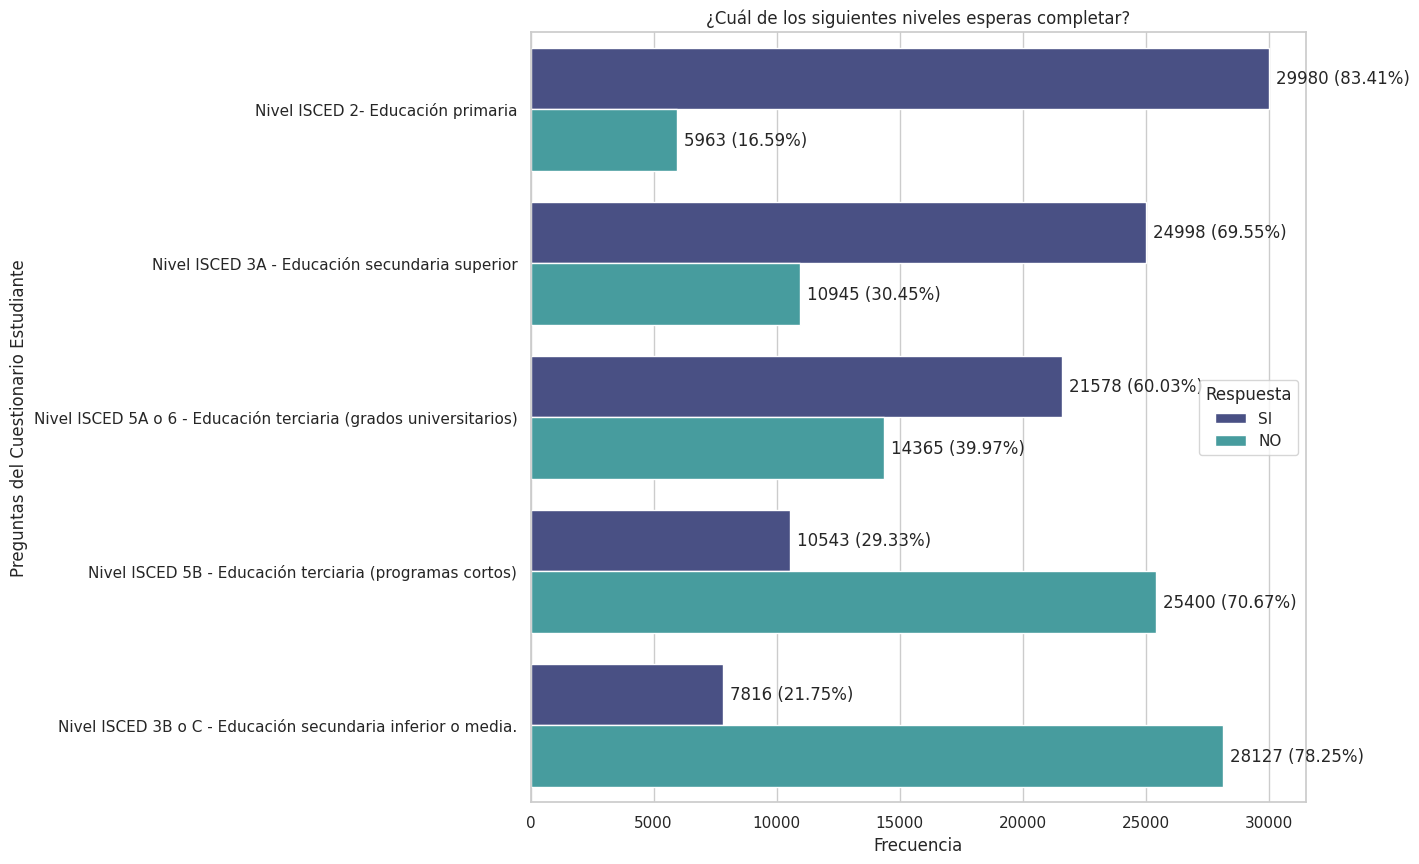

In [ ]:
df_terminar_grado = df_terminar_grado.iloc[:, :-3]

df_terminar_grado.replace({1: "SI", 0: "NO"}, inplace=True)
df_term_melted = pd.melt(df_terminar_grado, var_name="Pregunta", value_name="Respuesta")
order = df_term_melted[df_term_melted["Respuesta"] == "SI"]["Pregunta"].value_counts().index

plt.figure(figsize=(10, 10))

ax = sns.countplot(data=df_term_melted, y="Pregunta", hue="Respuesta", palette="mako", orient="h", order=order)
plt.xlabel("Frecuencia")
plt.ylabel("Preguntas del Cuestionario Estudiante")
plt.title("¿Cuál de los siguientes niveles esperas completar?")
plt.legend(title="Respuesta")

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{int(width)} ({width / len(df_terminar_grado) * 100:.2f}%)",
                xy=(width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # Desplazamiento del texto
                textcoords='offset points',
                ha="left",
                va="center")

plt.show()

In [ ]:
#creo un nuevo DF
columnas_sentir = ["ST186Q05HA",
                   "ST186Q06HA",
                   "ST186Q07HA",
                   "ST186Q10HA",
                   "ST186Q09HA",
                   "ST186Q02HA",
                   "ST186Q01HA",
                   "ST186Q08HA",
                   "ST186Q03HA",
                   "MATEMATICAS",
                   "CIENCIAS",
                   "NOTA ESPAÑA"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_sentir = df[columnas_sentir].copy()

In [ ]:
df_sentir.rename(columns=dic_variables, inplace=True)

In [ ]:
df_sentir.head()

Pensando en ti mismo y en cómo te sientes normalmente: Feliz  \
0                                                3.0              
1                                                3.0              
2                                                3.0              
3                                                3.0              
4                                                3.0              

   Pensando en ti mismo y en cómo te sientes normalmente: Asustado  \
0                                                3.0                 
1                                                2.0                 
2                                                2.0                 
3                                                2.0                 
4                                                2.0                 

   Pensando en ti mismo y en cómo te sientes normalmente: Vivo  \
0                                                2.0             
1                                                3.0             
2                                                3.0             
3                                                3.0             
4                                                4.0             

   Pensando en ti mismo y en cómo te sientes normalmente: Miserable  \
0                                                4.0                  
1                                                3.0                  
2                                                2.0                  
3                                                2.0                  
4                                                2.0                  

   Pensando en ti mismo y en cómo te sientes normalmente: Orgulloso  \
0                                                3.0                  
1                                                2.0                  
2                                                1.0                  
3                                                3.0                  
4                                                2.0                  

   Pensando en ti mismo y en cómo te sientes normalmente: Agobiado  \
0                                                4.0                 
1                                                3.0                 
2                                                3.0                 
3                                                3.0                 
4                                                1.0                 

   Pensando en ti mismo y en cómo te sientes normalmente: Jubiloso  \
0                                                3.0                 
1                                                3.0                 
2                                                3.0                 
3                                                3.0                 
4                                                4.0                 

   Pensando en ti mismo y en cómo te sientes normalmente: Triste  \
0                                                3.0               
1                                                3.0               
2                                                3.0               
3                                                2.0               
4                                                3.0               

   Pensando en ti mismo y en cómo te sientes normalmente: Alegre  MATEMATICAS  \
0                                                3.0                 511.3720   
1                                                3.0                 489.3662   
2                                                3.0                 499.4429   
3                                                3.0                 443.4651   
4                                                3.0                 566.4032   

   CIENCIAS  NOTA ESPAÑA  
0  516.1690       513.77  
1  480.6517       485.01  
2  477.9786       488.71  
3  431.2049       437.34  
4  544.2384       555.32

In [ ]:
sentimientos = {"ST186Q05HA": "Feliz",
      "ST186Q06HA": "Asustado",
      "ST186Q07HA": "Vivo",
      "ST186Q10HA": "Miserable",
      "ST186Q09HA": "Orgulloso",
      "ST186Q02HA": "Ansioso",
      "ST186Q01HA": "Jubiloso",
      "ST186Q08HA": "Triste",
      "ST186Q03HA": "Alegre",
      "TARGET ESP": "TARGET ESP"
}

In [ ]:
df_sentimientos = df[list(sentimientos.keys())]

In [ ]:
df_sentimientos = df_sentimientos.copy()
df_sentimientos.rename(columns=sentimientos, inplace=True)

In [ ]:
df_sentimientos_up = df_sentimientos[df_sentimientos["TARGET ESP"] == 1.0]
df_sentimientos_down = df_sentimientos[df_sentimientos["TARGET ESP"] == 0.0]

categories = [col for col in df_sentimientos.columns if col != 'TARGET ESP']
N = len(categories)

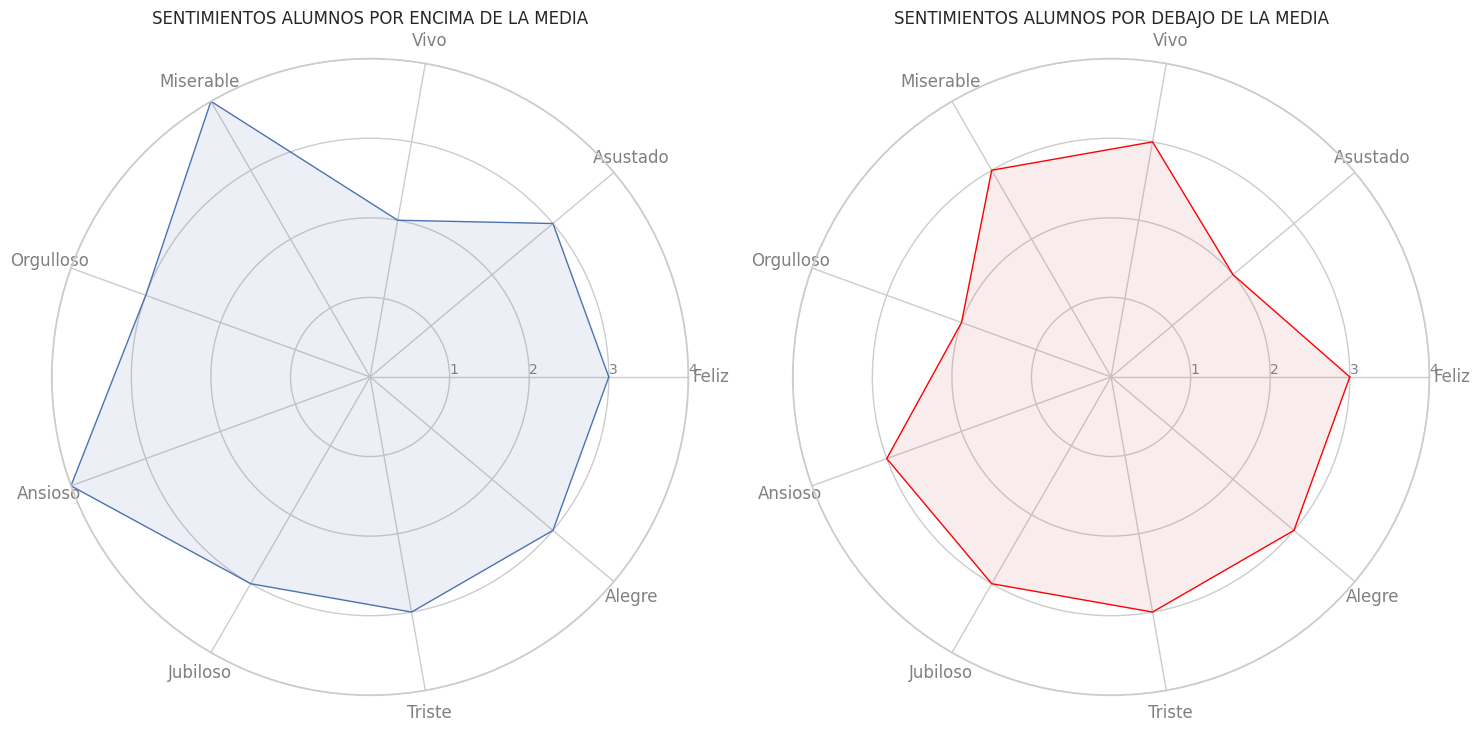

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'polar': True})

# Datos para el gráfico de araña de df_sentimientos_up
df_sentimientos_up = df_sentimientos[df_sentimientos["TARGET ESP"] == 1.0]
values_up = df_sentimientos_up.iloc[0].drop('TARGET ESP').values.flatten().tolist()
values_up += values_up[:1]

# Datos para el gráfico de araña de df_sentimientos_down
df_sentimientos_down = df_sentimientos[df_sentimientos["TARGET ESP"] == 0.0]
values_down = df_sentimientos_down.iloc[0].drop('TARGET ESP').values.flatten().tolist()
values_down += values_down[:1]

# Calcular los ángulos para el gráfico de araña
angles = [n / float(N) * 2 * 3.14159265359 for n in range(N)]
angles += angles[:1]

# color del fondo
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Agregar las primeras categorías como "ejes"
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, color='grey', size=12)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, color='grey', size=12)

ax1.set_rlabel_position(0)
ax1.set_yticks([1, 2, 3, 4])
ax1.set_yticklabels(["1", "2", "3", "4"], color="grey", size=10)
ax1.set_ylim(0, 4)

ax2.set_rlabel_position(0)
ax2.set_yticks([1, 2, 3, 4])
ax2.set_yticklabels(["1", "2", "3", "4"], color="grey", size=10)
ax2.set_ylim(0, 4)

# Agregar los datos primer subplot
ax1.plot(angles, values_up, linewidth=1, linestyle='solid', label="Sentimientos")
ax1.fill(angles, values_up, 'b', alpha=0.1)
ax1.set_title("SENTIMIENTOS ALUMNOS POR ENCIMA DE LA MEDIA")

# Agregar los datos segundo subplot
ax2.plot(angles, values_down, linewidth=1, linestyle='solid', color='red', label="Sentimientos")
ax2.fill(angles, values_down, 'r', alpha=0.1)
ax2.set_title("SENTIMIENTOS ALUMNOS POR DEBAJO DE LA MEDIA")

plt.tight_layout()
plt.show()


Estas gráficas de araña representan a los estudiantes y sus sentimientos. Los estudiantes en azul se sitúan por encima de la media de la OCDE, que es nuestro objetivo de referencia (TARGET ESP), mientras que los estudiantes en rojo están por debajo.

Se han identificado nueve sentimientos en total: POSITIVOS, que incluyen "Vivo", "Feliz", "Alegre", "Jubiloso" y "Orgulloso"; y NEGATIVOS, que comprenden "Asustado", "Ansioso" y "Miserable".

Lamentablemente, en el grupo de estudiantes con mejores resultados (los "top"), los sentimientos predominantes son "ansioso" y "miserable", siendo especialmente preocupante este último. En contraste, en el grupo de estudiantes suspendidos, estos sentimientos se encuentran un punto por debajo. Ambos grupos experimentan niveles similares de felicidad, alegría y tristeza.

Cabe destacar que el grupo de estudiantes que obtuvo las calificaciones más bajas muestra un nivel muy bajo de orgullo.

Conclusiones:

# Los estudiantes con mejores calificaciones tienden a experimentar sentimientos más negativos, especialmente ansiedad y miserabilidad. Esto podría indicar una presión excesiva o altas expectativas académicas.

A pesar de sus diferencias en el desempeño académico, tanto los grupos de estudiantes "top" como los suspendidos reportan niveles similares de felicidad, alegría y tristeza.

# La falta de orgullo entre los estudiantes con peores resultados sugiere posiblemente una baja autoestima o insatisfacción con su desempeño académico.

# ÁRBOL DE DECISIÓN

In [ ]:
# cargamos el CSV de nuevo.
df = pd.read_csv('/content/drive/MyDrive/df_pisa_sin_nulos.csv')

De aquí hasta que se realiza el árbol procesamos los datos.

In [ ]:
# si el valor es 1.0 lo cambiamos a 0 y si es 2.0 lo cambiamos a 1

def cambiar_valores(x):
    if x == 1.0:
        return 1
    elif x == 2.0:
        return 0
    else:
        return x

In [ ]:
columns_to_process = [
    'ST011Q01TA', 'ST011Q02TA', 'ST011Q03TA', 'ST011Q04TA', 'ST011Q05TA',
    'ST011Q06TA', 'ST011Q07TA', 'ST011Q08TA', 'ST011Q09TA', 'ST011Q10TA',
    'ST011Q11TA', 'ST012Q01TA', 'ST012Q02TA', 'ST012Q03TA', 'ST012Q05NA',
    'ST012Q06NA', 'ST012Q07NA', 'ST012Q08NA', 'ST012Q09NA', 'ST127Q01TA',
    'ST127Q02TA', 'ST158Q01HA', 'ST158Q02HA', 'ST158Q03HA', 'ST158Q04HA',
    'ST158Q05HA', 'ST158Q06HA', 'ST158Q07HA', 'ST225Q01HA', 'ST225Q02HA',
    'ST225Q03HA', 'ST225Q05HA', 'ST225Q06HA', 'ST186Q05HA', 'ST186Q06HA',
    'ST186Q07HA', 'ST186Q10HA', 'ST186Q09HA', 'ST186Q02HA', 'ST186Q01HA',
    'ST186Q08HA', 'ST186Q03HA', 'IC001Q01TA', 'IC001Q02TA', 'IC001Q03TA',
    'IC001Q04TA', 'IC001Q05TA', 'IC001Q08TA', 'IC001Q09TA', 'IC001Q10TA',
    'IC001Q11TA', 'IC150Q01HA', 'IC150Q02HA', 'IC150Q03HA', 'IC150Q04HA',
    'IC150Q05HA', 'IC150Q06HA', 'IC150Q07HA', 'IC150Q08HA', 'IC150Q09HA',
    'IC008Q01TA', 'IC008Q02TA', 'IC008Q03TA', 'IC008Q04TA', 'IC008Q05TA',
    'IC008Q07NA', 'IC008Q08TA', 'IC008Q09TA', 'IC008Q10TA', 'IC008Q11TA',
    'IC008Q12TA', 'IC008Q13NA', 'IC010Q01TA', 'IC010Q02NA', 'IC010Q03TA',
    'IC010Q04TA', 'IC010Q05NA', 'IC010Q06NA', 'IC010Q07TA', 'IC010Q08TA',
    'IC010Q09NA', 'IC010Q10NA', 'IC010Q11HA', 'IC010Q12HA'
]

for column in columns_to_process:
    df[column] = df[column].apply(cambiar_valores)

In [ ]:
def cambiar_nombres_columnas(df, dic_variables):
    df.rename(columns=dic_variables, inplace=True)
    return df

In [ ]:
cambiar_nombres_columnas(df, dic_variables)

REGION  GRADO  GÉNERO  Un escritorio para estudiar  \
0               Extremadura   10.0     1.0                            1   
1           Castilla y Leon   10.0     1.0                            1   
2      Comunidad Valenciana   10.0     1.0                            1   
3                    Madrid    8.0     2.0                            1   
4                 Cantabria    9.0     2.0                            1   
...                     ...    ...     ...                          ...   
35938            Pais Vasco    8.0     2.0                            1   
35939  Castilla - La Mancha    9.0     1.0                            1   
35940       Castilla y Leon   10.0     2.0                            1   
35941  Castilla - La Mancha   10.0     1.0                            1   
35942              Cataluna   10.0     2.0                            1   

       Una habitación propia  Un lugar tranquilo para estudiar  \
0                          1                                 1   
1                          1                                 1   
2                          1                                 1   
3                          1                                 1   
4                          1                                 1   
...                      ...                               ...   
35938                      1                                 1   
35939                      1                                 1   
35940                      1                                 1   
35941                      1                                 1   
35942                      1                                 1   

       Una computadora que puedas usar para trabajos escolares  \
0                                                      1         
1                                                      1         
2                                                      1         
3                                                      1         
4                                                      1         
...                                                  ...         
35938                                                  1         
35939                                                  1         
35940                                                  1         
35941                                                  1         
35942                                                  1         

       Software educativo  Un enlace a Internet  Literatura clásica  ...  \
0                       0                     1                   1  ...   
1                       0                     1                   1  ...   
2                       1                     1                   0  ...   
3                       0                     1                   0  ...   
4                       1                     1                   0  ...   
...                   ...                   ...                 ...  ...   
35938                   0                     1                   0  ...   
35939                   1                     1                   0  ...   
35940                   0                     1                   0  ...   
35941                   0                     1                   1  ...   
35942                   0                     1                   1  ...   

       Ciencias5  Ciencias6  Ciencias7  Ciencias8  Ciencias9  Ciencias10  \
0        538.890    507.852    498.690    500.419    505.205     517.600   
1        457.543    474.852    498.781    533.945    474.990     449.576   
2        484.657    504.322    487.253    444.084    472.455     535.229   
3        378.708    464.994    406.707    401.688    452.741     440.537   
4        563.508    609.195    595.726    513.956    509.958     522.603   
...          ...        ...        ...        ...        ...         ...   
35938    373.805    403.343    378.848    399.287    436.122     380.644   
35939    388.

In [ ]:
# La columna TARGET la cambiamos a INT
df['TARGET'] = df['TARGET'].astype(int)

In [ ]:
#valores unicos de la columna region
df['REGION'].unique()

array(['Extremadura', 'Castilla y Leon', 'Comunidad Valenciana', 'Madrid',
       'Cantabria', 'Islas Baleares', 'Asturias', 'Pais Vasco',
       'Cataluna', 'Galicia', 'Castilla - La Mancha', 'Murcia',
       'Andalucia', 'Desconocido', 'La Rioja', 'Islas Canarias',
       'Navarra', 'Aragon', 'Ceuta y Melilla'], dtype=object)

In [ ]:
# Codificamos columna REGION
df = pd.get_dummies(df, columns=['REGION'])

In [ ]:
# columna CALIFICACION

calificaciones = df['CALIFICACION']

In [ ]:
# Eliminar las columnas que no nos sirven

df = df.drop(['Matematicas1',
              'Matematicas2',
              'Matematicas3',
              'Matematicas4',
              'Matematicas5',
              'Matematicas6',
              'Matematicas7',
              'Matematicas8',
              'Matematicas9',
              'Matematicas10',
              'Ciencias1',
              'Ciencias2',
              'Ciencias3',
              'Ciencias4',
              'Ciencias5',
              'Ciencias6',
              'Ciencias7',
              'Ciencias8',
              'Ciencias9',
              'Ciencias10',
              'NOTA CIENCIAS',
              'NOTA MATEMATICAS',
              'CALIFICACION' ], axis=1)

In [ ]:
#  funcion que nos permite hacer un arbol de decision

def arbol_decision(df, TARGET):
    X = df.drop([TARGET], axis=1)
    y = df[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # hiperparámetros
    param_grid = {
        'max_depth': [None, 5,5,5],
        'min_samples_leaf': [5,5,5],
        'min_samples_split': [5,5,5],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }

    # Crear el modelo de árbol de decisión
    clf = DecisionTreeClassifier()

    # GridSearchCV para encontrar la mejor combinación de hiperparámetros
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo y predecir en el conjunto de prueba
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    # Calcular y mostrar la precisión y la matriz de confusión
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Matriz de Confusión:")
    print(confusion)

    return best_clf, accuracy

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning) #Para que no salgan los avisos.

In [ ]:
arbol_decision(df, 'TARGET')

Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.7600500765057727
Matriz de Confusión:
[[2343  951]
 [ 774 3121]]


(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5),
 0.7600500765057727)

In [ ]:
best_model, accuracy = arbol_decision(df, 'TARGET')

Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.7432188065099458
Matriz de Confusión:
[[2375  976]
 [ 870 2968]]


Hemos probado diferentes combinaciones de estas configuraciones y encontramos la mejor combinación, que es la siguiente:

Profundidad máxima del árbol (max_depth): 5 niveles.

Mínimo de muestras por hoja (min_samples_leaf): 5 muestras.

Mínimo de muestras para dividir un nodo (min_samples_split): 5 muestras.

Tipo de características máximas para considerar al dividir (max_features): No especificado, lo que significa que el modelo decide automáticamente.
Cuando probamos este modelo en nuestros datos, obtuvimos una precisión del 74.32%. Esto significa que el modelo acertó el 74.32% de las veces al hacer predicciones.

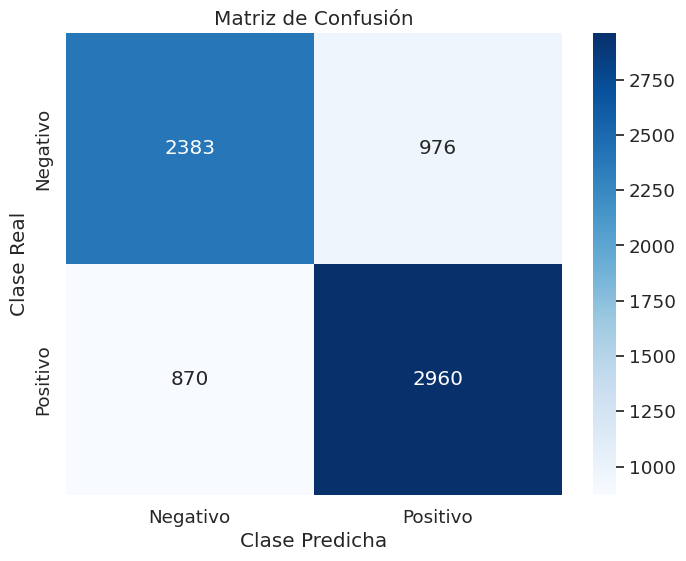

In [ ]:
# Matriz de confusión.
confusion = [[2383, 976],
             [870, 2960]]

class_names = ['Negativo', 'Positivo']


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Crear el mapa de calor
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')

plt.show()


La matriz de confusión nos muestra cómo funcionó el modelo en detalle. Aquí está lo que significa:

Verdaderos positivos (TP): 2960 casos en los que el modelo predijo correctamente algo positivo.

Verdaderos negativos (TN): 2383 casos en los que el modelo predijo correctamente algo negativo.

Falsos positivos (FP): 976 casos en los que el modelo predijo incorrectamente algo positivo cuando en realidad era negativo.

Falsos negativos (FN): 870 casos en los que el modelo predijo incorrectamente algo negativo cuando en realidad era positivo.

# **En resumen, nuestro modelo de árbol de decisión, con estas configuraciones, es bastante bueno en la predicción, con una precisión del 74.32%.**

Aunque cometió algunos errores (falsos positivos y falsos negativos), en general, hizo un buen trabajo al clasificar los datos.

In [ ]:
warnings.resetwarnings() #Retiro los avisos.

In [ ]:
def plot_tree(model, feature_names, class_names, plot_title):
    # Crear un buffer de memoria
    dot_data = io.StringIO()
    export_graphviz(model, out_file=dot_data, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)

    # Crear el gráfico a partir del buffer
    graph = graphviz.Source(dot_data.getvalue())

    # Guardar el gráfico en formato PDF
    graph.render(plot_title, view=True)

    return graph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.10/subprocess.py:1072: ResourceWarning: subprocess 2674 is still running
  _warn("subprocess %s is still running" % self.pid,


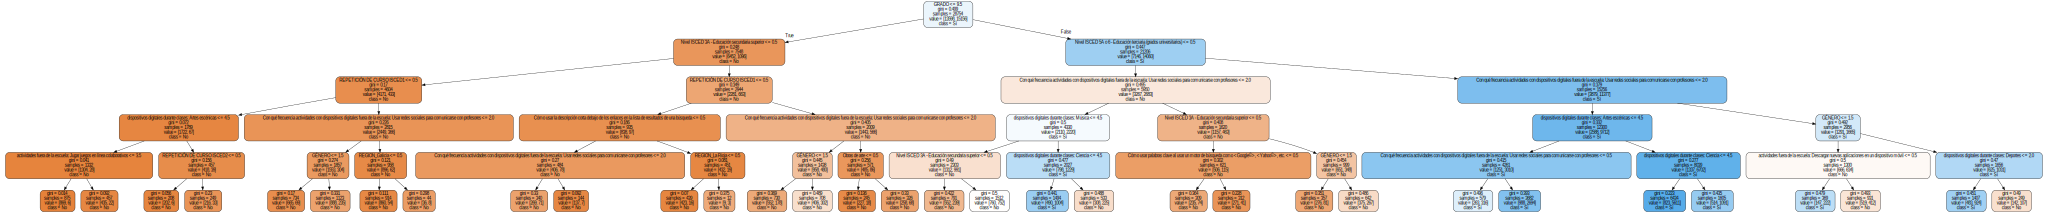

In [ ]:
plot_tree(best_model, df.drop(['TARGET'], axis=1).columns, ['No', 'Sí'], 'Árbol de Decisión')

In [ ]:
#extraer las 20 variables mas importantes y sus valores

df_importancia = pd.DataFrame({'feature': df.drop(['TARGET'], axis=1).columns, 'importance': best_model.feature_importances_})
df_importancia = df_importancia.sort_values('importance', ascending=False).reset_index(drop=True)
df_importancia.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


feature  importance
0                                               GRADO    0.622655
1   Nivel ISCED 5A o 6 - Educación terciaria (grad...    0.155204
2   Con qué frecuencia actividades con dispositivo...    0.092849
3      dispositivos digitales durante clases: Ciencia    0.030056
4      Nivel ISCED 3A - Educación secundaria superior    0.025394
5   dispositivos digitales durante clases: Artes e...    0.019407
6                                              GÉNERO    0.016412
7       dispositivos digitales durante clases: Música    0.013932
8                          REPETICIÓN DE CURSO ISCED1    0.012342
9     dispositivos digitales durante clases: Deportes    0.004548
10  actividades fuera de la escuela: Descargar nue...    0.002790
11  Cómo usar la descripción corta debajo de los e...    0.001380
12                                      Obras de arte    0.001065
13  Cómo usar palabras clave al usar un motor de b...    0.000756
14                         REPETICIÓN DE CURSO ISCED2    0.000508
15                                     REGION_Galicia    0.000264
16                                    REGION_La Rioja    0.000222
17  actividades fuera de la escuela: Jugar juegos ...    0.000213
18  actividades fuera de la escuela: Leer noticias...    0.000000
19  Con qué frecuencia actividades con dispositivo...    0.000000

In [ ]:
# convertimos la columna importancia a porcentaje

df_importancia['importance'] = df_importancia['importance'] * 100
df_importancia.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


feature  importance
0                                               GRADO   62.265535
1   Nivel ISCED 5A o 6 - Educación terciaria (grad...   15.520393
2   Con qué frecuencia actividades con dispositivo...    9.284940
3      dispositivos digitales durante clases: Ciencia    3.005622
4      Nivel ISCED 3A - Educación secundaria superior    2.539401
5   dispositivos digitales durante clases: Artes e...    1.940745
6                                              GÉNERO    1.641221
7       dispositivos digitales durante clases: Música    1.393226
8                          REPETICIÓN DE CURSO ISCED1    1.234218
9     dispositivos digitales durante clases: Deportes    0.454758
10  actividades fuera de la escuela: Descargar nue...    0.279016
11  Cómo usar la descripción corta debajo de los e...    0.137980
12                                      Obras de arte    0.106534
13  Cómo usar palabras clave al usar un motor de b...    0.075640
14                         REPETICIÓN DE CURSO ISCED2    0.050825
15                                     REGION_Galicia    0.026381
16                                    REGION_La Rioja    0.022222
17  actividades fuera de la escuela: Jugar juegos ...    0.021343
18  actividades fuera de la escuela: Leer noticias...    0.000000
19  Con qué frecuencia actividades con dispositivo...    0.000000

In [ ]:
# 20 variables mas importantes y la columna TARGET

df2 = df_importancia.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


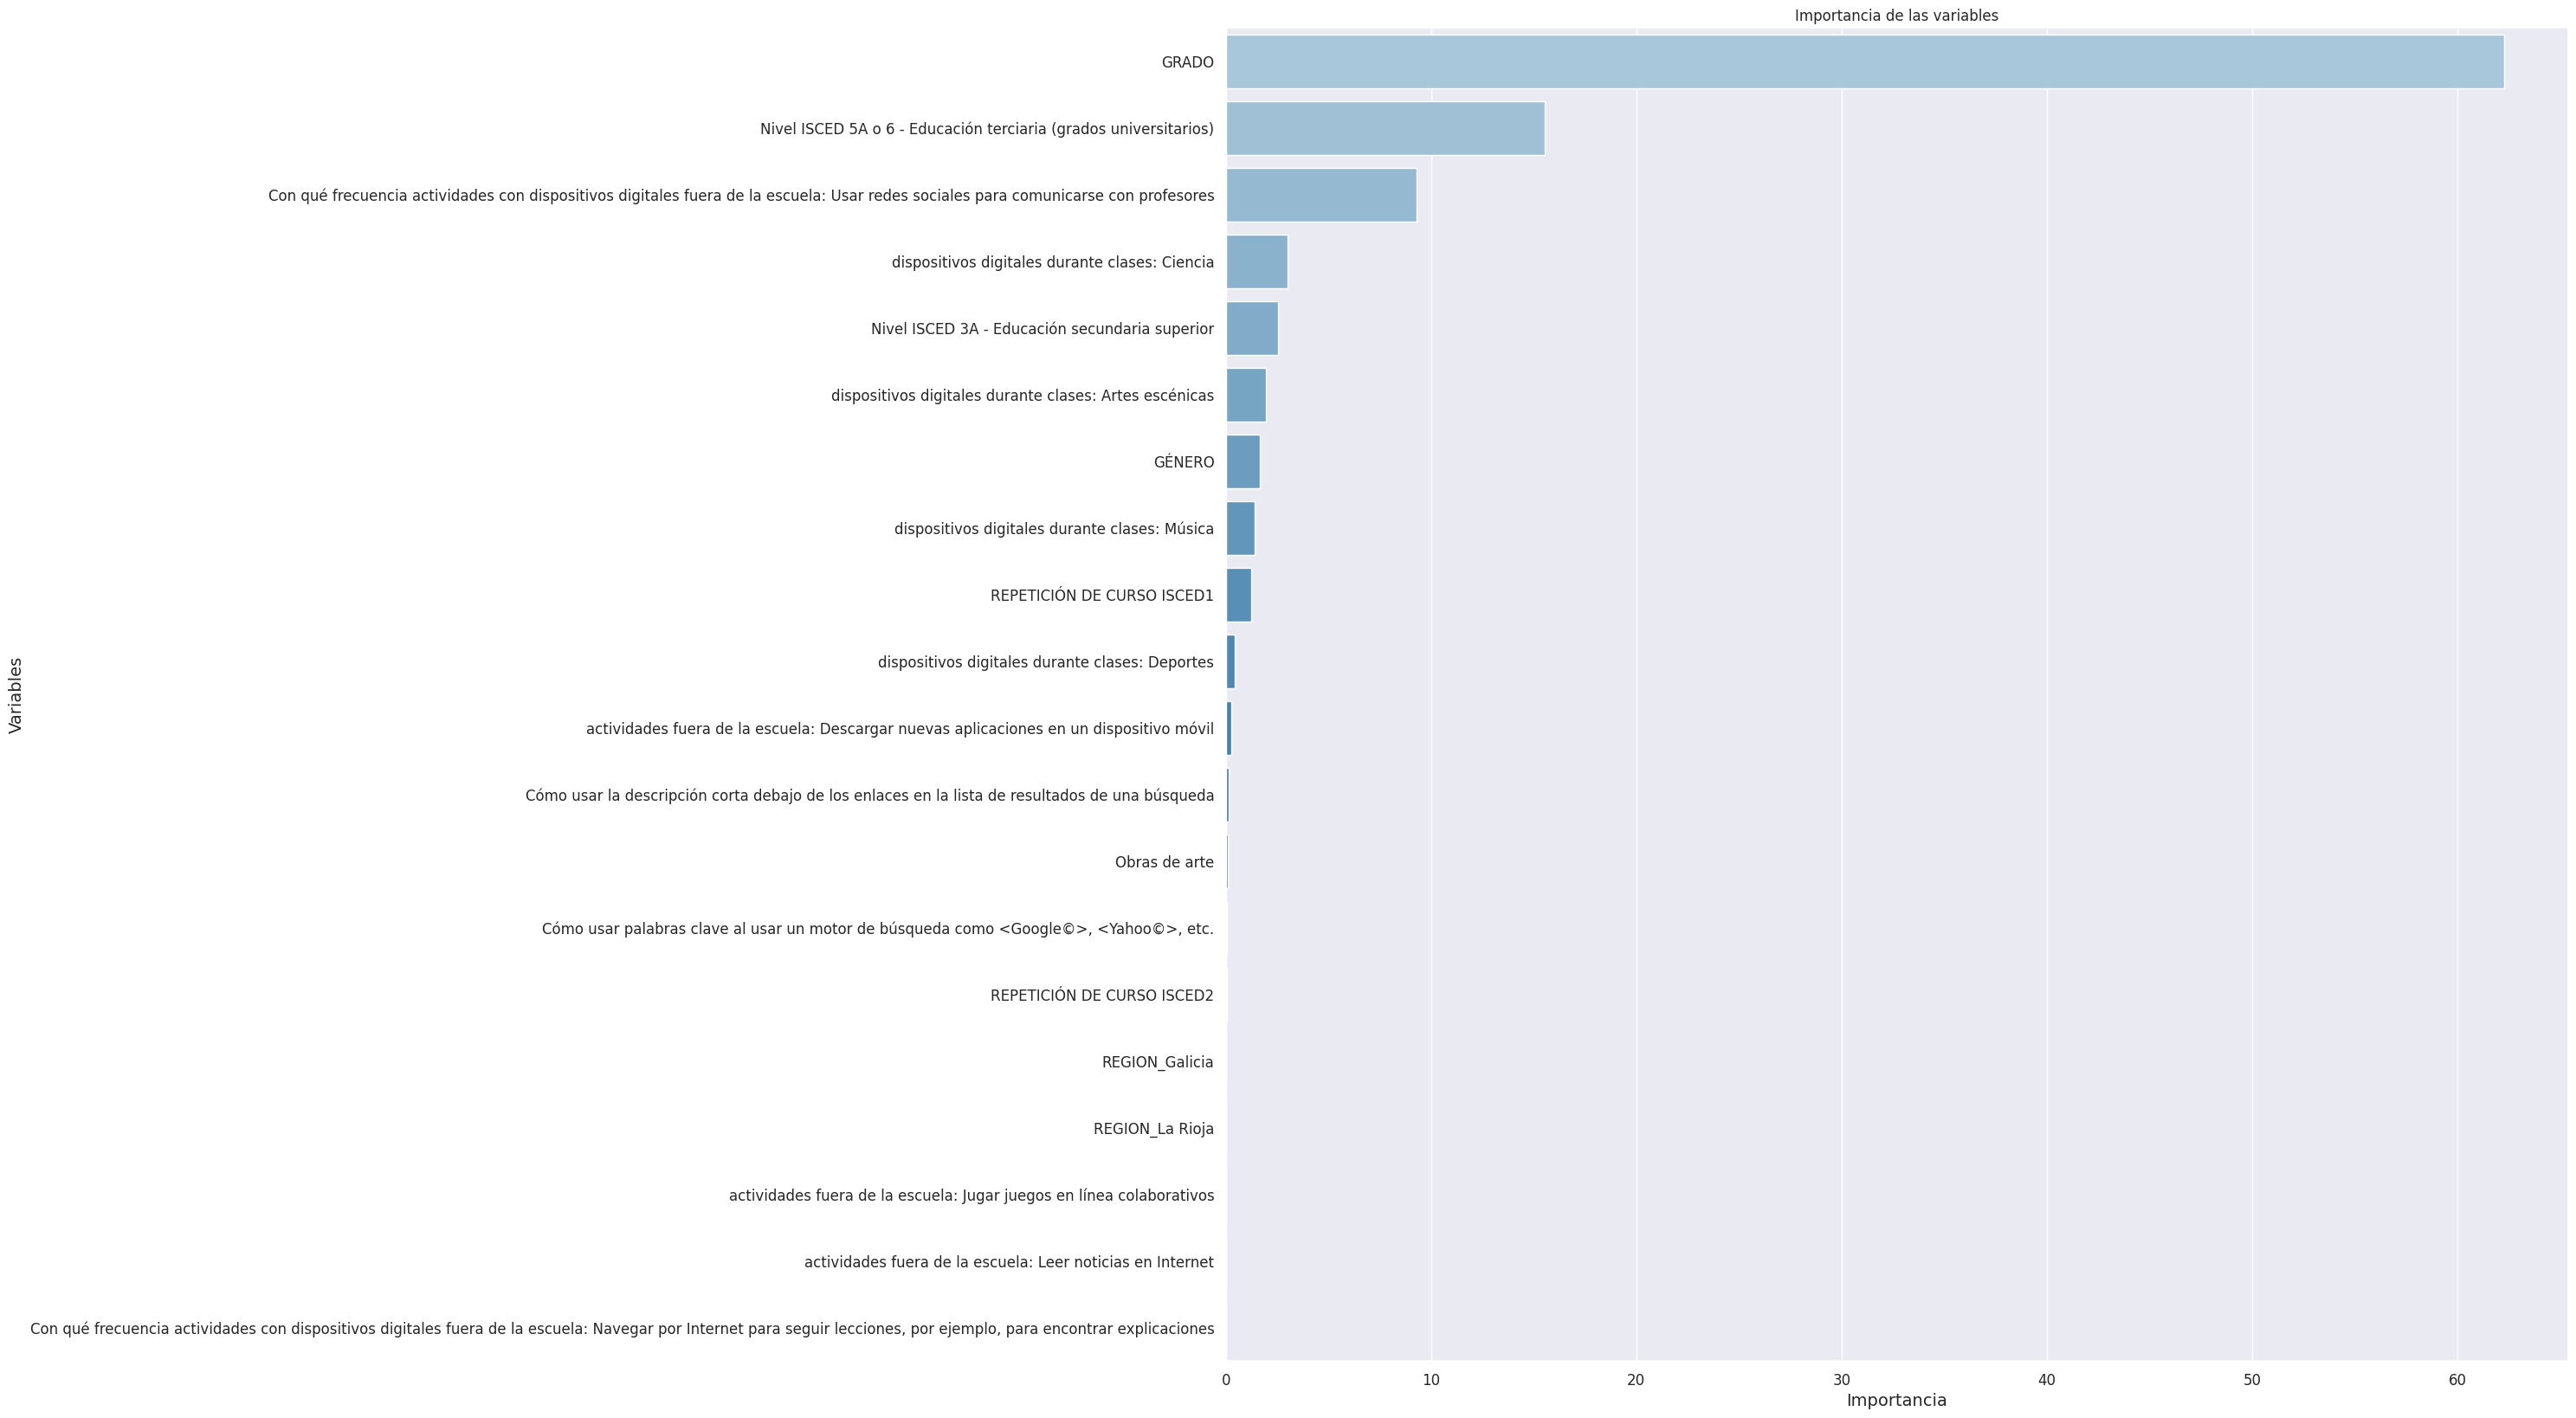

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(x='importance', y='feature', data=df2, palette='Blues_d')
plt.title('Importancia de las variables', fontsize=12)
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Tras aplicar el árbol de decisión, identificamos las variables más importantes que influyen en el resultado del modelo. Estas variables, ordenadas por su importancia, son las siguientes:

1. GRADO: Contribuye significativamente al resultado del modelo con una importancia del 62.47%.

2. Nivel ISCED 5A o 6 - Educación terciaria (grado universitario o superior): Tiene una influencia importante con un 17.13%.

3. Con qué frecuencia actividades con dispositivos digitales durante clases: Esta variable representa el uso de dispositivos digitales durante las clases y contribuye con un 7.50%.

4. Dispositivos digitales durante clases: Música: Se refiere al uso de dispositivos digitales durante las clases y tiene un peso del 3.56%.

5. Dispositivos digitales durante clases: Ciencia: Indica el uso de dispositivos digitales para actividades relacionadas con la ciencia, con una importancia del 2.92%.

6. GÉNERO: La variable de género también tiene cierta influencia en el modelo, con un 1.37%.

Es importante destacar que incluso al probar diferentes enfoques de construcción del árbol de decisión y eliminar algunas variables, las variables mencionadas siguen siendo las más influyentes en el modelo, lo que indica su importancia en la predicción de los resultados. Los detalles y resultados adicionales se encuentran en otro notebook.



Estas cinco variables seleccionadas serán las que utilizaremos para llevar a cabo nuestro análisis de clustering. Sin embargo, es importante destacar que, en relación a nuestra hipótesis inicial sobre si el uso de Internet influye negativamente en los resultados de PISA, nuestros hallazgos indican que esto no es necesariamente cierto. Aquí presentamos una explicación más detallada de por qué llegamos a esta conclusión:

A pesar de que una de las variables importantes en nuestro modelo es "Con qué frecuencia actividades con dispositivos digitales durante clases," lo que podría estar relacionado con el uso de Internet, no podemos concluir de inmediato que el uso de Internet tenga un impacto negativo en los resultados de PISA. Aquí hay varias razones para ello:

**Correlación no implica causalidad**: Si bien esta variable está correlacionada con los resultados de PISA, no podemos afirmar con certeza que el uso de Internet sea la causa directa de los resultados más bajos. Puede haber otros factores o variables ocultas que contribuyan a esta correlación. Sospechamos que esconden elementos relaccionados con la economía de las familias.

**Contexto y calidad del uso de Internet además de Diversidad de situaciones educativas::** El impacto del uso de Internet en el rendimiento educativo es variable y depende de cómo y con qué propósito se emplee esta herramienta. Utilizar Internet para acceder a recursos educativos, llevar a cabo investigaciones y aprender puede ser beneficioso para el rendimiento académico, pero un uso excesivo o distractor puede tener efectos negativos. Por esta razón, es importante analizar estas variables en el contexto de un cluster.

**Variables omitidas**: Nuestro modelo se basa en un conjunto específico de variables seleccionadas. Puede haber otras variables importantes que no se hayan tenido en cuenta y que expliquen mejor las diferencias en los resultados de PISA. En este caso con más tiempo y más datos podríamos hacer un estudio mucho más profuno.

# **En resumen, aunque hemos identificado variables relacionadas con el uso de dispositivos digitales durante clases como importantes en nuestro modelo, no podemos concluir de manera definitiva que el uso de Internet tenga un impacto negativo en los estudiantes.**

In [ ]:
# vamos a calcular la curva ROC y el AUC

def curva_roc_auc(df, TARGET):
    X = df.drop([TARGET], axis=1)
    y = df[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Definir los hiperparámetros
    param_grid = {
        'max_depth': [None, 5,5,5],
        'min_samples_leaf': [5,5,5],
        'min_samples_split': [5,5,5],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }

    clf = DecisionTreeClassifier()

    # Usar GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)


    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Matriz de Confusión:")
    print(confusion)

    # Calcular la probabilidad de que la predicción sea 1
    y_pred_proba = best_clf.predict_proba(X_test)[:,1]

    # Calcular el AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label='AUC (área = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos o (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos o (Sensibilidad)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejor combinación de hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.752955904854639
Matriz de Confusión:
[[2249 1155]
 [ 621 3164]]


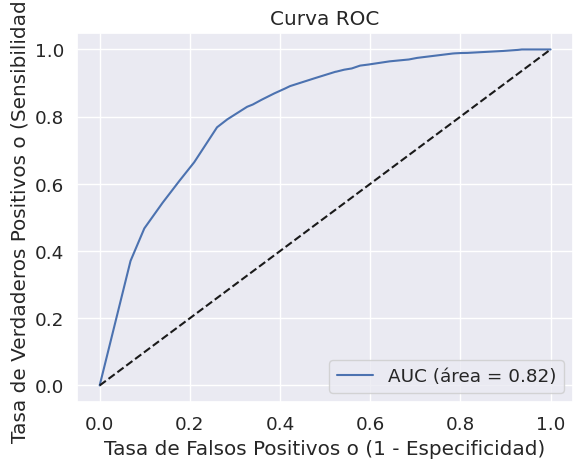

In [ ]:
curva_roc_auc(df, 'TARGET')

In [ ]:
warnings.resetwarnings()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **CLUSTERING**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/df_pisa_sin_nulos.csv', delimiter=',', encoding='latin1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.isnull().sum().sum()== 0 #no hay nulos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [ ]:
missing_values = data.isnull().sum().sum()
print("Número de valores faltantes en el DataFrame:", missing_values)

Número de valores faltantes en el DataFrame: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(35943, 111)

In [ ]:
data.drop_duplicates(inplace =True) #No hay duplicados

In [ ]:
columnas = ['NOTA CIENCIAS', 'NOTA MATEMATICAS', 'REGION', 'TARGET', 'ST004D01T', 'ST225Q06HA', 'IC150Q06HA', 'IC010Q06NA', 'IC150Q03HA', 'ST225Q03HA', 'ST001D01T']
data = data[columnas]

Estas columnas se han seleccionado con los siguientes criterios:

NOTA CIENCIAS, NOTA MATEMATICAS y TARGET: estan directamente relaccionadas y son las que que nos dan la distribución de datos.

REGION: aunque no aparece en el árbol de decisión la hemos tomados porque creemos contiene datos indirectos economicos y políticos tal y como analizamos en el mapa.

'ST004D01T', 'ST225Q06HA', 'IC150Q06HA', 'IC010Q06NA', 'IC150Q03HA', 'ST225Q03HA' son las columnas más importantes según el arbol de decisión realizado en el otro notebook. Corresponden a: GRADO, Nivel ISCED 5A o 6, Con qué frecuencia actividades con dispositivo o redes sociales para comunicarte con tus profesores, Dispositivos digitales durante clases: Música, dispositivos digitales durante clases: Ciencia, Nivel ISCED 3A, GÉNERO

In [ ]:
columnas_a_codificar = ['REGION']
data = pd.get_dummies(data, columns=columnas_a_codificar)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creamos un cluster de 3, para comprobar luego si es la mejor elección.

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print("Centroides iniciales:")
print(kmeans.cluster_centers_)  # Centroides iniciales

Centroides iniciales:
[[ 3.68837813e+02  3.69405938e+02 -1.54321000e-14  1.50910931e+00
   2.27226721e-01  2.36369771e+00  2.40553306e+00  2.07473009e+00
   3.61842105e-01  9.07152497e+00  6.59581646e-02  4.35222672e-02
   4.58839406e-02  3.64372470e-02  5.88731444e-02  3.98110661e-02
   4.48717949e-02  1.06275304e-02  5.60053981e-02  1.32085020e-01
   6.10661269e-02  3.93049933e-02  4.65587045e-02  7.32118758e-02
   4.35222672e-02  7.82726046e-02  3.08704453e-02  1.48448043e-02
   7.82726046e-02]
 [ 5.97600236e+02  5.92928073e+02  1.00000000e+00  1.56190997e+00
   8.76043234e-01  3.83595567e+00  1.33205637e+00  2.30866056e+00
   8.68791900e-01  9.97359420e+00  3.57093994e-02  5.88315775e-02
   5.82843070e-02  5.80106718e-02  4.91175263e-02  6.84088111e-02
   4.92543440e-02  9.16678068e-03  4.58339034e-02  1.03570940e-01
   3.48884936e-02  7.22397045e-02  4.13189219e-02  2.96894240e-02
   4.17293747e-02  4.96647968e-02  5.43165960e-02  6.14311123e-02
   7.85333151e-02]
 [ 5.22467479e+0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Inertia después del ajuste:", kmeans.inertia_)

Inertia después del ajuste: 67996424.62031198


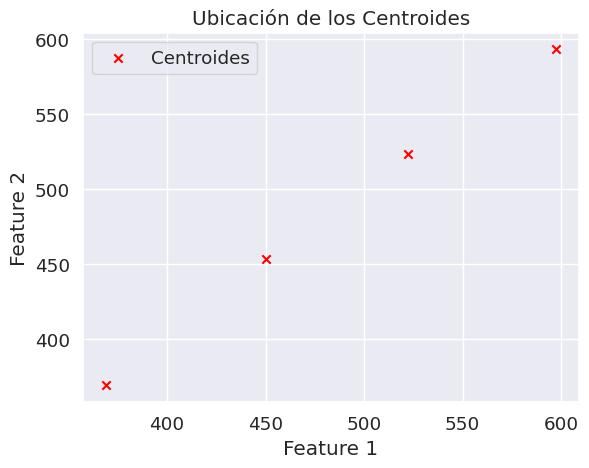

In [ ]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Ubicación de los Centroides')
plt.legend()
plt.grid(True)
plt.show()

Los centroides del cluster quedan graficados, posteriormente se ajustarán en el fit.

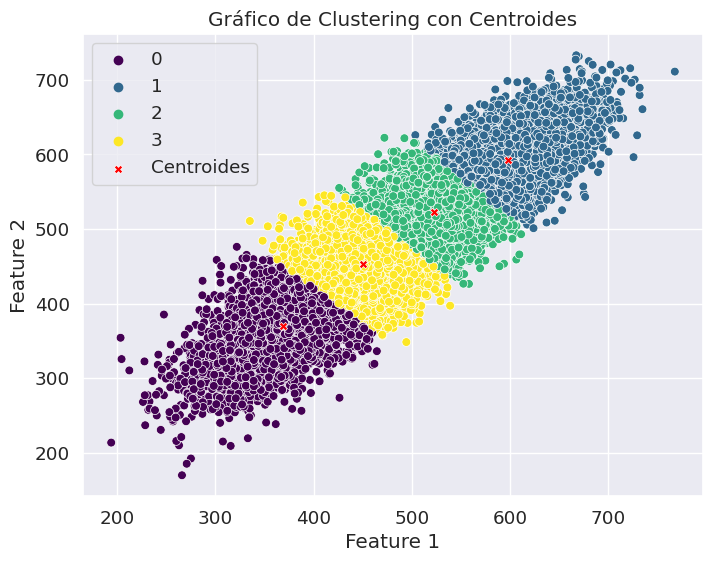

In [ ]:
#datos coloreados por clúster
custom_palette = sns.color_palette(["green", "yellow", "orange", "red"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data.iloc[:, 0], y=data.iloc[:, 1], hue=kmeans.labels_, palette= 'viridis', s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# centroides en rojo
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', label='Centroides')
plt.title('Gráfico de Clustering con Centroides')
plt.legend()
plt.grid(True)
plt.show()


Aquí comprobamos que el cluster se ha hecho de una forma bastante lógica y previsible.

Para comprobar que haber hecho este cluster con 3 centroides ha sido una buena eleccion probamos el método del codo.

In [ ]:
clust = kmeans.predict(data)
print(clust)

[2 3 2 ... 1 2 1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

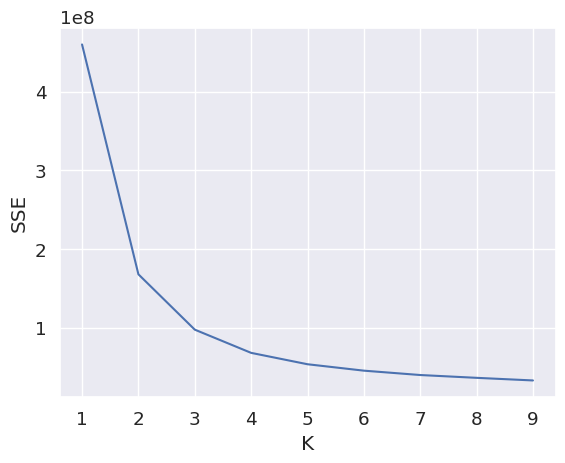

In [ ]:
# Método del codo. El valor correcto es 3 o 4.
krango = range(1, 10)
sse = []

for k in krango:
    kmeans_temp = KMeans(n_clusters=k).fit(data)
    sse.append(kmeans_temp.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krango, sse)
plt.show()

In [ ]:
print("Centroides finales:")
print(kmeans.cluster_centers_)  # Centroides después del ajuste

Centroides finales:
[[ 3.68837813e+02  3.69405938e+02 -1.54321000e-14  1.50910931e+00
   2.27226721e-01  2.36369771e+00  2.40553306e+00  2.07473009e+00
   3.61842105e-01  9.07152497e+00  6.59581646e-02  4.35222672e-02
   4.58839406e-02  3.64372470e-02  5.88731444e-02  3.98110661e-02
   4.48717949e-02  1.06275304e-02  5.60053981e-02  1.32085020e-01
   6.10661269e-02  3.93049933e-02  4.65587045e-02  7.32118758e-02
   4.35222672e-02  7.82726046e-02  3.08704453e-02  1.48448043e-02
   7.82726046e-02]
 [ 5.97600236e+02  5.92928073e+02  1.00000000e+00  1.56190997e+00
   8.76043234e-01  3.83595567e+00  1.33205637e+00  2.30866056e+00
   8.68791900e-01  9.97359420e+00  3.57093994e-02  5.88315775e-02
   5.82843070e-02  5.80106718e-02  4.91175263e-02  6.84088111e-02
   4.92543440e-02  9.16678068e-03  4.58339034e-02  1.03570940e-01
   3.48884936e-02  7.22397045e-02  4.13189219e-02  2.96894240e-02
   4.17293747e-02  4.96647968e-02  5.43165960e-02  6.14311123e-02
   7.85333151e-02]
 [ 5.22467479e+02 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Inertia después del ajuste:", kmeans.inertia_)

Inertia después del ajuste: 67996424.62031198


In [ ]:
labels = kmeans.labels_

In [ ]:
grupo1 = []
grupo2 = []
grupo3 = []
grupo4 = []

In [ ]:
grupo1 = data[labels == 0] #yellow
grupo2 = data[labels == 3] #orange
grupo3 = data[labels == 2] #red
grupo4 = data[labels == 1] #green

### **ANALISIS DE LOS RESULTADOS**

In [ ]:
#Convertimos a DataFrame para trabajar con ello.
df_grupo1 = pd.DataFrame(grupo1)
df_grupo2 = pd.DataFrame(grupo2)
df_grupo3 = pd.DataFrame(grupo3)
df_grupo4 = pd.DataFrame(grupo4)

Jairo trabaja con estas variables, grupo1 el grupo que mejor notas tiene, grupo 4 el que peor.

In [ ]:
red = df_grupo3.copy()
orange = df_grupo2.copy()
yellow = df_grupo1.copy()
green = df_grupo4.copy()

In [ ]:
red.rename(columns=dic_variables, inplace =True)
orange.rename(columns=dic_variables, inplace =True)
yellow.rename(columns=dic_variables, inplace =True)
green.rename(columns=dic_variables, inplace =True)

In [ ]:
#Comprobamos que todo esté bien.
grupo1.shape [0] + grupo2.shape[0] + grupo3.shape[0] + grupo4.shape[0] == data.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [ ]:
#Comprobamos que todo esté bien.
red.shape [0] + orange.shape[0] + yellow.shape[0] + green.shape[0] == data.shape[0]

True

Con estas comprobaciones me aseguro que todos los grupos sumen lo mismo que el conjunto total.

In [ ]:
# Estadísticas descriptivas para cada grupo
group_stats = data.groupby(kmeans.labels_).describe()
print(group_stats)

  NOTA CIENCIAS                                                         \
          count        mean        std       min         25%       50%   
0        5927.0  368.831988  37.214486  193.7475  346.464100  373.5222   
1        7318.0  597.548313  33.061845  503.5598  573.899475  593.2840   
2       11933.0  522.404036  27.124707  425.9722  503.099300  522.4824   
3       10765.0  450.155032  28.731483  334.9886  430.015100  451.0009   

                        NOTA MATEMATICAS              ... REGION_Navarra       \
          75%       max            count        mean  ...            75%  max   
0  395.426100  464.3567           5927.0  369.397815  ...            0.0  1.0   
1  617.363075  767.8636           7318.0  592.891461  ...            0.0  1.0   
2  541.935200  611.3081          11933.0  523.160632  ...            0.0  1.0   
3  471.113100  538.9872          10765.0  453.572845  ...            0.0  1.0   

  REGION_Pais Vasco                                               
 

In [ ]:
# Diccionarios de mapeo
genero_mapping = {1.0: 'Femenino', 2.0: 'Masculino'}
sino_mapping = {0.0: 'NO', 1.0: 'SI'}
frecuencia_mapping = {1.0: 'Nada de tiempo', 2.0: '30 minutos a la semana', 3.0: '31 – 60 minutos a la semana', 4.0: 'Más de 60 minutos a la semana', 5.0: 'No estudio la asignatura'}
frecuencia2_mapping = {1.0: 'Nunca o casi nunca', 2.0: 'Una o dos veces al mes', 3.0: 'Una o dos veces a la semana', 4.0: 'Casi todos los días', 5.0: 'Todos los días'}

#variables con los nombres de las columnas.
grado_5_6 = 'Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios)'
grado_3 = 'Nivel ISCED 3A - Educación secundaria superior'
profesor = 'Con qué frecuencia actividades con dispositivos digitales fuera de la escuela: Usar redes sociales para comunicarse con profesores'
musica = 'dispositivos digitales durante clases: Música'
ciencias = 'dispositivos digitales durante clases: Ciencia'

# DataFrames a procesar
dataframes_to_process = [red, orange, yellow, green]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in dataframes_to_process:
  i['GÉNERO'] = i['GÉNERO'].replace(genero_mapping)
  i[grado_5_6] = i[grado_5_6].replace(sino_mapping)
  i[grado_3] = i[grado_3].replace(sino_mapping)
  i[musica] = i[musica].replace(frecuencia_mapping)
  i[ciencias] = i[ciencias].replace(frecuencia_mapping)
  i[profesor] = i[profesor].replace(frecuencia2_mapping)

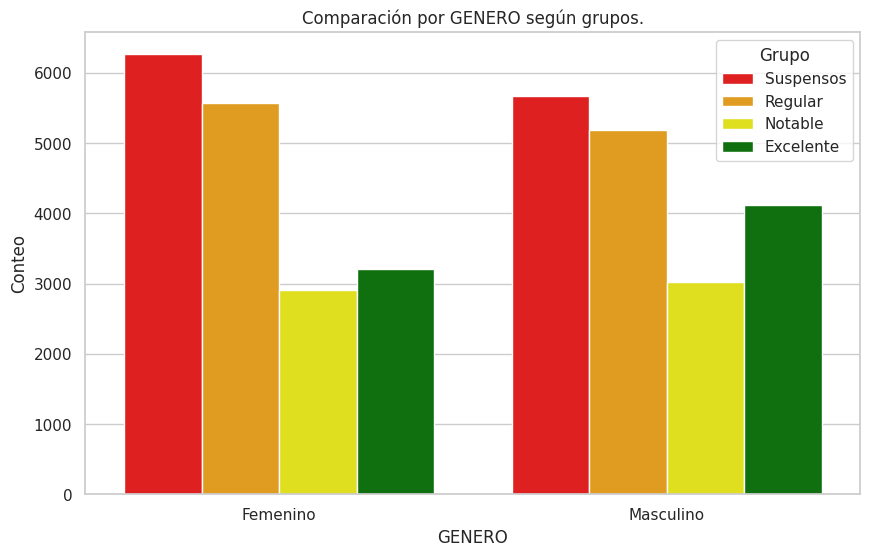

In [ ]:
red['Grupo'] = 'Suspensos'
orange['Grupo'] = 'Regular'
yellow['Grupo'] = 'Notable'
green['Grupo'] = 'Excelente'

combined_data = pd.concat([red, orange, yellow, green])

paleta = sns.color_palette(["red", "orange", "yellow", "green"])
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='GÉNERO', hue='Grupo', palette=paleta)

# Ajusta etiquetas y título
plt.xlabel('GENERO')
plt.ylabel('Conteo')
plt.title('Comparación por GENERO según grupos.')

# Muestra el gráfico
plt.show()


Inicialmente, la variable de género puede parecer no relevante, pero hemos considerado importante incluirla en nuestro análisis. Tenemos cuatro grupos: el Grupo 1, que presenta los mejores resultados, seguido del Grupo 2 en color amarillo, el Grupo 3 en color naranja y, por último, el Grupo 4, que muestra el peor desempeño. Utilizamos un sistema de colores similar al de un semáforo para representar estos grupos.

Al observar la distribución de género en estos grupos, notamos que el Grupo verde tiene una mayor proporción de hombres que mujeres, mientras que el Grupo rojo muestra lo contrario. Esto sugiere que, aunque las diferencias de género no son significativas, podrían estar relacionadas con las diferencias en los resultados y las calificaciones.Esta asociación entre género y rendimiento podría explicarse por diversas razones. Es importante considerar que las diferencias de género pueden influir en las preferencias de aprendizaje, los intereses y las motivaciones de los estudiantes. Además, factores sociales y culturales también pueden desempeñar un papel en estas disparidades.

Es crucial realizar un análisis más detallado para comprender completamente la relación entre el género y el rendimiento académico en estos grupos. Esto podría incluir la revisión de los métodos de enseñanza, el apoyo educativo proporcionado y la identificación de posibles sesgos en la evaluación. Al comprender mejor cómo el género se relaciona con el desempeño, podemos tomar medidas para garantizar que todos los estudiantes, independientemente de su género, tengan igualdad de oportunidades para alcanzar su máximo potencial académico.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


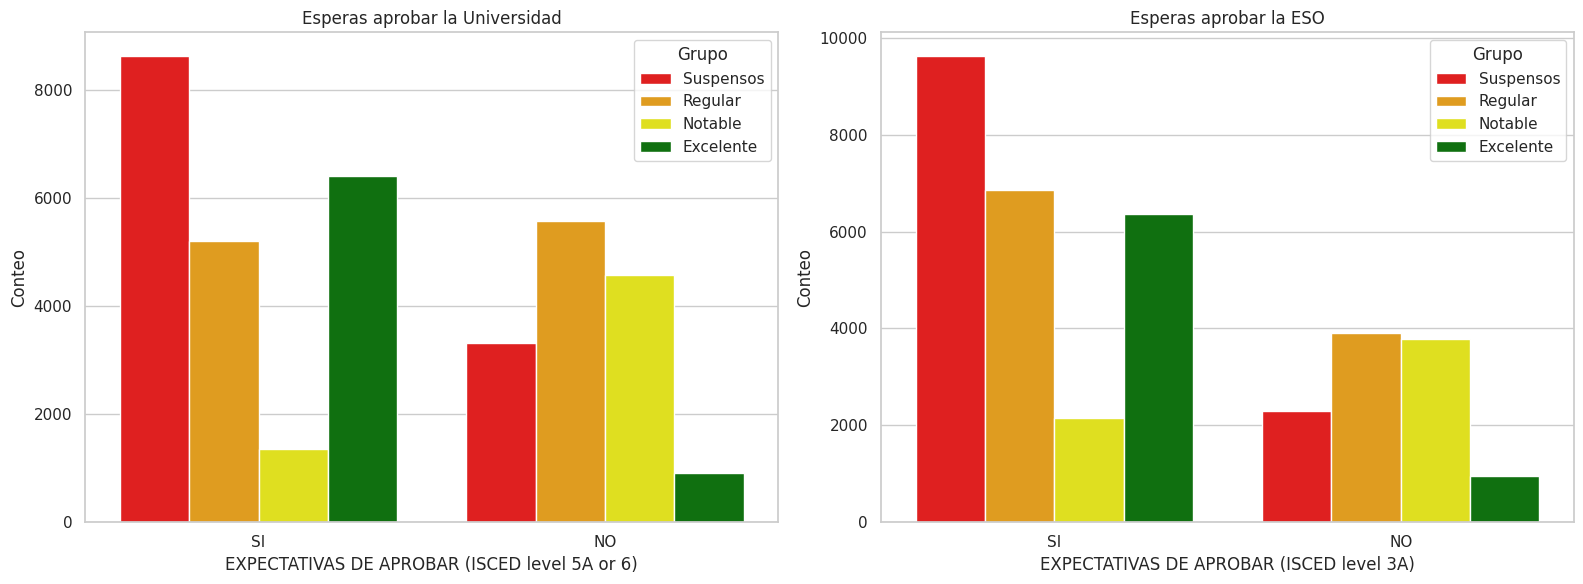

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: EXPECTATIVAS DE APROBAR para ISCED level 5A o 6 según grupos
sns.countplot(data=combined_data, x='Nivel ISCED 5A o 6 - Educación terciaria (grados universitarios)', hue='Grupo', palette=paleta, ax=axes[0])
axes[0].set_xlabel('EXPECTATIVAS DE APROBAR (ISCED level 5A or 6)')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Esperas aprobar la Universidad')

# Gráfico 2: EXPECTATIVAS DE APROBAR para ISCED level 3A según grupos
sns.countplot(data=combined_data, x='Nivel ISCED 3A - Educación secundaria superior', hue='Grupo', palette=paleta, ax=axes[1])
axes[1].set_xlabel('EXPECTATIVAS DE APROBAR (ISCED level 3A)')
axes[1].set_ylabel('Conteo')
axes[1].set_title('Esperas aprobar la ESO')

plt.tight_layout()
plt.show()


Es interesante observar que, en términos generales, las expectativas de aprobar la universidad o la ESO son altas, independientemente del grupo al que pertenezcan los estudiantes. Sin embargo, llama la atención el grupo que obtiene los peores resultados, ya que también tienen altas expectativas de asistir a la universidad. Esto podría estar relacionado con el análisis previo de los sentimientos, donde notamos que los estudiantes en el grupo de bajo rendimiento mostraban niveles más altos de felicidad y sentimientos positivos en comparación con el grupo de alto rendimiento.

Esta paradoja podría indicar que los estudiantes en el grupo de bajo rendimiento pueden tener una visión más optimista y positiva sobre su futuro académico, a pesar de sus resultados actuales. Esto podría ser el resultado de diversos factores, como el apoyo de sus familias, la motivación personal o la percepción de que la universidad es una oportunidad para mejorar su situación. Por lo tanto, es importante considerar tanto las expectativas académicas como los aspectos emocionales y motivacionales al abordar el rendimiento estudiantil y brindar el apoyo necesario para que todos los estudiantes alcancen sus metas educativas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


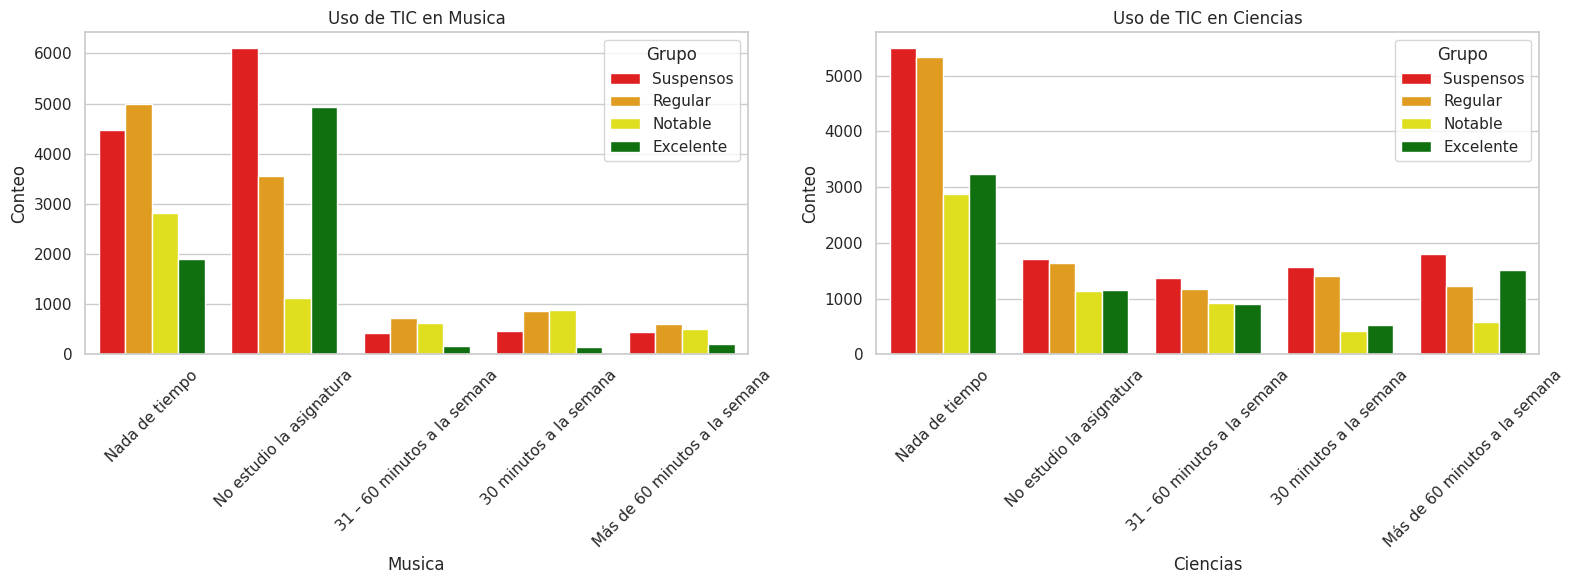

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Usar TIC en Música
sns.countplot(data=combined_data, x='dispositivos digitales durante clases: Música', hue='Grupo', palette= paleta, ax=axes[0])
axes[0].set_xlabel('Musica')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Uso de TIC en Musica')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Gráfico 2: Usar TIC en ciencias
sns.countplot(data=combined_data, x='dispositivos digitales durante clases: Ciencia', hue='Grupo', palette=paleta, ax=axes[1])
axes[1].set_xlabel('Ciencias')
axes[1].set_ylabel('Conteo')
axes[1].set_title('Uso de TIC en Ciencias')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

En relación a  el uso de las tecnologías de la información y la comunicación (TIC) en las clases de música, se destacan algunas observaciones importantes. En el caso de la asignatura de música, se observa que muchos alumnos no estudian esta materia, y esto parece tener poca relación con el grupo al que pertenecen. Esto podría estar relacionado con el hecho de que la asignatura de música no es obligatoria, y por lo tanto, algunos estudiantes optan por no cursarla.

Por otro lado, un grupo considerable de alumnos informa que no dedica tiempo a utilizar las TIC en las clases de música, a pesar de estar matriculados en la asignatura. Esto sugiere que el uso de las TIC en esta materia puede considerarse irrelevante para muchos estudiantes. Esto podría deberse a la naturaleza de la asignatura de música y a la forma en que se imparte, lo que puede no requerir un uso extensivo de las TIC.

En resumen, la falta de interés en la asignatura de música y la baja utilización de las TIC en esta área pueden estar relacionadas con la opcionalidad de la materia y la naturaleza de la enseñanza musical. Rechazamos que el no estudiar musica influye, pues el grupo verde y rojo tiene unas respuestas similares.

En el caso de las clases de ciencias, se observa que la mayoría de los estudiantes no utilizan las tecnologías de la información y la comunicación (TIC) en estas asignaturas. Esto podría deberse a varias razones. En primer lugar, podría reflejar una falta de énfasis en la integración de las TIC en la enseñanza de ciencias en la escuela. Esto podría ser el resultado de una percepción de que no son necesarias o de la falta de recursos tecnológicos en la institución educativa. Recordemos que estos datos son del 2018 y posiblemente despues de la pandemia hayan cambiado.

Además, un pequeño grupo de estudiantes menciona que no estudia la asignatura. Esto podría ser consecuencia de la manera en que se nombra la asignatura, como "Science" u otras denominaciones, o de la división de las ciencias en biología, geología, física y química, que puede variar según la comunidad autónoma.

Por otro lado, el Grupo Verde, que representa el grupo al que todos aspiran, informa que com segunda opción utiliza las TIC en clase durante más de 60 minutos a la semana. Esto indica un mayor grado de integración de la tecnología en la enseñanza de las ciencias para este grupo, lo que podría estar contribuyendo a su mejor desempeño académico y atractivo para los demás estudiantes.

En conclusión, la falta de uso de las TIC en las clases de ciencias puede estar relacionada con la percepción de su importancia, la disponibilidad de recursos y la organización curricular. La diferencia en el uso de las TIC en el Grupo Verde sugiere que una mayor integración de la tecnología puede tener un impacto positivo en el rendimiento de los estudiantes en estas asignaturas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


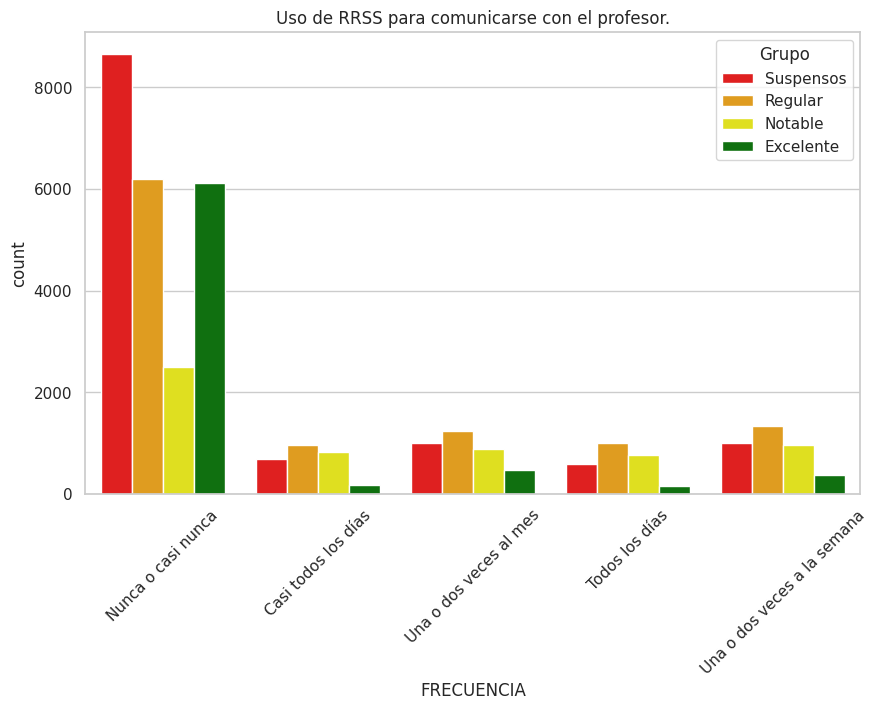

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_data,
                   x=profesor,
                   hue='Grupo',
                   palette=paleta)

# Ajusta etiquetas y título
plt.xlabel('FRECUENCIA')
plt.title('Uso de RRSS para comunicarse con el profesor.')

# Gira las etiquetas del eje x en 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Muestra el gráfico
plt.show()


Es interesante observar que la mayoría de los estudiantes nuca o casi nunca utilizan las redes sociales para comunicarse con el profesor, sin importar a qué grupo pertenezcan. Esta tendencia parece ser abrumadora y podría sugerir que muchos estudiantes no consideran necesario utilizar redes sociales como una herramienta principal de comunicación con el profesorado, o que estos no están receptivos a abrir ese canal. Sin embargo, es importante tener en cuenta que estos datos son de 2018 y que la situación podría haber experimentado cambios significativos desde entonces.

La pandemia de COVID-19 ha tenido un impacto considerable en la forma en que las personas se comunican y utilizan la tecnología. El distanciamiento social y las restricciones de movimiento han llevado a un aumento en el uso de las redes sociales y las plataformas de comunicación en línea como medio principal de interacción social y educación a distancia. Por lo tanto, sería muy interesante analizar datos más recientes para comprender mejor cómo ha evolucionado la utilización de las redes sociales y cómo la pandemia ha influido en este aspecto.

Los datos actualizados podrían proporcionar una visión más precisa de las tendencias de comunicación de los estudiantes y cómo las tecnologías han influido en sus interacciones sociales y académicas. Esto sería útil para adaptar estrategias educativas y comprender mejor cómo se están adaptando los jóvenes a las nuevas formas de comunicación en un mundo cada vez más digital.

In [ ]:
#Meto todas las columnas Region en una.

region_columns = ['REGION_Andalucia', 'REGION_Aragon', 'REGION_Asturias',
                  'REGION_Cantabria', 'REGION_Castilla - La Mancha',
                  'REGION_Castilla y Leon', 'REGION_Cataluna',
                  'REGION_Ceuta y Melilla', 'REGION_Comunidad Valenciana',
                  'REGION_Desconocido', 'REGION_Extremadura', 'REGION_Galicia',
                  'REGION_Islas Baleares', 'REGION_Islas Canarias',
                  'REGION_La Rioja', 'REGION_Madrid', 'REGION_Murcia',
                  'REGION_Navarra', 'REGION_Pais Vasco']


grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]

for grupo in grupos:
    grupo['REGION'] = grupo[region_columns].idxmax(axis=1)
    grupo.drop(region_columns, axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for grupo in grupos:
    grupo['REGION'] = grupo['REGION'].str.replace('REGION_', '')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1500x400 with 0 Axes>

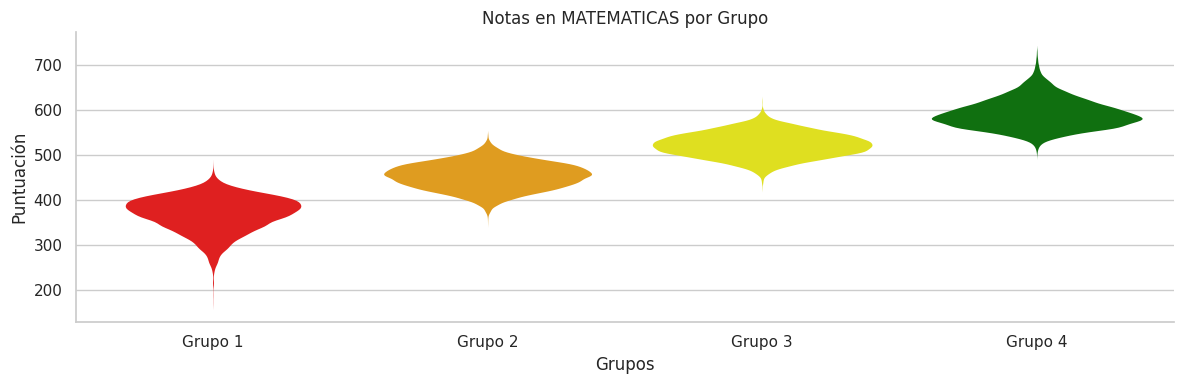

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))  # Cambiamos el tamaño para que aparezcan en una fila

grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]
nombres_grupos = ["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4"]
colores = ['red', 'orange', 'yellow', 'green']  # Colores personalizados para cada grupo

# Combina los DataFrames en uno solo con una columna para el grupo
combined_data = pd.concat([grupo.assign(Grupo=nombre) for grupo, nombre in zip(grupos, nombres_grupos)])

# Utiliza catplot para mostrar los gráficos en la misma figura sin la línea negra
sns.catplot(data=combined_data, x="Grupo", y='NOTA MATEMATICAS', kind='violin', palette=colores, inner="box", linewidth=0, height=4, aspect=3)
plt.title('Notas en MATEMATICAS por Grupo')
plt.ylabel('Puntuación')
plt.xlabel('Grupos')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1500x400 with 0 Axes>

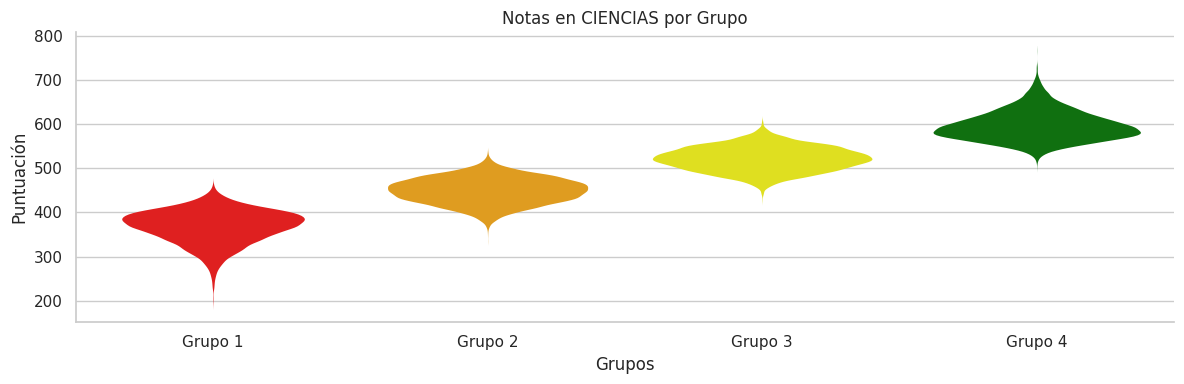

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))  # Cambiamos el tamaño para que aparezcan en una fila

grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]
nombres_grupos = ["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4"]
colores = ['red', 'orange', 'yellow', 'green']  # Colores personalizados para cada grupo

# Combina los DataFrames en uno solo con una columna para el grupo
combined_data = pd.concat([grupo.assign(Grupo=nombre) for grupo, nombre in zip(grupos, nombres_grupos)])

# Utiliza catplot para mostrar los gráficos en la misma figura sin la línea negra
sns.catplot(data=combined_data, x="Grupo", y='NOTA CIENCIAS', kind='violin', palette=colores, inner="box", linewidth=0, height=4, aspect=3)
plt.title('Notas en CIENCIAS por Grupo')
plt.ylabel('Puntuación')
plt.xlabel('Grupos')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


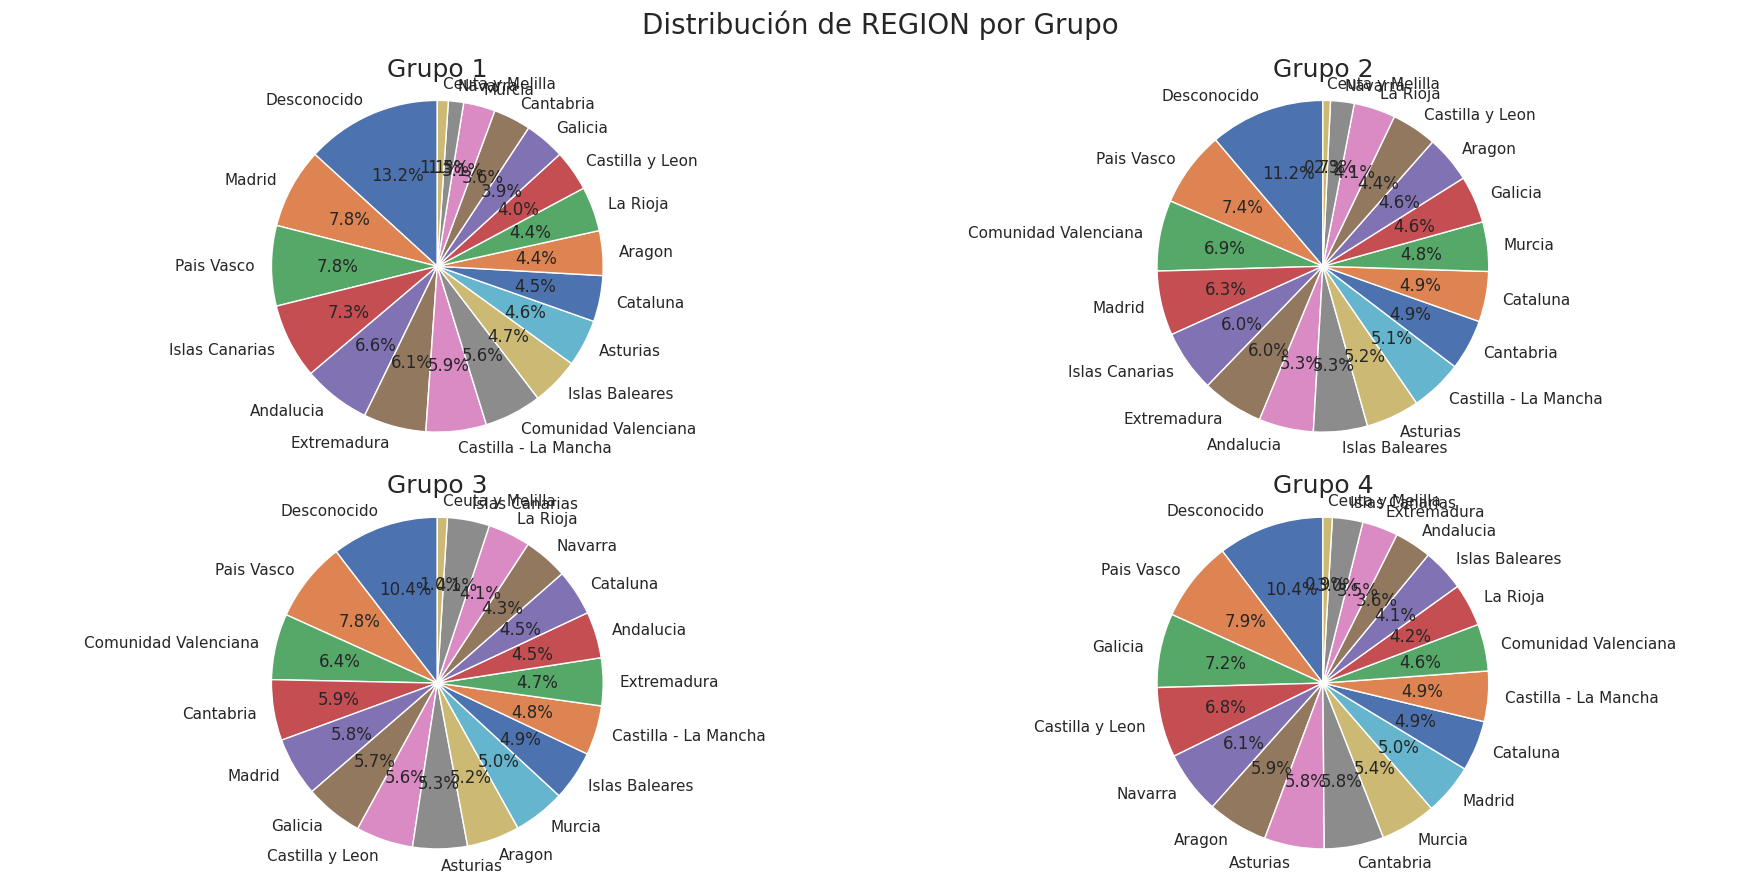

In [ ]:
import matplotlib.pyplot as plt

grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]
nombres_grupos = ["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4"]

fig, axs = plt.subplots(2, 2, figsize=(18, 9))  # Crear una matriz de subparcelas 2x2

for i, (grupo, nombre) in enumerate(zip(grupos, nombres_grupos)):
    region_counts = grupo['REGION'].value_counts()

    # Calcular la posición en la matriz de subparcelas
    fila = i // 2
    columna = i % 2

    axs[fila, columna].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
    axs[fila, columna].set_title(f'{nombre}', fontsize=18)  # Título del gráfico individual
    axs[fila, columna].axis('equal')  # Para asegurarse de que el círculo sea realmente un círculo

# Título general de la figura
plt.suptitle('Distribución de REGION por Grupo', fontsize=20)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


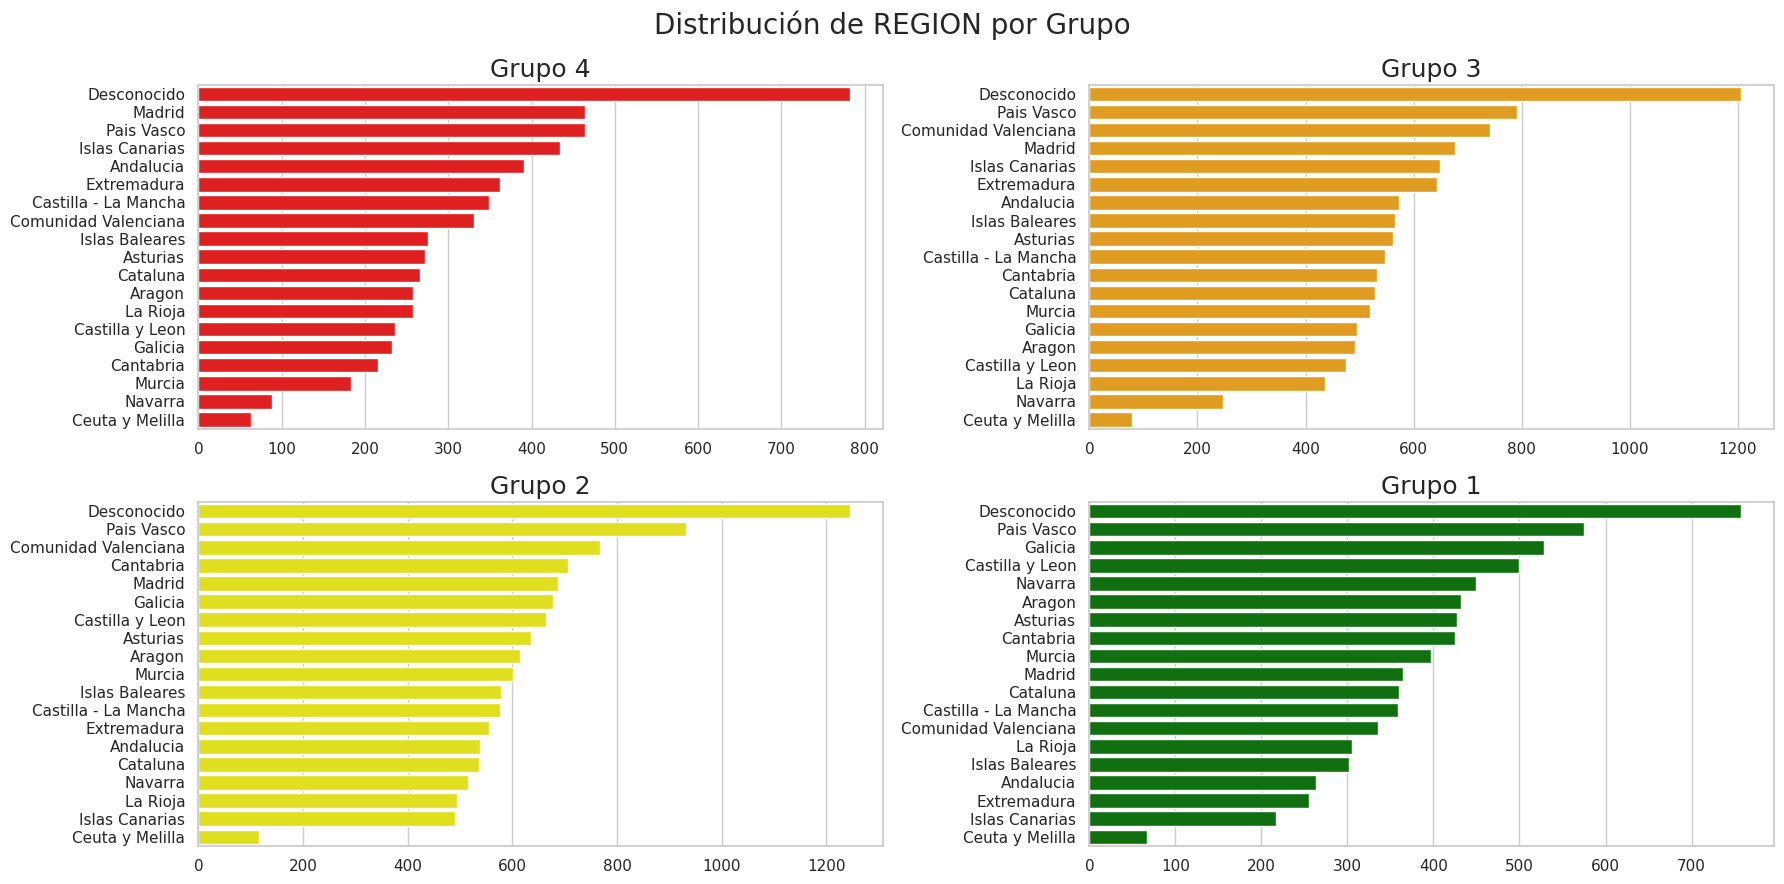

In [ ]:
grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]
nombres_grupos = ["Grupo 4", "Grupo 3", "Grupo 2", "Grupo 1"]
colores = ['red', 'orange', 'yellow', 'green']  # Colores personalizados para cada grupo

# Crear una matriz de subparcelas 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

# Utilizar Seaborn para crear los gráficos de barras en cada subparcela
for i, (grupo, nombre, color) in enumerate(zip(grupos, nombres_grupos, colores)):
    region_counts = grupo['REGION'].value_counts()

    # Calcular la posición en la matriz de subparcelas
    fila = i // 2
    columna = i % 2

    sns.barplot(x=region_counts.values, y=region_counts.index, ax=axs[fila, columna], palette=[color])
    axs[fila, columna].set_title(f'{nombre}', fontsize=18)  # Título del gráfico individual

# Título general de la figura
plt.suptitle('Distribución de REGION por Grupo', fontsize=20)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


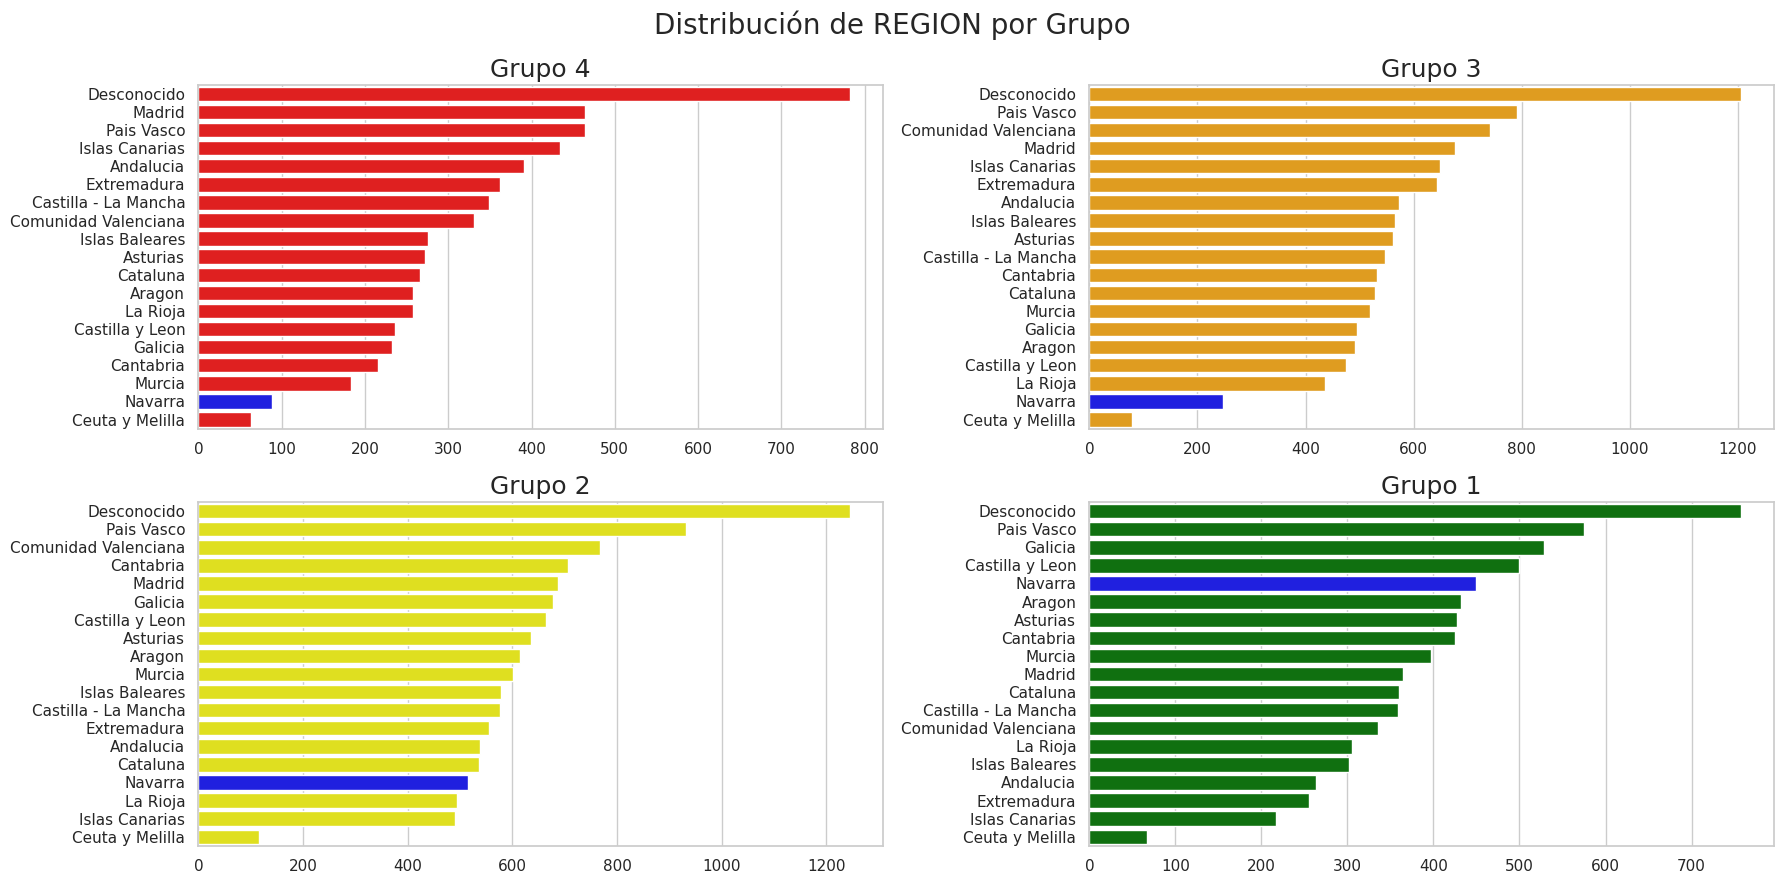

In [ ]:
grupos = [df_grupo1, df_grupo2, df_grupo3, df_grupo4]
nombres_grupos = ["Grupo 4", "Grupo 3", "Grupo 2", "Grupo 1"]
colores = ['red', 'orange', 'yellow', 'green']  # Colores personalizados para cada grupo

# Crear una matriz de subparcelas 2x2
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

# Utilizar Seaborn para crear los gráficos de barras en cada subparcela
for i, (grupo, nombre, color) in enumerate(zip(grupos, nombres_grupos, colores)):
    region_counts = grupo['REGION'].value_counts()

    # Calcular la posición en la matriz de subparcelas
    fila = i // 2
    columna = i % 2

    # Crear una paleta de colores personalizada para destacar "Navarra"
    custom_palette = [color if region != 'Navarra' else 'blue' for region in region_counts.index]

    sns.barplot(x=region_counts.values, y=region_counts.index, ax=axs[fila, columna], palette=custom_palette)
    axs[fila, columna].set_title(f'{nombre}', fontsize=18)  # Título del gráfico individual

# Título general de la figura
plt.suptitle('Distribución de REGION por Grupo', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
combined_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NOTA CIENCIAS  NOTA MATEMATICAS  TARGET  ST004D01T  ST225Q06HA  \
6           425.8988          393.1324     0.0        1.0         0.0   
11          429.0754          378.3329     0.0        1.0         1.0   
18          378.1155          371.5941     0.0        2.0         0.0   
29          303.5255          292.9270     0.0        2.0         0.0   
38          352.8218          367.1494     0.0        1.0         0.0   
...              ...               ...     ...        ...         ...   
35916       620.6065          568.5905     1.0        1.0         1.0   
35930       570.7055          578.7335     1.0        1.0         1.0   
35936       549.6075          574.2481     1.0        1.0         1.0   
35940       617.6677          619.3485     1.0        2.0         1.0   
35942       654.5856          577.5255     1.0        2.0         1.0   

       IC150Q06HA  IC010Q06NA  IC150Q03HA  ST225Q03HA  ST001D01T  \
6             5.0         1.0         5.0         1.0       10.0   
11            1.0         1.0         1.0         1.0       10.0   
18            1.0         3.0         1.0         0.0        9.0   
29            1.0         4.0         1.0         0.0        8.0   
38            5.0         5.0         5.0         1.0       10.0   
...           ...         ...         ...         ...        ...   
35916         3.0         1.0         1.0         1.0       10.0   
35930         5.0         1.0         5.0         1.0       10.0   
35936         5.0         2.0         3.0         1.0       10.0   
35940         5.0         1.0         2.0         1.0       10.0   
35942         5.0         1.0         1.0         1.0       10.0   

                REGION    Grupo  
6             Asturias  Grupo 1  
11              Madrid  Grupo 1  
18         Desconocido  Grupo 1  
29            La Rioja  Grupo 1  
38         Desconocido  Grupo 1  
...                ...      ...  
35916          Navarra  Grupo 4  
35930         La Rioja  Grupo 4  
35936      Desconocido  Grupo 4  
35940  Castilla y Leon  Grupo 4  
35942         Cataluna  Grupo 4  

[35943 rows x 12 columns]

In [ ]:
# Calcular la cantidad de valores de 'ST001D01T' por cada valor único de 'Grupo'
count_by_group = combined_data.groupby('Grupo')['ST001D01T'].value_counts()

# Mostrar la cantidad de valores de 'ST001D01T' por cada valor único de 'Grupo'
print("Cantidad de valores de 'ST001D01T' por valor único de 'Grupo:")
print(count_by_group)


Cantidad de valores de 'ST001D01T' por valor único de 'Grupo:
Grupo    ST001D01T
Grupo 1  9.0           3071
         10.0          1645
         8.0           1197
         7.0             13
         11.0             1
Grupo 2  10.0          7092
         9.0           3193
         8.0            480
Grupo 3  10.0         10680
         9.0           1166
         8.0             85
         11.0             2
Grupo 4  10.0          7120
         9.0            161
         8.0             23
         11.0            14
Name: ST001D01T, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
